**OBJECTIVES**

1. Identify data redundancy within the dataset to prevent unnecessary data duplication.

2. Detect and resolve inconsistenciesin data labeling to enhance data integrity and uniformity.

3. Detect and correct violations of logical data constraints to maintain data validity.

4. Identify missing values and apply appropriate imputation methods to ensure dataset completeness.

5. Diagnose cross-table data inconsistencies and analyze their root causesto improve data coherence.

# **🟢 Data Acquisition (Thu thập dữ liệu)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

ValueError: mount failed

In [ ]:
customerSegmentation_2017 = pd.read_csv("/content/drive/My Drive/Data/2017Segmentation3685case.csv", sep=';')

In [ ]:
brand_image = pd.read_csv("/content/drive/My Drive/Data/Brand_Image.csv",
                          delimiter=";",
                          quotechar='"',
                          encoding="utf-8",
                          on_bad_lines='skip')  # Pandas >=1.3

In [ ]:
brandhealth = pd.read_csv("/content/drive/My Drive/Data/Brandhealth.csv",
                          sep=";",
                          encoding="utf-8")

In [ ]:
companion = pd.read_csv("/content/drive/My Drive/Data/" + "Companion.csv", sep=';')

In [ ]:
competitor_db = pd.read_csv("/content/drive/My Drive/Data/" + "Competitor database_xlnm#_FilterDatabase.csv", sep = ';')

In [ ]:
dayofweek = pd.read_csv("/content/drive/My Drive/Data/" + "Dayofweek.csv", sep = ';')

In [ ]:
daypart = pd.read_csv("/content/drive/My Drive/Data/" + "Daypart.csv", sep = ';')

In [ ]:
needstate_by_day_daypart = pd.read_csv(
    "/content/drive/My Drive/Data/NeedstateDayDaypart.csv",
    sep=';'
)


In [ ]:
sa_var = pd.read_csv("/content/drive/My Drive/Data/SA#var.csv", sep=';')


# 🟢 **CUSTOMERSEGMENTATION_2017**

## SELECTED EDA ON CUSTOMERSEGMENTATION_2017

### DATA DESCRIPTION

| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **Segmentation** | Customer segment label |
| **Visit** | Number of visits made by the customer during the observation period. |
| **Spending** | Total amount of money spent on the brand over a given time frame by the customer (in thousand VND). |
| **Brand** | Type of brand chosen by the customer. |
| **PPA** | Price Per Average – calculated as total spending divided by number of visits (PPA = Spending / Visit). |

### OVERVIEW

In [ ]:
customerSegmentation_2017.info()

**Nhận xét:**
- Các cột trong bộ dữ liệu không có giá trị null
- ID, Visit, Spending, PPA có kiểu dữ liệu là số nguyên. Trong đó kiểu số nguyên đối với ID gần như không có ý nghĩa về mặt giá trị.
- Segmentation, Brand có kiểu dữ liệu

**Để hiểu rõ tập dữ liệu các bước tiếp theo cần thực hiện:**
- Có thể chuyển cột ID sang kiểu dữ liệu object, kiểm tra độ dài bất thường không.
- Xem có sự nhất quán ở cột Segmentation, Brand chưa.
- Tính toán lại PPA cho hợp lý nếu phát hiện bất thường (chuyển về float vì int là chưa hợp lý).

### NUMERICAL FEATURES

In [ ]:
# Selecting numerical features
numerical_data = customerSegmentation_2017.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

In [ ]:
numerical_data.describe().T

**Nhận xét:**

**1. ID:**
- ID thực chất là định danh duy nhất (identifier) chứ không phải biến định lượng có ý nghĩa thống kê.

**2. Visit:**
- Min, max chênh lệch lớn.

**3. Spending:**
- Min, max chênh lệch lớn.

**4. PPA:**
- Có giá trị là số nguyên có vẻ không hợp lý.

In [ ]:
numerical_data.var()

Hầu hết đều có phương sai lớn (trừ ID không có ý nghĩa về mặt thống kê) cho thấy có sự chênh lệch lớn giữa số lần ghé thăm, tổng số tiền, số tiền trung bình khách hàng trả mỗi lần ghé thăm giữa các khách hàng.

In [ ]:
numerical_data.skew()

In [ ]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

In [ ]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

**Nhận xét:**
- Visit: lệch phải mạnh, rất nhiều khách ghé ít, số ít khách ghé rất nhiều lần.
- Spending: lệch phải mạnh, hầu hết khách chi tiêu thấp, chỉ vài khách chi cực cao.
- PPA: lệch phải, chi tiêu mỗi lần đa phần thấp, có một nhóm nhỏ tiêu nhiều.

In [ ]:
# Number Unique values in each feature
numerical_data.nunique()

Có sự trùng lặp giữa các ID cần xử lý ở bước pre-processing.

In [ ]:
# Boxplot for Visit
sns.boxplot(x=numerical_data['Visit'])

plt.title('Boxplot of Visit')
plt.xlabel('Visit')
plt.show()

In [ ]:
# Boxplot for Spending
sns.boxplot(x=numerical_data['Spending'])

plt.title('Boxplot of Spending')
plt.xlabel('Spending')
plt.show()

In [ ]:
# Boxplot for PPA
sns.boxplot(x=numerical_data['PPA'])

plt.title('Boxplot of PPA')
plt.xlabel('PPA')
plt.show()

**Nhận xét:**
- Mặc dù trong cột có các giá trị ngoại lai nhưng chưa có gì bất thường ở cả 3 boxplot (số âm, số lần ghé thăm lớn hơn 365,...) nên ta chưa cần xử lý outliers mà sẽ xem xét thêm các yếu tố khác.

*văn bản in nghiêng*### CATEGORICAL FEATURES

In [ ]:
# Selecting categorical features
categorical_data=customerSegmentation_2017.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

**Nhận xét:**

**SEGMENTATION**

| **Phân khúc**                                  | **Số lượng** | **Ý nghĩa**         |
|------------------------------------------------|--------------|----------------------|
| Seg.01 - Mass (< VND 25K)                      | 2577        | 	Khách hàng chi tiêu thấp, dưới 25.000 VND mỗi lần              |
| Seg.02 - Mass Asp (VND 25K - VND 59K)          | 2104        | 	Khách hàng trung lưu, từ 25.000 đến 59.000 mỗi lần                |
| Seg.03 - Premium (VND 60K - VND 99K)           |   218        | 	Khách hàng chi tiêu cao, từ 60.000 đến 99.000 mỗi lần               |
| Seg.04 - Super Premium (VND 100K+)             |    45        | 	Khách hàng chi tiêu cực cao, trên 100.000 VND mỗi lần  

**BRAND**

| Thương hiệu  | Số lượng |
|:----|:-----|
| **Indepentdent** | 2194 |
| **Street** | 1525 |
| **Chain** | 1225 |

## PRE-PROCESSING ON CUSTOMERSEGMENTATION_2017

In [ ]:
customerSegmentation_2017_copy = customerSegmentation_2017.copy()

### ID COLUMN

In [ ]:
customerSegmentation_2017_copy.info()

In [ ]:
# Đếm số dòng trùng lặp (hoàn toàn giống nhau)
customerSegmentation_2017_copy.duplicated().sum()

In [ ]:
# Đếm số dòng trùng lặp về ID
customerSegmentation_2017_copy['ID'].duplicated().sum()

In [ ]:
# Hiển thị các dòng có ID bị trùng
customerSegmentation_2017_copy[customerSegmentation_2017_copy['ID'].duplicated(keep=False)]

In [ ]:
# Chuyển cột ID thành kiểu chuỗi
customerSegmentation_2017_copy['ID'] = customerSegmentation_2017_copy['ID'].astype(str)

customerSegmentation_2017_copy['ID_length'] = customerSegmentation_2017_copy['ID'].apply(len)
customerSegmentation_2017_copy['ID_length'].value_counts()

**Nhận xét:** Độ dài các ID không có gì bất thường

In [ ]:
customerSegmentation_2017_copy.drop(columns='ID_length', inplace=True)

Kiểm tra lại

In [ ]:
customerSegmentation_2017_copy.info()

### VISIT COLUMN

In [ ]:
customerSegmentation_2017_copy['Visit'].unique()

Chưa có gì bất thường ở cột Visit hiện tại. Xuất hiện một số giá trị Visit rất cao, nhưng chưa phải bất thường.

### SPENDING COLUMN

In [ ]:
customerSegmentation_2017_copy['Spending'].value_counts(dropna = False)

In [ ]:
customerSegmentation_2017_copy['Spending'].min()

In [ ]:
customerSegmentation_2017_copy['Spending'].max()

**Nhận xét:**
- Các giá trị ở cột Spending hiện tại chưa có vấn đề gì

### BRAND COLUMN

In [ ]:
customerSegmentation_2017_copy.info()

In [ ]:
customerSegmentation_2017_copy['Brand'].value_counts(dropna = False)

Có vẻ Indepentdent viết sai chính tả nên ta sẽ đổi giá trị này thành Independent

In [ ]:
customerSegmentation_2017_copy['Brand'] = customerSegmentation_2017_copy['Brand'].replace('Indepentdent', 'Independent')

In [ ]:
customerSegmentation_2017_copy['Brand'].value_counts(dropna = False)

### PPA COLUMN

In [ ]:
customerSegmentation_2017_copy['PPA'].unique()

Không có gì chắc chắn là PPA được nhập đúng, nên ta sẽ tính toán lại dựa vào cột Spending và Visit đã được xử lý.

In [ ]:
customerSegmentation_2017_copy['PPA'] = (customerSegmentation_2017_copy['Spending'] / customerSegmentation_2017_copy['Visit']).astype(float)

**Kiểm tra lại**

In [ ]:
customerSegmentation_2017_copy.head()

In [ ]:
customerSegmentation_2017_copy['PPA'].unique()

### SEGMENTATION COLUMN

In [ ]:
customerSegmentation_2017_copy['Segmentation'].value_counts(dropna = False)

Kiểm tra Segmentation và PPA có khớp nhau không

In [ ]:
# Điều kiện không khớp theo phân khúc PPA
mask_mismatch = (
    ((customerSegmentation_2017_copy['Segmentation'] == 'Seg.01 - Mass (<VND 25K)') & (customerSegmentation_2017_copy['PPA'] >= 25)) |
    ((customerSegmentation_2017_copy['Segmentation'] == 'Seg.02 - Mass Asp (VND 25K - VND 59K)') & ((customerSegmentation_2017_copy['PPA'] < 25) | (customerSegmentation_2017_copy['PPA'] >= 60))) |
    ((customerSegmentation_2017_copy['Segmentation'] == 'Seg.03 - Premium (VND 60K - VND 99K)') & ((customerSegmentation_2017_copy['PPA'] < 60) | (customerSegmentation_2017_copy['PPA'] >= 100))) |
    ((customerSegmentation_2017_copy['Segmentation'] == 'Seg.04 - Super Premium (VND 100K+)') & (customerSegmentation_2017_copy['PPA'] < 100))
)

# In các dòng không khớp
mismatch_rows = customerSegmentation_2017_copy[mask_mismatch]
print(mismatch_rows)


Như vậy gần như mọi PPA đều có Segmentation chính xác

In [ ]:
customerSegmentation_2017_copy.duplicated().sum()

Như vậy, customerSegmentation_2017_copy đã được xử lý xong. Xuất file

In [ ]:
customerSegmentation_2017_copy.to_csv('/content/drive/MyDrive/CustomerSegmentation_cleaned.csv', index = False)

# 🟢 **BRAND_IMAGE**

## SELECTED EDA ON BRAND_IMAGE

### DATA DESCRIPTION

| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each respondent. |
| **Year** | Year of data collection. |
| **City** | The city where the respondent resides. |
| **Awareness** | The brand that the respondent is aware of. |
| **Attribute** | How the respondent perceives the brand. |
| **BrandImage** | The brand that the respondent associates with a particular image. |

### OVERVIEW

In [ ]:
brand_image.info()

**Nhận xét:**
- ID: có thể chuyển ID sang object vì không có ý nghĩa về mặt giá trị thống kê.
- Year: không có giá trị null.
- Awareness: Có khoảng 397 giá trị null.
- Attribute, BrandImage: không có null.
- City: có thể chia theo khu vực (tùy mục tiêu).

**Để hiểu rõ tập dữ liệu các bước tiếp theo cần thực hiện:**
- Kiểm tra độ dài bất thường của ID (để phát hiện lỗi định danh).
- Xử lý giá trị thiếu ở cột Awareness.
- Kiểm tra sự nhất quán ở các cột còn lại.

### NUMERICAL FEATURES

In [ ]:
# Selecting numerical features
numerical_data = brand_image.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

In [ ]:
numerical_data.describe().T

**Nhận xét:**

**1. ID:**
- ID thực chất là định danh duy nhất (identifier) chứ không phải biến định lượng có ý nghĩa thống kê.

**2. Year:**
- Được khảo sát trong 3 năm, 2017-2019

### CATEGORICAL FEATURES

In [ ]:
# Selecting categorical features
categorical_data=brand_image.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

**Nhận xét:**
- Chỉ có cột City là danh mục nhỏ (≤ 20 giá trị).
- Các cột còn lại (Awareness, Attribute, BrandImage) có số lượng giá trị duy nhất lớn hơn 20 có thể là: nhiều thương hiệu (BrandImage, Awareness), nhiều mô tả khác nhau từ người dùng cho Attribute

In [ ]:
# Kiểm tra nhanh
for col in ['City', 'Awareness', 'Attribute', 'BrandImage']:
    unique_vals = brand_image[col].nunique()
    print(f"{col}: {unique_vals} unique values")

In [ ]:
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n")  # In đậm tên cột trước mỗi biểu đồ

    categorical_data[col].value_counts().sort_index().plot(
        kind='barh',            # Barplot nằm ngang
        xlabel='count',         # Gán nhãn trục X là số lượng
        ylabel=col,             # Gán nhãn trục Y là tên biến
        figsize=(8, 5)          # Kích thước biểu đồ
    )

    plt.tight_layout()
    plt.show()

**Nhận xét:**

**1. City (Thành phố)**
- Tập dữ liệu phân bố không đều giữa các thành phố.
- Hà Nội và Hồ Chí Minh chiếm phần lớn mẫu khảo sát — mỗi thành phố hơn 190,000 mẫu.

**2. Awareness (Nhận biết thương hiệu/quán)**
- Có sự đa dạng lớn trong mức độ nhận biết, với nhiều thương hiệu được đề cập.
- Highlands Coffee, Trung Nguyên, và Street / Half street coffee là những thương hiệu được nhận biết nhiều nhất.

**3. Attribute (Thuộc tính đánh giá)**
- Các thuộc tính được chọn rất đa dạng, trải rộng từ chất lượng đồ uống đến môi trường/quán.
- Một số thuộc tính nổi bật: Clean, Comfortable and relaxing environment, Good place for relaxing, Good coffee taste.

**4. BrandImage (Hình ảnh thương hiệu trong tâm trí khách hàng)**
- Phân phối tương tự như Awareness, với các thương hiệu như Highlands Coffee, Trung Nguyên, và Independent Cafe chiếm ưu thế.

**Hành động tiếp theo có thể làm:**
- Kiểm tra sự trùng lặp hoặc sai lệch chính tả giữa các cột (nếu có).
- Có thể nhóm lại các thuộc tính tương đồng để giảm chiều dữ liệu hoặc giữ các thuộc tính có tần suất cao.
- Số lượng giá trị null ở Awareness (~400 mẫu) là rất nhỏ và có thể loại bỏ hoặc xử lý đơn giản.

## PRE-PROCESSING ON BRAND_IMAGE

In [ ]:
brand_image_copy = brand_image.copy()

In [ ]:
brand_image_copy.info()

In [ ]:
brand_image_copy.describe()

### ID COLUMN

In [ ]:
# Đếm số dòng trùng lặp (hoàn toàn giống nhau)
brand_image_copy.duplicated().sum()

Có 13974 dòng trùng lặp hoàn toàn nên ta thực hiện giữ dòng đầu tiên.

In [ ]:
brand_image_copy = brand_image_copy.drop_duplicates(keep='first')

Kiếm tra lại

In [ ]:
brand_image_copy.duplicated().sum()

In [ ]:
# Đếm số dòng trùng lặp về ID
customerSegmentation_2017_copy['ID'].duplicated().sum()

In [ ]:
# Chuyển cột ID thành kiểu chuỗi
brand_image_copy['ID'] = brand_image_copy['ID'].astype(str)

brand_image_copy['ID_length'] = brand_image_copy['ID'].apply(len)
brand_image_copy['ID_length'].value_counts()

**Nhận xét:** Độ dài các ID không có gì bất thường

In [ ]:
brand_image_copy.drop(columns='ID_length', inplace=True)

Kiểm tra lại

In [ ]:
brand_image_copy.head()

In [ ]:
brand_image_copy.info()

### YEAR COLUMN

In [ ]:
brand_image_copy['Year'].value_counts()

**Nhận xét:** không có gì bất thường ở hiện tại, cột này không chứa giá trị null

### CITY COLUMN

In [ ]:
brand_image_copy['City'].value_counts()

**Nhận xét:** không có gì bất thường ở hiện tại, cột này không chứa giá trị null

### AWARENESS COLUMN

In [ ]:
brand_image_copy['Awareness'].value_counts()

Xuất hiện Indepedent Cafe, chưa rõ đây là lỗi chính tả hay thực sự là tên một doanh nghiệp, nhưng ta sẽ tạm thời cho rằng đây là lỗi chính tả, nếu thực sự không phải thì có thể truy vấn dữ liệu gốc

"Street" và "Street / Half street coffee (including carts)" có thể trùng nghĩa.

In [ ]:
brand_image_copy['Awareness'] = brand_image_copy['Awareness'].replace({'Street / Half street coffee (including carts)': 'Street Coffee',
                                                                       'Street': 'Street Coffee'})

In [ ]:
# Kiểm tra lại
brand_image_copy['Awareness'].value_counts()

In [ ]:
# Gom tất cả các giá trị có chữ "Other" về một nhãn duy nhất là "Other"
brand_image_copy['Awareness'] = brand_image_copy['Awareness'].replace(to_replace=r'^Other.*', value='Other', regex=True)

# Kiểm tra lại
print(brand_image_copy['Awareness'].value_counts())

In [ ]:
# Sửa thêm labeling
brand_image_copy['Awareness'] = brand_image_copy['Awareness'].replace({
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Indepedent Cafe': 'Independent Cafe'
})

In [ ]:
# Kiểm tra lại
print(brand_image_copy['Awareness'].value_counts())

In [ ]:
# Số dòng bị thiếu ở cột Awareness
brand_image_copy['Awareness'].isnull().sum()

In [ ]:
brand_image_copy.shape

Số lượng giá trị null chiếm phần rất nhỏ trong bộ dữ liệu (chưa đến 1%)nên ta có thể xóa, nếu cần truy lại dữ liệu gốc sau.

In [ ]:
brand_image_copy = brand_image_copy.dropna(subset=['Awareness'])

Kiểm tra lại

In [ ]:
brand_image_copy['Awareness'].isnull().sum()

In [ ]:
brand_image_copy.info()

### ATTRIBUTE COLUMN

In [ ]:
brand_image_copy['Attribute'].value_counts()

In [ ]:
# Gộp các giá trị tương đồng
brand_image_copy['Attribute'] = brand_image_copy['Attribute'].replace({
    # Gộp nhóm Work/Study
    'Good place for working / studying': 'Work/Study',
    'Good place for studying': 'Work/Study',
    'Good place for working / business meeting': 'Work/Study',

})

In [ ]:
# Kiểm tra lại
brand_image_copy['Attribute'].value_counts()

In [ ]:
brand_image_copy['Attribute'] = brand_image_copy['Attribute'].replace({
    'Good place for relaxing': 'Relaxing environment',
    'Comfortable and relaxing environment': 'Relaxing environment'})

In [ ]:
# Kiểm tra lại
brand_image_copy['Attribute'].value_counts()

In [ ]:
brand_image_copy.head()

In [ ]:
brand_image_copy.info()

### BRANDIMAGE COLUMN

In [ ]:
brand_image_copy['BrandImage'].value_counts()

In [ ]:
# Nhất quán giá trị cho tương đồng với cột Awareness
brand_image_copy['BrandImage'] = brand_image_copy['BrandImage'].replace({
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other',
    'Indepedent Cafe': 'Independent Cafe'
})

brand_image_copy['BrandImage'] = brand_image_copy['BrandImage'].replace({
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee'
})



In [ ]:
# Kiểm tra lại
print(brand_image_copy['BrandImage'].value_counts())

In [ ]:
# Sửa label
brand_image_copy['BrandImage'] = brand_image_copy['BrandImage'].replace({
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe'
})

In [ ]:
# Kiểm tra lại
print(brand_image_copy['BrandImage'].value_counts())

In [ ]:
brand_image_copy.duplicated().sum()

Các dòng trùng lặp xuất hiện sau khi đồng nhất các Other, cần phải xử lý

In [ ]:
brand_image_copy = brand_image_copy.drop_duplicates(keep  ='first')

In [ ]:
brand_image_copy.duplicated().sum()

Như vậy, brand_image_copy đã được xử lý xong. Xuất file

In [ ]:
# Kiểm tra sơ bộ
brand_image_copy.info()

In [ ]:
brand_image_copy.head()

In [ ]:
brand_image_copy.to_csv('/content/drive/MyDrive/BrandImage_cleaned.csv', index = False)

# 🟢 **BRANDHEALTH**

## SELECTED EDA ON BRANDHEALTH

### DATA DESCRIPTION

| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each respondent. |
| **Year** | Year of data collection. |
| **Brand** |The brand being evaluated. |
| **Spontaneous** | The brand that comes first to the respondent’s mind (unaided awareness). |
| **Awareness** | The brand that the respondent is aware of. |
| **Trial** | Whether the respondent has ever tried the brand. |
| **P3M** | Whether the respondent used the brand in the past 3 months. |
| **P1M** | Whether the respondent used the brand in the past 1 month. |
| **Comprehension** | How well the respondent understands or knows about the brand. |
| **Brand_Likability** | Consumer's level of affection or preference toward the brand. |
| **Weekly** | Indicates if the respondent uses the brand weekly (can be "Applicable" or "Not Applicable"). |
| **Daily** | Indicates if the respondent uses the brand daily. |
| **Fre#Visit** | Number of visits made to the brand by the respondent. |
| **PPA** | Price Per Average – calculated as total spending divided by number of visits (PPA = Spending / Visit). |
| **Spending** | Total amount of money spent on the brand over a given time frame by the customer (in thousand VND). |
| **Segmentation** | Customer segment label. |
| **NPS#P3M** | Net Promoter Score over the past 3 months (P3M = Past 3 Months). |
| **NPS#P3M#Group** | NPS classification group: Promoter, Passive, or Detractor. |
| **Spending_use** | Amount of spending that was actually used or recorded. |


### OVERVIEW

In [ ]:
brandhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74419 non-null  int64  
 1   Year              74419 non-null  int64  
 2   City              74419 non-null  object 
 3   Brand             74419 non-null  object 
 4   Spontaneous       30993 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47330 non-null  object 
 7   P3M               28849 non-null  object 
 8   P1M               19399 non-null  object 
 9   Comprehension     26346 non-null  object 
 10  Brand_Likability  10331 non-null  object 
 11  Weekly            13382 non-null  object 
 12  Daily             7621 non-null   object 
 13  Fre#visit         19332 non-null  float64
 14  PPA               14073 non-null  float64
 15  Spending          14073 non-null  float64
 16  Segmentation      14073 non-null  object

**Nhận xét:**
- Bộ dữ liệu có 74419 dòng, 20 cột.
- Ngoại trừ ID, Year, City, Brand là đầy đủ giá trị, các cột còn lại có nhiều giá trị thiếu (riêng Awareness chỉ thiếu ít giá trị).

**Các vấn đề cần xử lý tiếp theo:**
- Nhiều giá trị thiếu (null) ở nhiều cột cần quyết định: giữ lại các dòng có đủ thông tin cho mục đích phân tích cụ thể hay phân tách từng phần để phân tích riêng.
- Cột Fre#visit, PPA, Spending nên kiểm tra xem tính toán chính xác chưa.
- Chuẩn hóa kiểu dữ liệu
- Tên cột như Fre#visit, NPS#P3M#Group rename thành tên dễ xử lý hơn.

### NUMERICAL FEATURES

In [ ]:
# Selecting numerical features
numerical_data = brandhealth.select_dtypes(include=['int64', 'float64'])

# Transform the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['ID', 'Year', 'Fre#visit', 'PPA', 'Spending', 'NPS#P3M', 'Spending_use']


In [ ]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,74419.0,478277.867856,268141.831294,89100.0,140354.0,443720.0,791013.0,863754.0
Year,74419.0,2018.091160,0.781323,2017.0,2017.0,2018.0,2019.0,2019.0
Fre#visit,19332.0,7.289468,9.222700,1.0,2.0,4.0,8.0,120.0
PPA,14073.0,29.824835,19.074486,5.0,15.0,25.0,40.0,500.0
Spending,14073.0,155.014709,173.986365,7.0,50.0,100.0,200.0,3750.0
NPS#P3M,21605.0,7.967230,1.352390,0.0,7.0,8.0,9.0,10.0
Spending_use,14073.0,155.014709,173.986365,7.0,50.0,100.0,200.0,3750.0


**Nhận xét:**
- ID: mã định danh không có ý nghĩa về mặt giá trị thống kê.
- Year: phân phối đồng đều giữa 3 năm, không có giá trị ngoại lai.
- Fre#visit: có sự chênh lệch lớn giữa min và max.
- PPA: có ngoại lai lớn (Max = 500k, gấp ~17 lần trung vị), đa số người tiêu dùng chi từ 15k–40k mỗi lần uống.
- Spending / Spending_use: cần kiểm tra giá trị max.
- NPS#P3M: điểm trung bình khá cao (~8), nhiều người dùng hài lòng. Có một số người cho 0 điểm, nhưng không phổ biến.

**Đề xuất:**
- Cần kiểm tra các điểm dữ liệu có PPA quá cao có hợp lý hay không (có thể lỗi nhập liệu).
- Kiểm tra xem giá trị Max trong Spending/ Spending_use có trùng với các outlier về Fre#visit x PPA
- Xử lý giá trị null ở các cột.

### CATEGORICAL FEATURES

In [ ]:
# Selecting categorical features
categorical_data=brandhealth.select_dtypes(include= 'object')

# Transform the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 13 categorical features: 

['City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily', 'Segmentation', 'NPS#P3M#Group']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
print("Identify categorical columns with 20 or fewer unique values:", categorical_cols)

Identify categorical columns with 20 or fewer unique values: ['City', 'Comprehension', 'Segmentation', 'NPS#P3M#Group']


**Nhận xét:**
- Cột City, Comprehension, Segmentation, NPS#P3M#Group là danh mục nhỏ (≤ 20 giá trị khác nhau).
- Các cột còn lại (Brand, Spontaneous, Awareness, Brand_Likability) có số lượng giá trị duy nhất lớn hơn 20 có thể là nhiều thương hiệu.
- Tuy nhiên ở các cột Trial, P3M, P1M, Weekly, Daily có điều bất thường ví đáng lẽ ra phải ít hơn 20 giá trị khác nhau nên cần được kiểm tra.

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hồ Chí Minh    23121
Hà Nội         22617
Đà Nẵng         9366
Hải Phòng       7982
Cần Thơ         6729
Nha Trang       4604
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Comprehension
Comprehension
NaN                      48073
Know a little            10517
Know it well              7096
Maybe do not know it      4698
Know it very well         3908
Do not know it at all      127
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Segmentation
Segmentation
NaN                                      60346
Seg.02 - Mass Asp (VND 25K - VND 59K)     6769
Seg.01 - Mass (<VND 25K)                  6277
Seg.03 - Premium (VND 60K - VND 99K)       883
Seg.04 - Super Premium (VND 100K+)         144
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: NPS#P3M#Group
NPS#P3M#Group
NaN          52814
Passive      11221
Promoter      7804
Detractor     2580
Name: count, d

**Nhận xét:**
- City: phân bố dữ liệu tương đối đồng đều giữa TPHCM và Hà Nội, không có giá trị null, ổn định và có thể sử dụng tốt.
- Comprehension: tỷ lệ thiếu (NaN): 48,073 / 74,419 ≈ 65% dữ liệu bị thiếu, các giá trị còn lại có vẻ hợp lý và phân tầng nhận biết chi tiết (5 cấp độ).
- Segmentation: tỷ lệ thiếu (NaN): 60,346 / 74,419 ≈ 81% dữ liệu bị thiếu, phân tầng rõ ràng từ Mass đến Super Premium.
- NPS#P3M#Group: tỷ lệ thiếu (NaN): 52,814 / 74,419 ≈ 71%, phân loại hợp lý.

**Đề xuất:**
- Xử lý giá trị thiếu ở các cột (hoặc cân nhắc giảm chiều).
- Cân nhắc giảm độ phức tạp.

In [ ]:
# Kiểm tra nhanh
cols_to_check = ['Trial', 'P3M', 'P1M', 'Weekly', 'Daily']
for col in cols_to_check:
    print(f"--- {col} ---")
    print(brandhealth[col].value_counts(dropna=False))
    print()

--- Trial ---
Trial
NaN                                              27089
Street / Half street coffee (including carts)     6375
Highlands Coffee                                  5951
Trung Nguyên                                      4554
Other                                             3590
Other 1                                           3133
Street                                            2915
Milano                                            2757
Indepedent Cafe                                   2580
Cộng Cà Phê                                       2254
The Coffee House                                  2229
Other 2                                           1635
Aha Cafe                                          1521
Starbucks                                         1240
Phúc Long                                         1046
Urban Station                                      965
Passio                                             557
Other 3                                      

**Nhận xét:**
- Những cột này chứa giá trị không đúng với định dạng mô tả trong bộ dữ liệu. Hơn nữa, còn chứa rất nhiều giá trị null đã được quan sát ở phần overview. Ta sẽ thực hiện giảm chiều dữ liệu ở phần pre-processing đối với bộ dữ liệu này để nhất quán và đảm bảo chất lượng phân tích sau này.

## PRE-PROCESSING ON BRANDHEALTH

In [ ]:
brandhealth_copy = brandhealth.copy()

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74419 non-null  int64  
 1   Year              74419 non-null  int64  
 2   City              74419 non-null  object 
 3   Brand             74419 non-null  object 
 4   Spontaneous       30993 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47330 non-null  object 
 7   P3M               28849 non-null  object 
 8   P1M               19399 non-null  object 
 9   Comprehension     26346 non-null  object 
 10  Brand_Likability  10331 non-null  object 
 11  Weekly            13382 non-null  object 
 12  Daily             7621 non-null   object 
 13  Fre#visit         19332 non-null  float64
 14  PPA               14073 non-null  float64
 15  Spending          14073 non-null  float64
 16  Segmentation      14073 non-null  object

In [ ]:
brandhealth_copy.describe()

,ID,Year,Fre#visit,PPA,Spending,NPS#P3M,Spending_use
count,74419.000000,74419.000000,19332.000000,14073.000000,14073.000000,21605.00000,14073.000000
mean,478277.867856,2018.091160,7.289468,29.824835,155.014709,7.96723,155.014709
std,268141.831294,0.781323,9.222700,19.074486,173.986365,1.35239,173.986365
min,89100.000000,2017.000000,1.000000,5.000000,7.000000,0.00000,7.000000
25%,140354.000000,2017.000000,2.000000,15.000000,50.000000,7.00000,50.000000
50%,443720.000000,2018.000000,4.000000,25.000000,100.000000,8.00000,100.000000
75%,791013.000000,2019.000000,8.000000,40.000000,200.000000,9.00000,200.000000
max,863754.000000,2019.000000,120.000000,500.000000,3750.000000,10.00000,3750.000000


### ID COLUMN

In [ ]:
# Đếm số dòng trùng lặp (hoàn toàn giống nhau)
brandhealth_copy.duplicated().sum()

np.int64(0)

In [ ]:
# Chuyển cột ID thành kiểu chuỗi
brandhealth_copy['ID'] = brandhealth_copy['ID'].astype(str)

brandhealth_copy['ID_length'] = brandhealth_copy['ID'].apply(len)
brandhealth_copy['ID_length'].value_counts()

,count
ID_length,
6,72739
5,1680


Độ dài của các ID không có vấn đề

In [ ]:
brandhealth_copy.drop(columns='ID_length', inplace=True)

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74419 non-null  object 
 1   Year              74419 non-null  int64  
 2   City              74419 non-null  object 
 3   Brand             74419 non-null  object 
 4   Spontaneous       30993 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47330 non-null  object 
 7   P3M               28849 non-null  object 
 8   P1M               19399 non-null  object 
 9   Comprehension     26346 non-null  object 
 10  Brand_Likability  10331 non-null  object 
 11  Weekly            13382 non-null  object 
 12  Daily             7621 non-null   object 
 13  Fre#visit         19332 non-null  float64
 14  PPA               14073 non-null  float64
 15  Spending          14073 non-null  float64
 16  Segmentation      14073 non-null  object

### YEAR COLUMN

In [ ]:
brandhealth_copy['Year'].value_counts()

,count
Year,
2018,28371
2019,26416
2017,19632


**Nhận xét:** không có gì bất thường ở hiện tại, cột này không chứa giá trị null

### CITY COLUMN

In [ ]:
brandhealth_copy['City'].value_counts()

,count
City,
Hồ Chí Minh,23121
Hà Nội,22617
Đà Nẵng,9366
Hải Phòng,7982
Cần Thơ,6729
Nha Trang,4604


**Nhận xét:** không có gì bất thường ở hiện tại, cột này không chứa giá trị null

### BRAND COLUMN

In [ ]:
brandhealth_copy['Brand'].value_counts()

,count
Brand,
Trung Nguyên,9954
Highlands Coffee,8520
Street / Half street coffee (including carts),7391
Other 1,5536
Milano,4699
Cộng Cà Phê,3929
The Coffee House,3830
Starbucks,3350
Street,3278


In [ ]:
brandhealth_copy['Year'].isnull().sum()

np.int64(0)

In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['Brand'] = brandhealth_copy['Brand'].replace(brand_replacements)


In [ ]:
#Kiểm tra lại
brandhealth_copy['Brand'].value_counts()

,count
Brand,
Street Coffee,10669
Trung Nguyên,9954
Other,9733
Highlands Coffee,8520
Milano,4699
Cộng Cà Phê,3929
The Coffee House,3830
Starbucks,3350
Phúc Long,2786


### SPONTANEOUS COLUMN

In [ ]:
brandhealth_copy['Spontaneous'].value_counts(dropna=False)

,count
Spontaneous,
NaN,43426
Highlands Coffee,4063
Street / Half street coffee (including carts),3814
Trung Nguyên,3389
Other,3367
Other 1,3024
Indepedent Cafe,2391
Street,1565
Other 2,1506


In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['Spontaneous'] = brandhealth_copy['Spontaneous'].replace(brand_replacements)

In [ ]:
# Kiểm tra lại
brandhealth_copy['Spontaneous'].value_counts(dropna=False)

,count
Spontaneous,
NaN,43426
Other,8577
Street Coffee,5379
Highlands Coffee,4063
Trung Nguyên,3389
Independent Cafe,2391
Milano,1357
Cộng Cà Phê,1284
The Coffee House,1020


Tỷ lệ NaN rất cao nhưng hợp lệ đối với ý nghĩa cột Spontaneous nên ta sẽ thay thế bằng None

In [ ]:
brandhealth_copy['Spontaneous'] = brandhealth_copy['Spontaneous'].fillna('None')

In [ ]:
# Kiểm tra lại
brandhealth_copy['Spontaneous'].value_counts(dropna=False)

,count
Spontaneous,
None,43426
Other,8577
Street Coffee,5379
Highlands Coffee,4063
Trung Nguyên,3389
Independent Cafe,2391
Milano,1357
Cộng Cà Phê,1284
The Coffee House,1020


In [ ]:
brandhealth_copy['Spontaneous'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74419 entries, 0 to 74418
Series name: Spontaneous
Non-Null Count  Dtype 
--------------  ----- 
74419 non-null  object
dtypes: object(1)
memory usage: 581.5+ KB


### AWARENESS COLUMN

In [ ]:
brandhealth_copy['Awareness'].value_counts(dropna=False)

,count
Awareness,
Trung Nguyên,9954
Highlands Coffee,8516
Street / Half street coffee (including carts),7378
Milano,4698
Cộng Cà Phê,3927
The Coffee House,3830
Other,3743
Starbucks,3347
Street,3277


In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['Awareness'] = brandhealth_copy['Awareness'].replace(brand_replacements)

In [ ]:
# Kiểm tra lại
brandhealth_copy['Awareness'].value_counts(dropna=False)

,count
Awareness,
Street Coffee,10655
Trung Nguyên,9954
Other,9715
Highlands Coffee,8516
Milano,4698
Cộng Cà Phê,3927
The Coffee House,3830
Starbucks,3347
Phúc Long,2782


Để đảm bảo chất lượng dữ liệu, ta sẽ drop các dòng có giá trị NaN ở cột Awareness (chỉ có 114 dòng chiếm tỷ lệ rất ít). Hơn nữa về mặt ý nghĩa thì NaN ở cột Awareness không có ý nghĩa vì ta sẽ tập trung None ở cột Spontaneous hơn.

In [ ]:
brandhealth_copy = brandhealth_copy.dropna(subset=['Awareness'])

In [ ]:
# Kiểm tra lại
brandhealth_copy['Awareness'].isnull().sum()

np.int64(0)

In [ ]:
brandhealth_copy['Awareness'].value_counts(dropna=False)

,count
Awareness,
Street Coffee,10655
Trung Nguyên,9954
Other,9715
Highlands Coffee,8516
Milano,4698
Cộng Cà Phê,3927
The Coffee House,3830
Starbucks,3347
Phúc Long,2782


In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74305 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74305 non-null  object 
 1   Year              74305 non-null  int64  
 2   City              74305 non-null  object 
 3   Brand             74305 non-null  object 
 4   Spontaneous       74305 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47306 non-null  object 
 7   P3M               28831 non-null  object 
 8   P1M               19384 non-null  object 
 9   Comprehension     26344 non-null  object 
 10  Brand_Likability  10329 non-null  object 
 11  Weekly            13353 non-null  object 
 12  Daily             7611 non-null   object 
 13  Fre#visit         19279 non-null  float64
 14  PPA               14065 non-null  float64
 15  Spending          14065 non-null  float64
 16  Segmentation      14065 non-null  object 
 17

### TRIAL COLUMN

In [ ]:
brandhealth_copy['Trial'].value_counts(dropna=False)

,count
Trial,
NaN,26999
Street / Half street coffee (including carts),6372
Highlands Coffee,5951
Trung Nguyên,4554
Other,3590
Other 1,3127
Street,2915
Milano,2757
Indepedent Cafe,2572


Cột Trial đáng lẽ phải chứa dữ liệu nhị phân để xác định người dùng có từng thử thương hiệu (Brand) trước đó hay không, nên ta đối chiếu với Brand, nếu dữ liệu trong Trial bằng dữ liệu trong Brand thì tức là Yes (đã từng thử), nếu dữ liệu NULL hoặc khác dữ liệu trong Brand thì chưa từng thử (No)

In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['Trial'] = brandhealth_copy['Trial'].replace(brand_replacements)

In [ ]:
brandhealth_copy['Trial'] = brandhealth_copy['Trial'].fillna('No')
brandhealth_copy['Trial'] = brandhealth_copy['Trial'] == brandhealth_copy['Brand']
brandhealth_copy['Trial'] = brandhealth_copy['Trial'].map({True: 'Yes', False: 'No'})

In [ ]:
brandhealth_copy['Trial'].value_counts(dropna = False)

,count
Trial,
Yes,47306
No,26999


### P3M COLUMN

Xử lý tương tự Trial

In [ ]:
brandhealth_copy['P3M'].value_counts(dropna=False)

,count
P3M,
NaN,45474
Street / Half street coffee (including carts),4667
Highlands Coffee,4152
Other,2938
Other 1,2846
Indepedent Cafe,2379
Street,1996
Milano,1457
Trung Nguyên,1314


In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['P3M'] = brandhealth_copy['P3M'].replace(brand_replacements)

In [ ]:
brandhealth_copy['P3M'].unique()

array([nan, 'Street Coffee', 'Cộng Cà Phê', 'Aha Cafe', 'Trung Nguyên',
       'Milano', 'Highlands Coffee', 'The Coffee House', 'Starbucks',
       'Phúc Long', 'Urban Station', 'Mê Trang', 'Thức Coffee', 'Passio',
       'BonPas', 'Viva Star', 'Long Cafe', 'The Coffee Factory', 'Đen Đá',
       'Other', 'Gong Cha', 'Coffee Bean & Tea Leaf', 'Nia Cafe',
       'Runam Cafe', 'Mộc Miên', 'Saigon Café', 'Independent Cafe',
       'Maxx Coffee', 'KOI Cafe', 'Effoc', 'The Cups Coffee',
       'Cheese Coffee', 'Laha Coffee'], dtype=object)

In [ ]:
brandhealth_copy['P3M'] = brandhealth_copy['P3M'].fillna('No')
brandhealth_copy['P3M'] = brandhealth_copy['P3M'] == brandhealth_copy['Brand']
brandhealth_copy['P3M'] = brandhealth_copy['P3M'].map({True: 'Yes', False: 'No'})

In [ ]:
brandhealth_copy['P3M'].value_counts(dropna = False)

,count
P3M,
No,45474
Yes,28831


### P1M COLUMN

In [ ]:
brandhealth_copy['P1M'].value_counts(dropna=False)

,count
P1M,
NaN,54921
Street / Half street coffee (including carts),3381
Highlands Coffee,2698
Other 1,2535
Other,2340
Indepedent Cafe,2145
Street,1298
Milano,792
Other 2,787


In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}

# Áp dụng thay thế
brandhealth_copy['P1M'] = brandhealth_copy['P1M'].replace(brand_replacements)

In [ ]:
brandhealth_copy['P1M'].unique()

array([nan, 'Trung Nguyên', 'Gong Cha', 'The Coffee House',
       'Urban Station', 'Milano', 'Highlands Coffee', 'Phúc Long',
       'Cộng Cà Phê', 'Starbucks', 'KOI Cafe', 'Coffee Bean & Tea Leaf',
       'Effoc', 'Maxx Coffee', 'Other', 'Independent Cafe',
       'Street Coffee', 'Saigon Café', 'Thức Coffee', 'Passio',
       'Viva Star', 'Mê Trang', 'Long Cafe', 'Aha Cafe', 'BonPas',
       'Runam Cafe', 'Cheese Coffee', 'Mộc Miên', 'The Cups Coffee',
       'Nia Cafe', 'Đen Đá', 'The Coffee Factory'], dtype=object)

In [ ]:
brandhealth_copy['P1M'] = brandhealth_copy['P1M'].fillna('No')
brandhealth_copy['P1M'] = brandhealth_copy['P1M'] == brandhealth_copy['Brand']
brandhealth_copy['P1M'] = brandhealth_copy['P1M'].map({True: 'Yes', False: 'No'})

In [ ]:
brandhealth_copy['P1M'].value_counts(dropna = False)

,count
P1M,
No,54921
Yes,19384


In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74305 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74305 non-null  object 
 1   Year              74305 non-null  int64  
 2   City              74305 non-null  object 
 3   Brand             74305 non-null  object 
 4   Spontaneous       74305 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             74305 non-null  object 
 7   P3M               74305 non-null  object 
 8   P1M               74305 non-null  object 
 9   Comprehension     26344 non-null  object 
 10  Brand_Likability  10329 non-null  object 
 11  Weekly            13353 non-null  object 
 12  Daily             7611 non-null   object 
 13  Fre#visit         19279 non-null  float64
 14  PPA               14065 non-null  float64
 15  Spending          14065 non-null  float64
 16  Segmentation      14065 non-null  object 
 17

### COMPREHENSION COLUMN

In [ ]:
brandhealth_copy['Comprehension'].value_counts(dropna=False)

,count
Comprehension,
NaN,47961
Know a little,10517
Know it well,7096
Maybe do not know it,4696
Know it very well,3908
Do not know it at all,127


Mặc dù có rất nhiều giá trị null ở cột Comprehension nhưng ta chưa xác định được mục tiêu sử dụng (chỉ đang xử lý về chất lượng dữ liệu) nên thay thể NaN bằng Unknown sẽ hợp lý hơn loại bỏ hoàn toàn cột này.

In [ ]:
brandhealth_copy['Comprehension'] = brandhealth_copy['Comprehension'].fillna('Unknown')

In [ ]:
# Kiểm tra lại
brandhealth_copy['Comprehension'].value_counts(dropna=False)

,count
Comprehension,
Unknown,47961
Know a little,10517
Know it well,7096
Maybe do not know it,4696
Know it very well,3908
Do not know it at all,127


### BRAND_LIKABILITY COLUMN

In [ ]:
brandhealth_copy['Brand_Likability'].value_counts(dropna=False)

,count
Brand_Likability,
NaN,63976
Other,2970
Highlands Coffee,1590
Street,1146
The Coffee House,817
Trung Nguyên,716
Cộng Cà Phê,656
Aha Cafe,626
Milano,470


- Có tới 63,976 giá trị NaN trên tổng số khoảng 70,000 dòng ⇒ hơn 90% dữ liệu bị thiếu.
- Các giá trị còn lại trong cột lại chính là tên thương hiệu, trong khi theo mô tả: "Consumer's level of affection or preference toward the brand." đáng lẽ phải là 1 thang điểm hoặc đánh giá nào đó, không phải tên thương hiệu.

=> Sai về mặt giá trị, ý nghĩa không thể khôi phục được nên ta sẽ drop cột này.

In [ ]:
brandhealth_copy.drop(columns=['Brand_Likability'], inplace=True)

In [ ]:
# Kiểm tra lại
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74305 entries, 0 to 74418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             74305 non-null  object 
 1   Year           74305 non-null  int64  
 2   City           74305 non-null  object 
 3   Brand          74305 non-null  object 
 4   Spontaneous    74305 non-null  object 
 5   Awareness      74305 non-null  object 
 6   Trial          74305 non-null  object 
 7   P3M            74305 non-null  object 
 8   P1M            74305 non-null  object 
 9   Comprehension  74305 non-null  object 
 10  Weekly         13353 non-null  object 
 11  Daily          7611 non-null   object 
 12  Fre#visit      19279 non-null  float64
 13  PPA            14065 non-null  float64
 14  Spending       14065 non-null  float64
 15  Segmentation   14065 non-null  object 
 16  NPS#P3M        21596 non-null  float64
 17  NPS#P3M#Group  21596 non-null  object 
 18  Spending_us

### WEEKLY COLUMN

Xử lý tương tự như P1M, P3M, Trial

In [ ]:
brandhealth_copy['Weekly'].value_counts(dropna=False)

,count
Weekly,
NaN,60952
Not Applicable,2500
Street / Half street coffee (including carts),2143
Other 1,1504
Indepedent Cafe,1475
Other,1438
Highlands Coffee,1265
Street,858
Milano,467


In [ ]:
# Áp dụng thay thế
brandhealth_copy['Weekly'] = brandhealth_copy['Weekly'].replace(brand_replacements)

In [ ]:
brandhealth_copy['Weekly'].unique()

array([nan, 'Trung Nguyên', 'Highlands Coffee', 'Coffee Bean & Tea Leaf',
       'Starbucks', 'Cộng Cà Phê', 'Milano', 'KOI Cafe', 'Other',
       'Street Coffee', 'Independent Cafe', 'Phúc Long', 'Gong Cha',
       'Passio', 'Effoc', 'Urban Station', 'The Coffee House',
       'Thức Coffee', 'Saigon Café', 'Maxx Coffee', 'Viva Star',
       'Mê Trang', 'Long Cafe', 'Aha Cafe', 'BonPas', 'Runam Cafe',
       'Cheese Coffee', 'Mộc Miên', 'The Cups Coffee', 'Nia Cafe',
       'Đen Đá', 'Not Applicable'], dtype=object)

In [ ]:
brandhealth_copy['Weekly'] = brandhealth_copy['Weekly'].fillna('Not Applicable')
brandhealth_copy['Weekly'] = brandhealth_copy['Weekly'] == brandhealth_copy['Brand']
brandhealth_copy['Weekly'] = brandhealth_copy['Weekly'].map({True: 'Applicable', False: 'Not Applicable'})

In [ ]:
brandhealth_copy['Weekly'].value_counts(dropna = False)

,count
Weekly,
Not Applicable,63452
Applicable,10853


### DAILY COLUMN

In [ ]:
brandhealth_copy['Daily'].value_counts(dropna=False)

,count
Daily,
NaN,66694
Not Applicable,5168
Street / Half street coffee (including carts),635
Indepedent Cafe,472
Other 1,406
Other,329
Street,273
Milano,96
Highlands Coffee,76


In [ ]:
# Áp dụng thay thế
brandhealth_copy['Daily'] = brandhealth_copy['Daily'].replace(brand_replacements)

In [ ]:
brandhealth_copy['Daily'].unique()

array([nan, 'Trung Nguyên', 'Highlands Coffee', 'Coffee Bean & Tea Leaf',
       'Starbucks', 'Cộng Cà Phê', 'Milano', 'KOI Cafe', 'Other',
       'Street Coffee', 'Independent Cafe', 'Passio', 'Phúc Long',
       'The Coffee House', 'Viva Star', 'Mê Trang', 'Long Cafe',
       'Not Applicable', 'Mộc Miên'], dtype=object)

In [ ]:
brandhealth_copy['Daily'] = brandhealth_copy['Daily'].fillna('Not Applicable')
brandhealth_copy['Daily'] = brandhealth_copy['Daily'] == brandhealth_copy['Brand']
brandhealth_copy['Daily'] = brandhealth_copy['Daily'].map({True: 'Applicable', False: 'Not Applicable'})

In [ ]:
brandhealth_copy['Daily'].value_counts(dropna = False)

,count
Daily,
Not Applicable,71862
Applicable,2443


### NPS#P3M AND NPS#P3M#Group COLUMN

In [ ]:
brandhealth_copy['NPS#P3M'].value_counts(dropna = False)

,count
NPS#P3M,
NaN,52709
8.0,7261
9.0,5466
7.0,3956
10.0,2333
6.0,1397
5.0,875
4.0,169
3.0,65


In [ ]:
brandhealth_copy['NPS#P3M#Group'].value_counts(dropna = False)

,count
NPS#P3M#Group,
NaN,52709
Passive,11217
Promoter,7799
Detractor,2580


Dựa vào Data Dictionary thì 2 cột này có ý nghĩa tương đương nhau đối với bộ dữ liệu đo lường nhận biết thương hiệu, hành vi sử dụng, và phân khúc người tiêu dùng. Giữ lại NPS để phục vụ cho bài toán phân cụm sau này nếu cần thiết

In [ ]:
# Đổi tên cột NPS#P3M#Group thành NPS_Group
brandhealth_copy.rename(columns={'NPS#P3M#Group': 'NPSGroup', 'NPS#P3M': 'NPSPer3Month'}, inplace=True)

In [ ]:
# Kiểm tra lại
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74305 entries, 0 to 74418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             74305 non-null  object 
 1   Year           74305 non-null  int64  
 2   City           74305 non-null  object 
 3   Brand          74305 non-null  object 
 4   Spontaneous    74305 non-null  object 
 5   Awareness      74305 non-null  object 
 6   Trial          74305 non-null  object 
 7   P3M            74305 non-null  object 
 8   P1M            74305 non-null  object 
 9   Comprehension  74305 non-null  object 
 10  Weekly         74305 non-null  object 
 11  Daily          74305 non-null  object 
 12  Fre#visit      19279 non-null  float64
 13  PPA            14065 non-null  float64
 14  Spending       14065 non-null  float64
 15  Segmentation   14065 non-null  object 
 16  NPSPer3Month   21596 non-null  float64
 17  NPSGroup       21596 non-null  object 
 18  Spending_us

In [ ]:
brandhealth_copy['NPSGroup'].value_counts(dropna = False)

,count
NPSGroup,
NaN,52709
Passive,11217
Promoter,7799
Detractor,2580


Mặc dù NaN chiếm tỷ lệ lớn (~71%), nhưng vẫn có gần 30% dữ liệu hợp lệ – đủ để phân tích các xu hướng chính nên ta sẽ giữ lại và thay NaN thành Unknown.

In [ ]:
brandhealth_copy['NPSGroup'] = brandhealth_copy['NPSGroup'].fillna('Unknown')

In [ ]:
# Kiểm tra lại
brandhealth_copy['NPSGroup'].value_counts(dropna = False)

,count
NPSGroup,
Unknown,52709
Passive,11217
Promoter,7799
Detractor,2580


In [ ]:
def categorize_nps(score):
    if pd.isna(score):
        return 'Unknown'
    elif score <= 6:
        return 'Detractor'
    elif score <= 8:
        return 'Passive'
    else:
        return 'Promoter'

brandhealth_copy['ExpectedGroup'] = brandhealth_copy['NPSPer3Month'].apply(categorize_nps)

In [ ]:
NPSMisMatch = brandhealth_copy['NPSGroup'] != brandhealth_copy['ExpectedGroup']
NPSMisMatch.sum()

np.int64(0)

In [ ]:
brandhealth_copy = brandhealth_copy.drop(columns= 'ExpectedGroup')

Như vậy mọi giá trị NPS đều đã nằm trong khoảng tương ứng của nó. Chuyển đổi giá trị này thành kiểu string và thay thế NaN bằng Unknown

In [ ]:
brandhealth_copy['NPSPer3Month'] = brandhealth_copy['NPSPer3Month'].astype('string').fillna('Unknown')

In [ ]:
brandhealth_copy['NPSPer3Month'].value_counts(dropna = False)

,count
NPSPer3Month,
Unknown,52709
8.0,7261
9.0,5466
7.0,3956
10.0,2333
6.0,1397
5.0,875
4.0,169
3.0,65


In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74305 entries, 0 to 74418
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              74305 non-null  object
 1   Year            74305 non-null  int64 
 2   City            74305 non-null  object
 3   Brand           74305 non-null  object
 4   Spontaneous     74305 non-null  object
 5   Awareness       74305 non-null  object
 6   Trial           74305 non-null  object
 7   P3M             74305 non-null  object
 8   P1M             74305 non-null  object
 9   Comprehension   74305 non-null  object
 10  Weekly          74305 non-null  object
 11  Daily           74305 non-null  object
 12  VisitFrequency  74305 non-null  object
 13  Segmentation    74305 non-null  object
 14  NPSPer3Month    74305 non-null  string
 15  NPSGroup        74305 non-null  object
dtypes: int64(1), object(14), string(1)
memory usage: 9.6+ MB


In [ ]:
brandhealth_copy

,ID,Year,City,Brand,Spontaneous,Awareness,Trial,P3M,P1M,Comprehension,Weekly,Daily,VisitFrequency,Segmentation,NPSPer3Month,NPSGroup
0,345853,2018,Hồ Chí Minh,Phúc Long,None,Phúc Long,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,Unknown,Unknown
1,348403,2018,Hồ Chí Minh,Phúc Long,None,Phúc Long,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,Unknown,Unknown
2,349552,2018,Hồ Chí Minh,Phúc Long,None,Phúc Long,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,Unknown,Unknown
3,349764,2018,Hồ Chí Minh,Phúc Long,None,Phúc Long,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,Unknown,Unknown
4,350072,2018,Hồ Chí Minh,Phúc Long,None,Phúc Long,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74414,456857,2018,Hà Nội,Other,Other,Other,Yes,Yes,Yes,Unknown,Not Applicable,Not Applicable,2.0,Seg.02 - Mass Asp (VND 25K - VND 59K),9.0,Promoter
74415,458063,2018,Hà Nội,Other,Other,Other,Yes,Yes,Yes,Unknown,Not Applicable,Not Applicable,2.0,Seg.02 - Mass Asp (VND 25K - VND 59K),7.0,Passive
74416,458098,2018,Hồ Chí Minh,Other,Other,Other,Yes,Yes,Yes,Unknown,Not Applicable,Not Applicable,2.0,Seg.02 - Mass Asp (VND 25K - VND 59K),9.0,Promoter
74417,458345,2018,Nha Trang,Other,Other,Other,Yes,Yes,Yes,Unknown,Not Applicable,Not Applicable,2.0,Seg.02 - Mass Asp (VND 25K - VND 59K),8.0,Passive


In [ ]:
brandhealth_copy.duplicated().sum()

np.int64(248)

Các dòng trùng xuất hiện do sự đồng nhất Other và các thao tác khác

In [ ]:
brandhealth_copy = brandhealth_copy.drop_duplicates(keep = 'first')

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             74057 non-null  object 
 1   Year           74057 non-null  int64  
 2   City           74057 non-null  object 
 3   Brand          74057 non-null  object 
 4   Spontaneous    74057 non-null  object 
 5   Awareness      74057 non-null  object 
 6   Trial          74057 non-null  object 
 7   P3M            74057 non-null  object 
 8   P1M            74057 non-null  object 
 9   Comprehension  74057 non-null  object 
 10  Weekly         74057 non-null  object 
 11  Daily          74057 non-null  object 
 12  Fre#visit      19256 non-null  float64
 13  PPA            14042 non-null  float64
 14  Spending       14042 non-null  float64
 15  Segmentation   14042 non-null  object 
 16  NPSPer3Month   74057 non-null  string 
 17  NPSGroup       74057 non-null  object 
 18  Spending_us

### FRE#VISIT COLUMN

In [ ]:
# Đổi tên cột
brandhealth_copy.rename(columns={'Fre#visit': 'VisitFrequency'}, inplace=True)

In [ ]:
# Kiểm tra lại
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              74057 non-null  object 
 1   Year            74057 non-null  int64  
 2   City            74057 non-null  object 
 3   Brand           74057 non-null  object 
 4   Spontaneous     74057 non-null  object 
 5   Awareness       74057 non-null  object 
 6   Trial           74057 non-null  object 
 7   P3M             74057 non-null  object 
 8   P1M             74057 non-null  object 
 9   Comprehension   74057 non-null  object 
 10  Weekly          74057 non-null  object 
 11  Daily           74057 non-null  object 
 12  VisitFrequency  19256 non-null  float64
 13  PPA             14042 non-null  float64
 14  Spending        14042 non-null  float64
 15  Segmentation    14042 non-null  object 
 16  NPSPer3Month    74057 non-null  string 
 17  NPSGroup        74057 non-null  obje

In [ ]:
brandhealth_copy['VisitFrequency'].value_counts(dropna=False)

,count
VisitFrequency,
NaN,54801
2.0,3412
4.0,2813
1.0,2647
3.0,2350
5.0,1442
10.0,1143
8.0,969
30.0,823


**Nhận xét:**
- Cột PPA được tính toán dựa trên Spending/VisitFrequency nhưng VisitFrequency lại chứa quá nhiều giá trị null (hơn 50% bộ dữ liệu). Cân nhắc đến giá trị của bộ dữ liệu là đo lường mức độ nhận biết thương hiệu, mức độ sử dụng, nhận thức và phân khúc khách hàng trên các thương hiệu cà phê. Ta sẽ loại bỏ cột PPA khỏi dataset gốc và lưu vào một dataset khác và thay NaN của VisitFrequency thành Unknown (không nhất thiết phải có PPA để phân tích hiệu quả thương hiệu). Đồng thời ta cũng có thể tách riêng 4 thuộc tính PPA, VisitFrequency, Segmentation, Spending để thuận tiện hơn trong việc xử lý dữ liệu trống, đồng thời có thể đối chiếu dễ dàng hơn với các bảng khác.

### PPA COLUMN

Sẽ được xử lý sau

### SPENDING COLUMN AND SPENDING_USE COLUMN

In [ ]:
brandhealth_copy['Spending'].isnull().sum()

np.int64(60015)

In [ ]:
brandhealth_copy['Spending'].head()

,Spending
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
brandhealth_copy['Spending'].describe()

,Spending
count,14042.000000
mean,155.189218
std,174.115499
min,7.000000
25%,50.000000
50%,100.000000
75%,200.000000
max,3750.000000


In [ ]:
brandhealth_copy['Spending'].unique()

array([  nan,  600.,  300.,  900.,  750.,  450.,  360.,  240.,  390.,
        270., 1800.,  480.,  840.,  420.,  630.,  510., 1075., 1740.,
        500.,  625.,  700., 1250.,  950., 1110., 1000.,  540.,  760.,
        550.,  560., 1675., 1500.,  800.,  250.,  352.,  580., 1380.,
        200.,  432.,  396.,  312.,  340.,  375.,  260.,  660.,  384.,
        646.,  400.,  280.,  460.,  520.,  960.,  440.,  494.,  160.,
        504., 1020.,  320.,  448.,  224., 1150.,  425.,  672.,  405.,
       1200.,  598.,  870.,  350.,  279.,  275.,  640.,  720.,  325.,
        243.,  192.,  336., 1120.,  264., 1080.,  812.,  805.,  975.,
       1372.,  780.,  875.,  680.,  532.,  525., 1650., 1750.,  456.,
       1152., 1170.,  516.,  252.,  220.,  351.,  204.,  144., 1050.,
        464.,  392.,  675., 1350.,  230.,  170.,  330.,  180.,   72.,
        100.,  108.,  136.,  105.,  140.,  120.,  210.,  112.,   96.,
         84.,   98.,   70.,  102.,  225.,  150.,   90.,   75.,  285.,
        190.,   60.,

In [ ]:
brandhealth_copy[['Spending', 'Spending_use']].describe()

,Spending,Spending_use
count,14042.000000,14042.000000
mean,155.189218,155.189218
std,174.115499,174.115499
min,7.000000,7.000000
25%,50.000000,50.000000
50%,100.000000,100.000000
75%,200.000000,200.000000
max,3750.000000,3750.000000


In [ ]:
brandhealth_copy['Spending_use'].unique()

array([  nan,  600.,  300.,  900.,  750.,  450.,  360.,  240.,  390.,
        270., 1800.,  480.,  840.,  420.,  630.,  510., 1075., 1740.,
        500.,  625.,  700., 1250.,  950., 1110., 1000.,  540.,  760.,
        550.,  560., 1675., 1500.,  800.,  250.,  352.,  580., 1380.,
        200.,  432.,  396.,  312.,  340.,  375.,  260.,  660.,  384.,
        646.,  400.,  280.,  460.,  520.,  960.,  440.,  494.,  160.,
        504., 1020.,  320.,  448.,  224., 1150.,  425.,  672.,  405.,
       1200.,  598.,  870.,  350.,  279.,  275.,  640.,  720.,  325.,
        243.,  192.,  336., 1120.,  264., 1080.,  812.,  805.,  975.,
       1372.,  780.,  875.,  680.,  532.,  525., 1650., 1750.,  456.,
       1152., 1170.,  516.,  252.,  220.,  351.,  204.,  144., 1050.,
        464.,  392.,  675., 1350.,  230.,  170.,  330.,  180.,   72.,
        100.,  108.,  136.,  105.,  140.,  120.,  210.,  112.,   96.,
         84.,   98.,   70.,  102.,  225.,  150.,   90.,   75.,  285.,
        190.,   60.,

Hoàn toàn giống nhau giữa 2 cột nên ta chỉ giữ 1 cột để tăng chất lượng dữ liệu, giảm độ phức tạp.

In [ ]:
# Xoá cột Spending_use
brandhealth_copy.drop(columns=['Spending_use'], inplace=True)

In [ ]:
# kiểm tra lại
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              74057 non-null  object 
 1   Year            74057 non-null  int64  
 2   City            74057 non-null  object 
 3   Brand           74057 non-null  object 
 4   Spontaneous     74057 non-null  object 
 5   Awareness       74057 non-null  object 
 6   Trial           74057 non-null  object 
 7   P3M             74057 non-null  object 
 8   P1M             74057 non-null  object 
 9   Comprehension   74057 non-null  object 
 10  Weekly          74057 non-null  object 
 11  Daily           74057 non-null  object 
 12  VisitFrequency  19256 non-null  float64
 13  PPA             14042 non-null  float64
 14  Spending        14042 non-null  float64
 15  Segmentation    14042 non-null  object 
 16  NPSPer3Month    74057 non-null  string 
 17  NPSGroup        74057 non-null  obje

In [ ]:
#  Điền Spending theo trung vị của từng phân khúc (Segmentation)
brandhealth_copy['Spending'] = brandhealth_copy.groupby('Segmentation')['Spending'].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
# Kiểm tra lại
brandhealth_copy['Spending'].isnull().sum()

np.int64(60015)

Có thể thấy không giải quyết được gì ở cột này sau khi điền spending theo trung vị từng phân khúc (còn quá nhiều giá trị null như ban đầu), có thể do xuất hiện một số nhóm mà toàn bộ giá trị của nó đều là NaN.


In [ ]:
brandhealth_copy.loc[brandhealth_copy['Year'] ==  2017, 'Spending'].notna().sum()

np.int64(0)

Nhận thấy tất cả các thông tin liên quan đến Spending ở các người dùng ghi nhận vào năm 2017 đều NaN, xuất hiện ý tưởng sử dụng các spending trong tập dữ liệu CustomerSegment2017 để điền vào các vị trí trống, nhưng cách này không khả thi vì:
- ID trong CustomerSegment2017 có trùng lặp, chứng tỏ nó không phải khóa chính
- Ngoại trừ ID, không phát hiện cột nào khác có thể dùng để join dataset CustomerSegment2017 và dataset BrandHealth, tức là không có cách liên kết hai dataset này với nhau.

 Cân nhắc xóa khỏi tập dữ liệu gốc vì đã có cột Segmentation là đủ cho mục tiêu của bộ dữ liệu hướng đến. Mục tiêu của bộ dữ liệu là đo lường nhận biết thương hiệu, hành vi sử dụng, và phân khúc người tiêu dùng. Như vậy nên tách riêng 4 cột Spending, PPA và VisitFrequency, Segmentation để xử lý sau

In [ ]:
brand_segmentation = brandhealth_copy[['ID','Brand','Spending','PPA','VisitFrequency','Segmentation']]

In [ ]:
brandhealth_copy = brandhealth_copy.drop(columns = ['Spending','PPA','VisitFrequency','Segmentation'])

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             74057 non-null  object
 1   Year           74057 non-null  int64 
 2   City           74057 non-null  object
 3   Brand          74057 non-null  object
 4   Spontaneous    74057 non-null  object
 5   Awareness      74057 non-null  object
 6   Trial          74057 non-null  object
 7   P3M            74057 non-null  object
 8   P1M            74057 non-null  object
 9   Comprehension  74057 non-null  object
 10  Weekly         74057 non-null  object
 11  Daily          74057 non-null  object
 12  NPSPer3Month   74057 non-null  string
 13  NPSGroup       74057 non-null  object
dtypes: int64(1), object(12), string(1)
memory usage: 8.5+ MB


In [ ]:
brandhealth_copy.duplicated().sum()

np.int64(128)

In [ ]:
brandhealth_copy = brandhealth_copy.drop_duplicates(keep = 'first')

In [ ]:
brandhealth_copy.duplicated().sum()

np.int64(0)

In [ ]:
brandhealth_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73929 entries, 0 to 74418
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             73929 non-null  object
 1   Year           73929 non-null  int64 
 2   City           73929 non-null  object
 3   Brand          73929 non-null  object
 4   Spontaneous    73929 non-null  object
 5   Awareness      73929 non-null  object
 6   Trial          73929 non-null  object
 7   P3M            73929 non-null  object
 8   P1M            73929 non-null  object
 9   Comprehension  73929 non-null  object
 10  Weekly         73929 non-null  object
 11  Daily          73929 non-null  object
 12  NPSPer3Month   73929 non-null  string
 13  NPSGroup       73929 non-null  object
dtypes: int64(1), object(12), string(1)
memory usage: 8.5+ MB


Xuất file

In [ ]:
brandhealth_copy.to_csv('/content/drive/MyDrive/brandhealth_cleaned.csv')

# 🟢 BRAND_SEGMENTATION

Là dataset tách ra từ brandhealth

In [ ]:
brand_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              74057 non-null  object 
 1   Brand           74057 non-null  object 
 2   Spending        14042 non-null  float64
 3   PPA             14042 non-null  float64
 4   VisitFrequency  19256 non-null  float64
 5   Segmentation    14042 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.0+ MB


In [ ]:
brand_segmentation.isna().sum()

,0
ID,0
Brand,0
Spending,60015
PPA,60015
VisitFrequency,54801
Segmentation,60015


In [ ]:
brand_segmentation['PPA'] = brand_segmentation['Spending'].astype(float)/brand_segmentation['VisitFrequency'].astype(float)

In [ ]:
brand_segmentation[brand_segmentation['Spending'].isna() & brand_segmentation['PPA'].isna() & brand_segmentation['Segmentation'].isna()]

,ID,Brand,Spending,PPA,VisitFrequency,Segmentation
0,345853,Phúc Long,NaN,NaN,NaN,NaN
1,348403,Phúc Long,NaN,NaN,NaN,NaN
2,349552,Phúc Long,NaN,NaN,NaN,NaN
3,349764,Phúc Long,NaN,NaN,NaN,NaN
4,350072,Phúc Long,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
60341,136351,Independent Cafe,NaN,NaN,4.0,NaN
60342,137621,Independent Cafe,NaN,NaN,4.0,NaN
60343,138404,Independent Cafe,NaN,NaN,4.0,NaN
60344,138562,Independent Cafe,NaN,NaN,4.0,NaN


Như vậy, tất cả các dòng có Spending bằng NaN đều dẫn đến PPA và Segmentation bằng NaN

In [ ]:
brand_segmentation[brand_segmentation['Spending'].isna() & brand_segmentation['PPA'].isna() & brand_segmentation['Segmentation'].isna() & brand_segmentation['VisitFrequency'].notna()]

,ID,Brand,Spending,PPA,VisitFrequency,Segmentation
55087,89100,Trung Nguyên,NaN,NaN,2.0,NaN
55088,89101,Saigon Café,NaN,NaN,2.0,NaN
55089,91142,The Coffee House,NaN,NaN,2.0,NaN
55090,91490,Trung Nguyên,NaN,NaN,2.0,NaN
55091,92021,Milano,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...
60341,136351,Independent Cafe,NaN,NaN,4.0,NaN
60342,137621,Independent Cafe,NaN,NaN,4.0,NaN
60343,138404,Independent Cafe,NaN,NaN,4.0,NaN
60344,138562,Independent Cafe,NaN,NaN,4.0,NaN


Có một số dòng tồn tại VisitFrequency dù Spending, PPA, Segmentation đều bằng NaN. Ta sẽ chuyển tất cả các giá trị trong các cột NaN thành Unknown và kiểu dữ liệu thành object

In [ ]:
brand_segmentation = brand_segmentation.astype("string").fillna('Unknown')

In [ ]:
brand_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              74057 non-null  string
 1   Brand           74057 non-null  string
 2   Spending        74057 non-null  string
 3   PPA             74057 non-null  string
 4   VisitFrequency  74057 non-null  string
 5   Segmentation    74057 non-null  string
dtypes: string(6)
memory usage: 4.0 MB


In [ ]:
brand_segmentation = brand_segmentation.astype(str)

In [ ]:
brand_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74057 entries, 0 to 74418
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              74057 non-null  object
 1   Brand           74057 non-null  object
 2   Spending        74057 non-null  object
 3   PPA             74057 non-null  object
 4   VisitFrequency  74057 non-null  object
 5   Segmentation    74057 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [ ]:
brand_segmentation.duplicated().sum()

np.int64(626)

In [ ]:
brand_segmentation = brand_segmentation.drop_duplicates(keep = 'first')

In [ ]:
brand_segmentation.duplicated().sum()

np.int64(0)

In [ ]:
brand_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73431 entries, 0 to 74418
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              73431 non-null  object
 1   Brand           73431 non-null  object
 2   Spending        73431 non-null  object
 3   PPA             73431 non-null  object
 4   VisitFrequency  73431 non-null  object
 5   Segmentation    73431 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


Xuất file

In [ ]:
brand_segmentation.to_csv('/content/drive/MyDrive/BrandSegmentation_cleaned.csv')

# 🟢 **SA#VAR**

In [ ]:
sa  = sa_var.copy()

In [ ]:
sa.head()

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use
0,348226,Cần Thơ,3.0,29.0,5499.0,Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
1,358485,Hà Nội,3.0,25.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
2,360729,Cần Thơ,3.0,25.0,5499.0,Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,5499.0
3,360737,Cần Thơ,3.0,24.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,20 - 24 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Skilled Labor (tailor, machinist, carpenter, e...",Blue Collar,2018,3,5499.0
4,361753,Cần Thơ,3.0,26.0,5499.0,Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Semi-skilled labor (salesperson, waiter, photo...",Blue Collar,2018,3,5499.0


In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11761 entries, 0 to 11760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11761 non-null  int64  
 1   City              11761 non-null  object 
 2   Group_size        11746 non-null  float64
 3   Age               11752 non-null  float64
 4   MPI#Mean          8044 non-null   float64
 5   TOM               11761 non-null  object 
 6   BUMO              11761 non-null  object 
 7   BUMO_Previous     6096 non-null   object 
 8   MostFavourite     11761 non-null  object 
 9   Gender            11761 non-null  object 
 10  MPI#detail        8076 non-null   object 
 11  Age#group         11752 non-null  object 
 12  Age#Group#2       11752 non-null  object 
 13  MPI               8044 non-null   object 
 14  MPI#2             8044 non-null   object 
 15  Occupation        11761 non-null  object 
 16  Occupation#group  11761 non-null  object

In [ ]:
sa.shape

(11761, 20)

## DATA DESCRIPTION

| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **City** | City where the respondent resides or visited the coffee shop. |
| **Group_size** | Number of people in the respondent’s visit group. |
| **Age** | Age of the respondent.|
| **MPI#Mean** | Monthly personal income (numerical average, e.g., 5499 = 5.499 million VND). |
| **TOM** | Top-of-mind coffee brand mentioned by the respondent. |
| **BUMO** | Brand used most often (most used brand). |
| **BUMO_Previous** | Brand used most often previously (if any).,
| **MostFavourite** | Brand the respondent considers as their favorite.,
| **Gender** | Gender of the respondent.,
| **MPI#detail** | Income range in text.,
| **Age#group** | Age group category.,
| **Age#group2** | Alternative age group label.,
| **MPI** | Income category.,
| **MPI#2** | Grouped income tier.,
| **Occupation** | Respondent's occupation.,
| **Occupation#group** | Broad occupation group,
| **Year** | Year of data collection.,
| **MPI_Mean_Use** | Same as MPI#Mean; likely used for processing or reporting.,


## DỮ LIỆU TRỐNG

Từ khám phá dataset, nhận ra được dataset SA#var có 11761 dòng với 20 cột dữ liệu. Trong đó, các cột có dữ liệu trống:
- Group_size
-   Age               
-   MPI#Mean         
-   BUMO_Previous    
- MPI#detail        
- Age#group         
- Age#Group#2       
-  MPI               
-  MPI#2             
-  MPI_Mean_Use    

In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,15
Age,9
MPI#Mean,3717
TOM,0
BUMO,0
BUMO_Previous,5665
MostFavourite,0
Gender,0


Nhận thấy:
- Một số cột (MPI#Mean, MPI, MPI#2, MPI_Mean_Use) có số lượng dữ liệu trống bằng nhau, có thể do các dòng dữ liệu này trống hoàn toàn (tức là trên dòng đó không có dữ liệu)
- Một số cột có số lượng dữ liệu trống thấp (Group_size, Age#group,Age#Group#2) có thể cân nhắc loại bỏ nếu không còn cách nào khác


### MPI

In [ ]:
sa[sa['MPI#Mean'].isna() & sa['MPI'].isna() & sa['MPI#2'].isna() & sa['MPI_Mean_Use'].isna()]

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use
1952,388080,Hồ Chí Minh,6.0,20.0,NaN,Other 1,Other 1,NaN,Other 1,Female,Refuse,20 - 29,20 - 24 y.o.,NaN,NaN,Pupil / Student,None Working,2018,5,NaN
1955,398192,Hồ Chí Minh,5.0,20.0,NaN,Other 1,Other 1,NaN,Other 1,Female,Refuse,20 - 29,20 - 24 y.o.,NaN,NaN,Pupil / Student,None Working,2018,5,NaN
1962,412264,Nha Trang,2.0,56.0,NaN,Other 1,Other 1,NaN,Other 1,Female,Refuse,40 - 60,45+ y.o.,NaN,NaN,Housewife,None Working,2018,2,NaN
1973,443325,Nha Trang,3.0,47.0,NaN,Other 1,Other 1,NaN,Other 1,Female,Refuse,40 - 60,45+ y.o.,NaN,NaN,Housewife,None Working,2018,3,NaN
1984,748678,Hồ Chí Minh,4.0,17.0,NaN,Other 1,Other 1,NaN,Other 1,Male,Refuse,16 - 19,16 - 19 y.o.,NaN,NaN,Pupil / Student,None Working,2019,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,138751,Hà Nội,4.0,28.0,NaN,Highlands Coffee,Highlands Coffee,Indepedent Cafe,Highlands Coffee,Female,NaN,20 - 29,25 - 29 y.o.,NaN,NaN,Housewife,None Working,2017,4,NaN
11181,138867,Hà Nội,4.0,25.0,NaN,Highlands Coffee,Highlands Coffee,Urban Station,Highlands Coffee,Male,NaN,20 - 29,25 - 29 y.o.,NaN,NaN,Officer - Staff level,White Collar,2017,4,NaN
11182,139995,Hà Nội,4.0,35.0,NaN,Highlands Coffee,Highlands Coffee,Indepedent Cafe,Highlands Coffee,Female,NaN,30 - 39,35 - 39 y.o.,NaN,NaN,Officer - Staff level,White Collar,2017,4,NaN
11445,793475,Hải Phòng,4.0,30.0,NaN,Other 1,Other 1,Other 3,Other 1,Male,Refuse,30 - 39,30 - 34 y.o.,NaN,NaN,Self Employed - Company owner (under 10 emplo...,Self Employed - Company Owner,2019,4,NaN


Như vậy 3717 dòng có dữ liệu trống ở một trong các cột MPI#Mean, MPI, MPI#2, MPI_Mean_Use đều có dữ liệu trống ở tất cả các cột này.

Các dữ liệu MPI là tương đối nhạy cảm và một số người dùng có thể từ chối cung cấp. Ta tiến hành kiểm tra xem có người dùng đã được ghi nhận nhiều lần không

In [ ]:
sa[sa['ID'].duplicated(keep = False)].sort_values(by = 'ID')

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use


Không có dòng dữ liệu nào trùng lặp về ID, đồng nghĩa mỗi người dùng chỉ được ghi nhận 1 lần trong dataset. Như vậy không thể truy xuất lại thông tin của người dùng cho MPI là dữ liệu trống.

In [ ]:
sa.loc[sa['MPI#Mean'].isna() & sa['MPI'].isna() & sa['MPI#2'].isna() & sa['MPI_Mean_Use'].isna(),'MPI#detail'].value_counts(dropna = False)

,count
MPI#detail,
NaN,3685
Refuse,32


- Trong số 3717 người dùng có thông tin trống ở MPI, 32 người dùng từ chối cung cấp thông tin, còn lại không rõ nguyên do. Do số lượng dữ liệu lớn, không thể ngay lập tức xóa bỏ, thay bằng Unknown. Trong trường hợp phân tích chuyên sâu chỉ cần sử dụng thông tin của những người dùng cung cấp MPI, có thể lọc ra rất dễ dàng. Tuy nhiên, do MPI#Mean và MPI_Mean_Use là dữ liệu số nên không thể thay bằng Unknown, sẽ có cách xử lý khác.
- Đồng thời, có thể nhận ra rằng số lượng MPI#Detail trống trong toàn bộ tập dữ liệu đúng bằng số lượng MPI#Detail trống trong số các dòng có dữ liệu trống ở toàn bộ MPI khác (tất cả mọi Detail trống đều có MPI và các thông tin liên quan trống)

In [ ]:
sa[['MPI', 'MPI#2']] = sa[[ 'MPI', 'MPI#2']].fillna('Unknown')
sa['MPI#detail'] = sa['MPI#detail'].fillna('Unknown')

In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,15
Age,9
MPI#Mean,3717
TOM,0
BUMO,0
BUMO_Previous,5665
MostFavourite,0
Gender,0


Khám phá dữ liệu trống ở các cột khác trước, xem có phương án nào dành cho MPI#Mean và MPI_Mean_Use trống không

### GROUP_SIZE VÀ AGE

In [ ]:
sa[sa['Group_size'].isna() | sa['Age#group'].isna() | sa['Age#Group#2'].isna()].shape

(24, 20)

Có thể loại bỏ các dòng trống này, do số lượng không quá lớn

In [ ]:
sa = sa.dropna(subset = ['Group_size', 'Age#Group#2', 'Age#group'])

In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,0
Age,0
MPI#Mean,3717
TOM,0
BUMO,0
BUMO_Previous,5646
MostFavourite,0
Gender,0


### BUMO_PREVIOUS

In [ ]:
sa['BUMO_Previous'].value_counts(dropna = False)

,count
BUMO_Previous,
NaN,5646
Don't have any brands,2642
Street / Half street coffee (including carts),1584
Other 1,324
Other 2,310
Indepedent Cafe,273
Milano,153
Trung Nguyên,134
Highlands Coffee,128


Thay thế các giá trị NaN bằng 'Unknown'

In [ ]:
sa['BUMO_Previous'] = sa['BUMO_Previous'].fillna("Unknown")

<ipython-input-173-1529280197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['BUMO_Previous'] = sa['BUMO_Previous'].fillna("Unknown")


Thay 'Don't have any brands' bằng Unknown để tinh gọn hơn

In [ ]:
sa['BUMO_Previous'] = sa['BUMO_Previous'].replace("Don't have any brands", 'Unknown')

<ipython-input-174-2870339861>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['BUMO_Previous'] = sa['BUMO_Previous'].replace("Don't have any brands", 'Unknown')


In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,0
Age,0
MPI#Mean,3717
TOM,0
BUMO,0
BUMO_Previous,0
MostFavourite,0
Gender,0


### QUAY LẠI XỬ LÝ MPI#MEAN VÀ MPI_MEAN_USE

In [ ]:
sa['MPI#Mean'].value_counts(dropna = False)

,count
MPI#Mean,
NaN,3717
5499.0,1727
6999.0,1499
8249.0,1179
10499.0,982
1499.0,947
3749.0,858
13499.0,405
17499.0,280


Dữ liệu ở cột MPI#Mean hợp lý và không có các giá trị sai logic, nên để xử lý các giá trị NaN, ta sẽ thay chúng bằng giá trị bất thường -1, để thể hiện rằng các dữ liệu này không được cung cấp. Tuy nhiên điều này cần phải được ghi chú lại nhằm đảm bảo không có sai lệch trong quá trình thống kê phía sau.


In [ ]:
sa['MPI#Mean'] = sa['MPI#Mean'].fillna(-1)

<ipython-input-177-1894615003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['MPI#Mean'] = sa['MPI#Mean'].fillna(-1)


In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,0
Age,0
MPI#Mean,0
TOM,0
BUMO,0
BUMO_Previous,0
MostFavourite,0
Gender,0


In [ ]:
sa['MPI_Mean_Use'].value_counts(dropna = False)

,count
MPI_Mean_Use,
NaN,3717
5499.0,1727
6999.0,1499
8249.0,1179
10499.0,982
1499.0,947
3749.0,858
13499.0,405
17499.0,280


Xử lý tương tự MPI#Mean

In [ ]:
sa['MPI_Mean_Use'] = sa['MPI_Mean_Use'].fillna(-1)

In [ ]:
sa.isna().sum()

,0
ID,0
City,0
Group_size,0
Age,0
MPI#Mean,0
TOM,0
BUMO,0
BUMO_Previous,0
MostFavourite,0
Gender,0


## XỬ LÝ DỮ LIỆU SỐ

In [ ]:
numerical_data = sa.select_dtypes(include='number')
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['ID', 'Group_size', 'Age', 'MPI#Mean', 'Year', 'Col', 'MPI_Mean_Use']


In [ ]:
numerical_data.describe()

,ID,Group_size,Age,MPI#Mean,Year,Col,MPI_Mean_Use
count,11737.000000,11737.000000,11737.000000,11737.000000,11737.000000,11737.000000,11737.000000
mean,442930.753174,3.287893,35.222288,5014.314816,2017.986368,3.225100,5014.314816
std,267371.436775,1.331805,10.824721,5152.735437,0.783686,1.099408,5152.735437
min,89100.000000,1.000000,16.000000,-1.000000,2017.000000,1.000000,-1.000000
25%,138413.000000,2.000000,27.000000,-1.000000,2017.000000,2.000000,-1.000000
50%,433943.000000,3.000000,34.000000,5499.000000,2018.000000,3.000000,5499.000000
75%,765470.000000,4.000000,43.000000,8249.000000,2019.000000,4.000000,8249.000000
max,863754.000000,35.000000,60.000000,112499.000000,2019.000000,5.000000,112499.000000


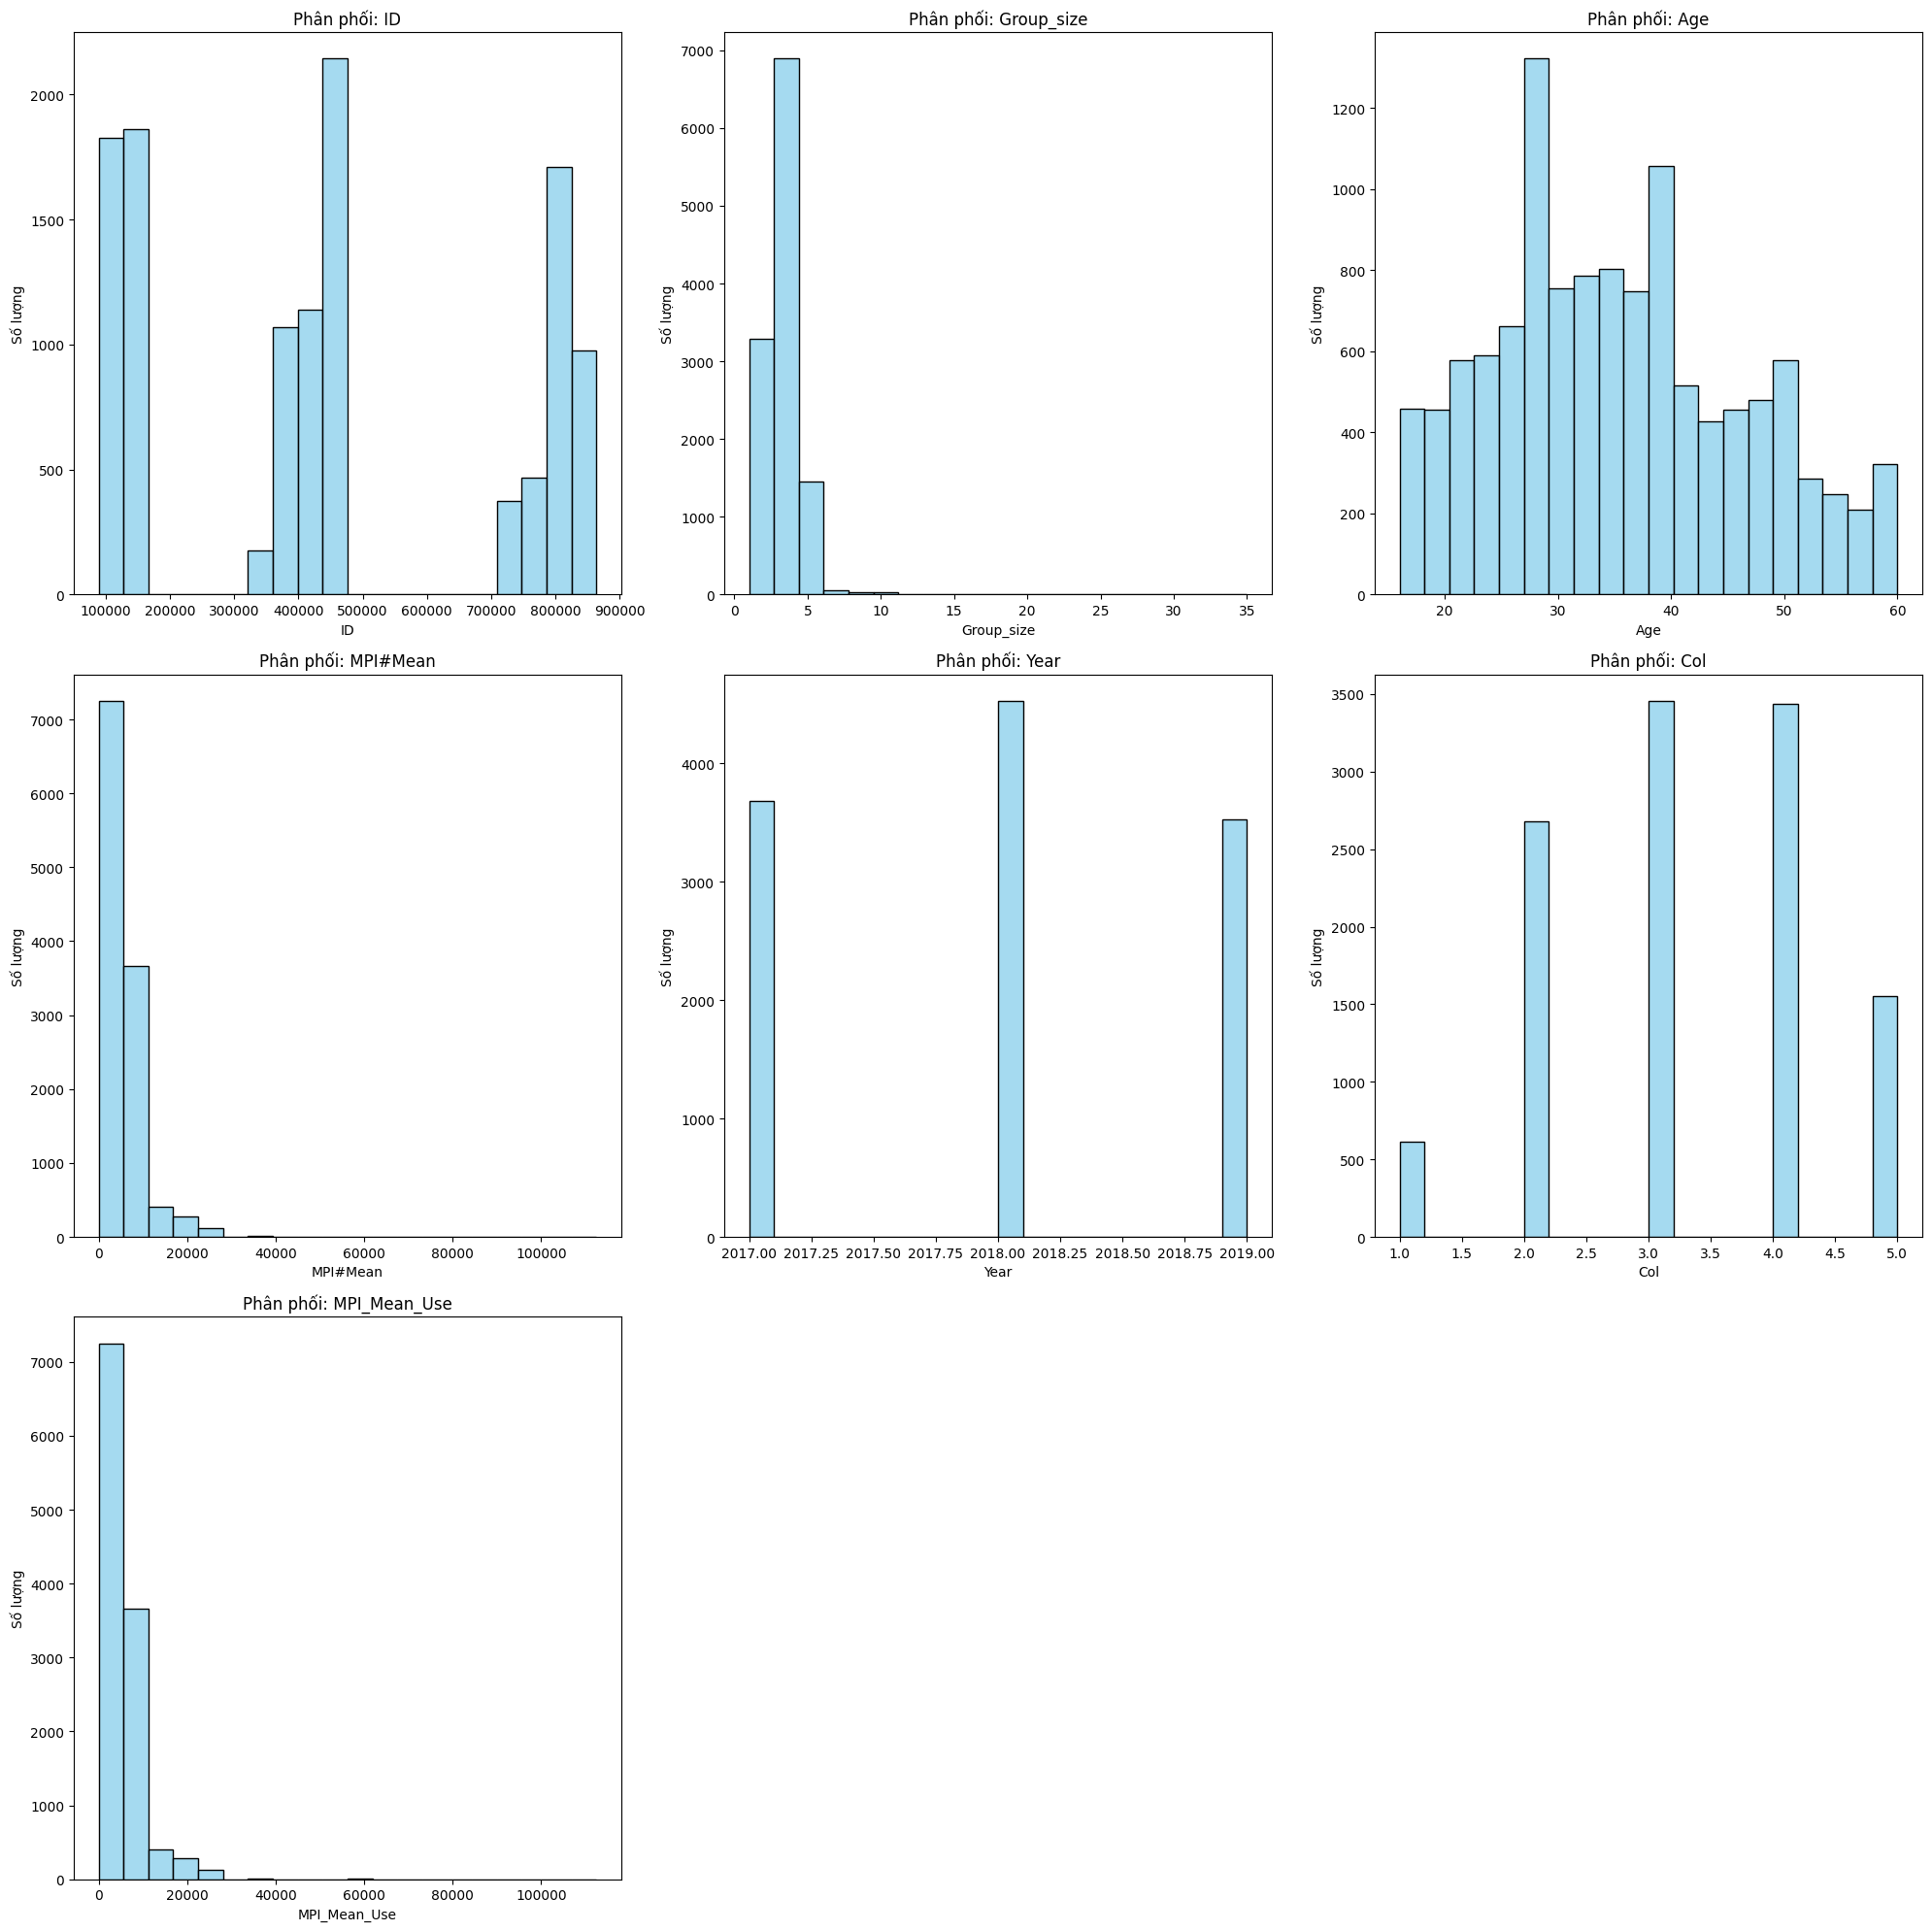

In [ ]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(sa[col], bins=20, color='skyblue')
    plt.title(f'Phân phối: {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()

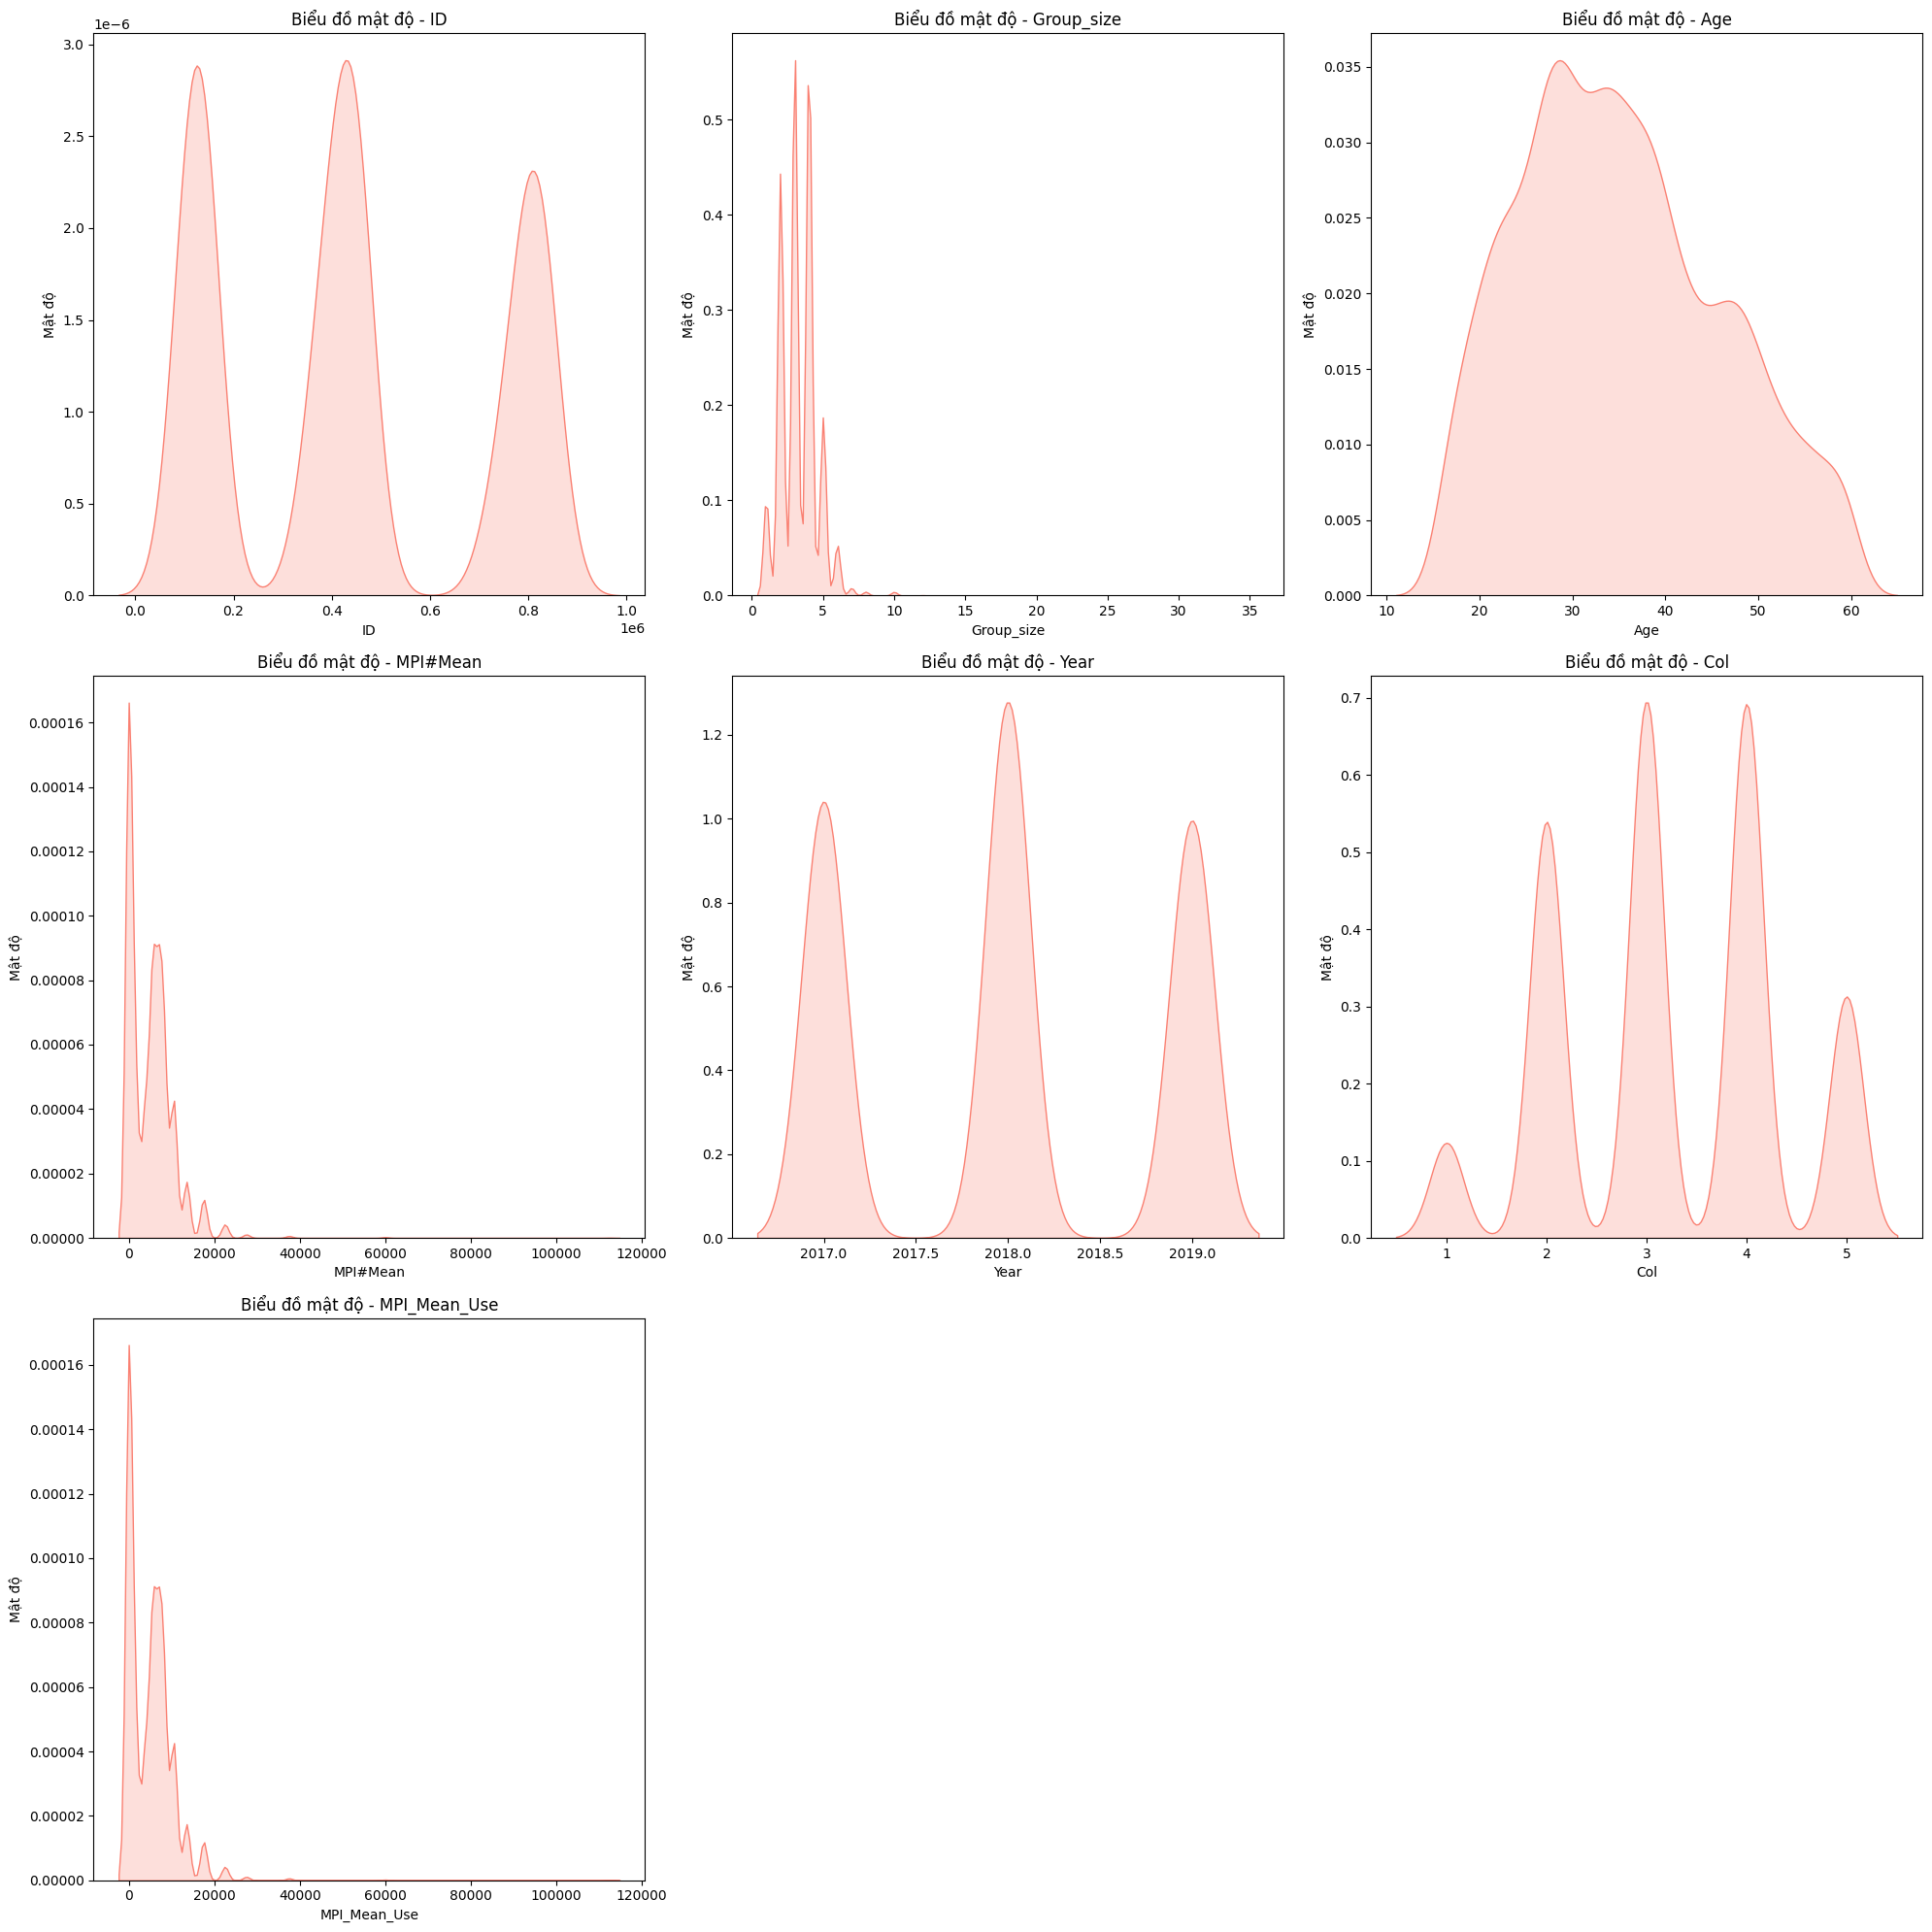

In [ ]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(sa[col], fill=True, color='salmon')
    plt.title(f'Biểu đồ mật độ - {col}')
    plt.xlabel(col)
    plt.ylabel('Mật độ')

plt.tight_layout()
plt.show()

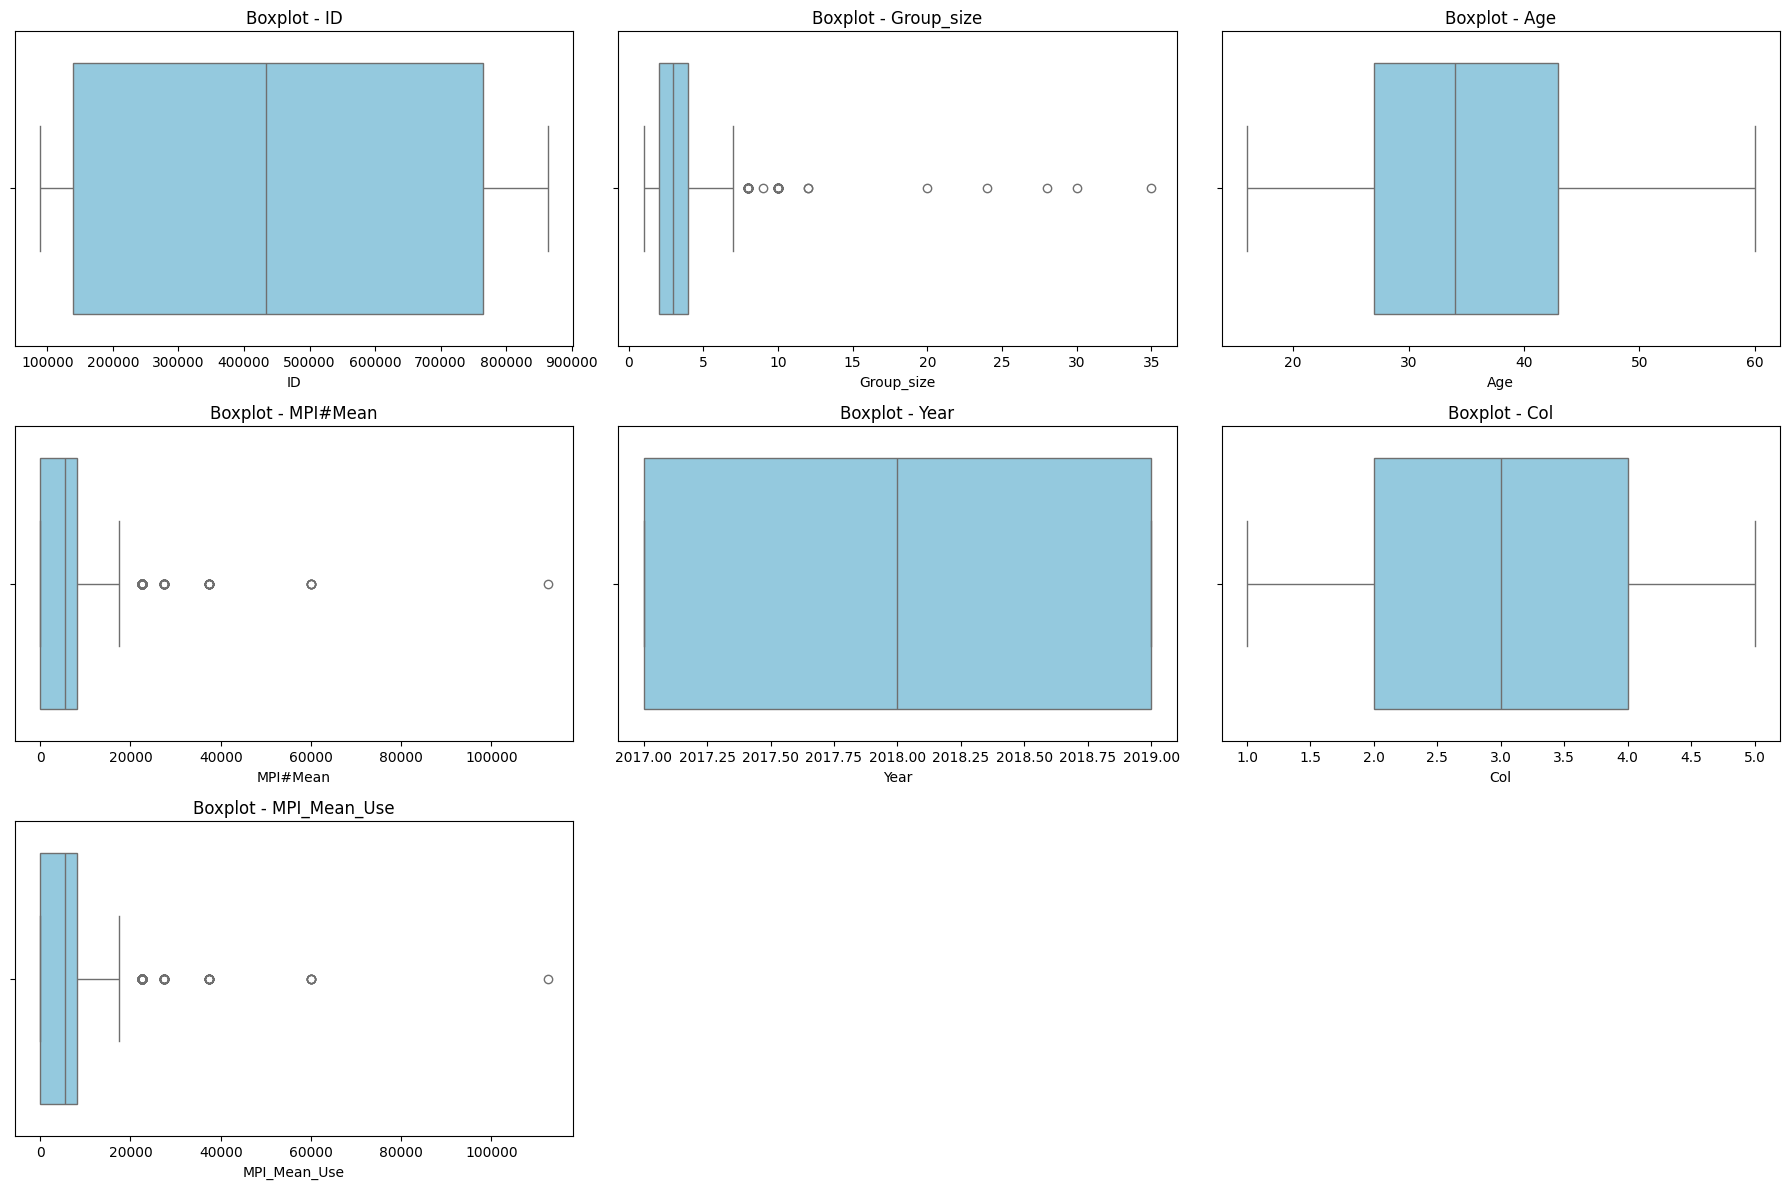

In [ ]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=sa[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Phân tích:
- ID không phải giá trị số thực sự mà chỉ là mã định danh. Year tuy là giá trị số nhưng quy định thời gian. Do đó ta không xem xét phân phối của 2 thuộc tính này.
- Hầu hết các thuộc tính số còn lại không tuân theo phân phối chuẩn, trong đó, MPI#Mean, MPI_Mean_Use, Group_size có nhiều giá trị ngoại lai.
- Không tồn tại giá trị âm trong số các thuộc tính dữ liệu số, điều này là phù hợp với dictionary. (Lưu ý: -1 trong MPI#Mean và MPI_Mean_Use đại diện cho các người dùng không cung cấp MPI).


Tiến hành kiểm tra xem có dữ liệu không nguyên (không hợp lệ) ở các cột

In [ ]:
numerical_data.dtypes

,0
ID,int64
Group_size,float64
Age,float64
MPI#Mean,float64
Year,int64
Col,int64
MPI_Mean_Use,float64


Ta chỉ cần kiểm tra dữ liệu ở cột Group_size và Age

In [ ]:
numerical_data['Group_size'].value_counts()

,count
Group_size,
3.0,3455
4.0,3437
2.0,2679
5.0,1127
1.0,612
6.0,324
7.0,48
8.0,24
10.0,23


Dữ liệu ở Group_size đã hợp lệ, chuyển thành kiểu int. Đa phần các nhóm có khoảng từ 3-4 người, nhưng vẫn có một số nhóm có số lượng người lớn (lên đến hơn 30 người)

In [ ]:
sa['Group_size'] = sa['Group_size'].astype(int)

In [ ]:
numerical_data['Age'].value_counts()

,count
Age,
28.0,456
29.0,449
27.0,417
34.0,416
33.0,415
30.0,401
35.0,388
37.0,375
39.0,375


Dữ liệu ở Age đã hợp lệ, chuyển thành kiểu int

In [ ]:
sa['Age'] = sa['Age'].astype(int)

In [ ]:
sa.dtypes

,0
ID,int64
City,object
Group_size,int64
Age,int64
MPI#Mean,float64
TOM,object
BUMO,object
BUMO_Previous,object
MostFavourite,object
Gender,object


## XỬ LÝ DỮ LIỆU PHÂN LOẠI

In [ ]:
categorical_data = sa.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 13 categorical features: 

['City', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation', 'Occupation#group']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]

In [ ]:
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         3034
Hồ Chí Minh    3029
Cần Thơ        1622
Đà Nẵng        1616
Hải Phòng      1563
Nha Trang       873
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Gender
Gender
Female    6548
Male      5189
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: MPI#detail
MPI#detail
Unknown                                      3685
From 4.5 millions to 6.49 millions VND       1727
From 6.5 millions to 7.49 millions VND       1499
From 7.5 millions to 8.99 millions VND       1179
From 9 millions to 11.99 millions VND         982
Under 3 millions VND                          947
From 3 millions to 4.49 millions VND          858
From 12 millions to 14.99 millions VND        405
From 15 millions to 19.99 millions VND        280
From 20 millions to 24.99 millions VND         98
Refuse                                         32
From 25 millions to 29.99 millions VND         25
From 30 millions to 

Như vậy, tất cả các dữ liệu phân loại đều hợp lệ, không có vấn đề nghiêm trọng. Trong MPI#2, nên chuyển đổi Unknown thành 6.Unknown để đồng bộ số nhóm. Bên cạnh đó, do khong thể khai thác thông tin gì từ nhóm Occupation Refuse, và số lượng người dùng ghi nhận trong nhóm đó không nhiều, nên có thể đồng nhất với Other Occupations (chuyển thành Other)

In [ ]:
sa['MPI#2'] = sa['MPI#2'].replace('Unknown','6.Unknown')

In [ ]:
sa['MPI#2'].value_counts(dropna = False).sort_index()

,count
MPI#2,
1.Under VND 4.5m,1805
2.VND 4.5m - VND 8.9m,4405
3.VND 9m - VND 14.9m,1387
4.VND 15m - VND 24.9m,378
5.VND 25m+,45
6.Unknown,3717


In [ ]:
sa['Occupation#group'].replace({
    'Other Occupations': 'Other',
    'Refuse': 'Other'
}, inplace = True)

<ipython-input-198-2214445683>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sa['Occupation#group'].replace({


In [ ]:
sa['Occupation#group'].value_counts(dropna = False)

,count
Occupation#group,
Blue Collar,3566
None Working,2983
White Collar,2810
Self Employed - Small Business and Freelance,2072
Self Employed - Company Owner,155
Other,151


Một số cột dữ liệu không được tính là phân loại (do số lượng giá trị riêng biệt thấp) cũng cần được xem xét

In [ ]:
non_categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() > 20]

In [ ]:
for col in non_categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: TOM
TOM
Other 1                                          3666
Street / Half street coffee (including carts)    2336
Indepedent Cafe                                  1753
Highlands Coffee                                 1685
Trung Nguyên                                      598
Milano                                            385
Cộng Cà Phê                                       299
Aha Cafe                                          240
The Coffee House                                  229
Other Branded Cafe Chain                          119
Phúc Long                                          92
Urban Station                                      86
Starbucks                                          62
Passio                                             30
Viva Star                                          30
Long Cafe                                          25
Mê Trang                                           22
Other 2                                            13
Mộc Miên  

In [ ]:
# Chuẩn hóa lại cột
brand_replacements = {
    'Street / Half street coffee (including carts)': 'Street Coffee',
    'Street': 'Street Coffee',
    'Indepedent Cafe': 'Independent Cafe',
    'Runam cafe': 'Runam Cafe',
    'KOI cafe': 'KOI Cafe',
    'Nia cafe': 'Nia Cafe',
    'Other 1': 'Other',
    'Other 2': 'Other',
    'Other 3': 'Other',
    'Other Branded Cafe Chain': 'Other'}



In [ ]:
for col in ['TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite']:
    sa[col] = sa[col].replace(brand_replacements)

In [ ]:
for col in non_categorical_cols:
    print(f"🔹 Column: {col}")
    print(sa[col].value_counts(dropna=False).sort_index())
    print("-" * 50)

🔹 Column: TOM
TOM
Aha Cafe                   240
BonPas                       7
Cheese Coffee                2
Coffee Bean & Tea Leaf       3
Cộng Cà Phê                299
Effoc                        7
Gong Cha                     7
Highlands Coffee          1685
Independent Cafe          1753
KOI Cafe                     2
Long Cafe                   25
Maxx Coffee                  8
Milano                     385
Mê Trang                    22
Mộc Miên                    10
Nia Cafe                     9
Other                     3799
Passio                      30
Phúc Long                   92
Runam Cafe                   3
Starbucks                   62
Street Coffee             2336
The Coffee Factory           1
The Coffee House           229
The Cups Coffee              1
Thức Coffee                  6
Trung Nguyên               598
Urban Station               86
Viva Star                   30
Name: count, dtype: int64
--------------------------------------------------
🔹 Colu

## LOẠI BỎ CÁC NHÓM KHÔNG CẦN THIẾT

Trong dataset có Age#Group và Age#Group#2 và Age#Group#2 chi tiết hơn, phục vụ cho phân tích. Giữ lại cả hai cột sẽ làm tăng số chiều dữ liệu không cần thiết, nên sẽ loại bỏ Age#Group. Trong trường hợp cần thiết, vẫn có thể tạo lại Age#Group từ Age#Group#2

In [ ]:
sa = sa.drop(columns = 'Age#group')

Kiểm tra tính tương đồng giữa MPI#Mean và MPI_MEAN_USE

In [ ]:
sa[sa['MPI#Mean'] != sa['MPI_Mean_Use']]

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use


Như vậy cột MPI#Mean và MPI_Mean_Use hoàn toàn tương tự, có thể loại bỏ đi 1 cột

In [ ]:
sa.drop(columns = 'MPI_Mean_Use', inplace = True)

In [ ]:
sa['MPI'].value_counts()

,count
MPI,
VND 4.5m - VND 8.9m,4405
Unknown,3717
Under VND 4.5m,1805
VND 9m - VND 14.9m,1387
VND 15m - VND 24.9m,378
VND 25m+,45


In [ ]:
sa['MPI#2'].value_counts()

,count
MPI#2,
2.VND 4.5m - VND 8.9m,4405
6.Unknown,3717
1.Under VND 4.5m,1805
3.VND 9m - VND 14.9m,1387
4.VND 15m - VND 24.9m,378
5.VND 25m+,45


Hai cột này hoàn toàn giống nhau, chỉ khác biệt ở chỗ 1 cột có đánh số thứ tự, nên ta sẽ để lại cột có đánh số thứ tự

In [ ]:
sa.drop(columns = 'MPI', inplace = True)

In [ ]:
sa['MPI#detail'].value_counts()

,count
MPI#detail,
Unknown,3685
From 4.5 millions to 6.49 millions VND,1727
From 6.5 millions to 7.49 millions VND,1499
From 7.5 millions to 8.99 millions VND,1179
From 9 millions to 11.99 millions VND,982
Under 3 millions VND,947
From 3 millions to 4.49 millions VND,858
From 12 millions to 14.99 millions VND,405
From 15 millions to 19.99 millions VND,280


In [ ]:
for col in ['MPI#2', 'MPI#detail']:
    print(f"🔹 Column: {col}")
    print(sa[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: MPI#2
MPI#2
2.VND 4.5m - VND 8.9m    4405
6.Unknown                3717
1.Under VND 4.5m         1805
3.VND 9m - VND 14.9m     1387
4.VND 15m - VND 24.9m     378
5.VND 25m+                 45
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: MPI#detail
MPI#detail
Unknown                                      3685
From 4.5 millions to 6.49 millions VND       1727
From 6.5 millions to 7.49 millions VND       1499
From 7.5 millions to 8.99 millions VND       1179
From 9 millions to 11.99 millions VND         982
Under 3 millions VND                          947
From 3 millions to 4.49 millions VND          858
From 12 millions to 14.99 millions VND        405
From 15 millions to 19.99 millions VND        280
From 20 millions to 24.99 millions VND         98
Refuse                                         32
From 25 millions to 29.99 millions VND         25
From 30 millions to 44.99 millions VND         14
From 45 millions to 74.99 millions VND 

Tương tự như đối với Age Group, ta chỉ giữ lại cột có số nhóm chi tiết hơn, tuy nhiên việc giữ lại này cần phải được thông báo để không bị lãng quên rằng từng có 1 cột dữ liệu chứa thông tin phân nhóm tổng quát hơn, nếu mô hình phân cụm cần có thể sử dụng lại

In [ ]:
mapping = {
    "Under 3 millions VND": "0–2.99",
    "From 3 millions to 4.49 millions VND": "3–4.49",
    "From 4.5 millions to 6.49 millions VND": "4.5–6.49",
    "From 6.5 millions to 7.49 millions VND": "6.5–7.49",
    "From 7.5 millions to 8.99 millions VND": "7.5–8.99",
    "From 9 millions to 11.99 millions VND": "9–11.99",
    "From 12 millions to 14.99 millions VND": "12–14.99",
    "From 15 millions to 19.99 millions VND": "15–19.99",
    "From 20 millions to 24.99 millions VND": "20–24.99",
    "From 25 millions to 29.99 millions VND": "25–29.99",
    "From 30 millions to 44.99 millions VND": "30–44.99",
    "From 45 millions to 74.99 millions VND": "45–74.99",
    "From 75 million to VND 149.99 million VND": "75–149.99",
    "Refuse": "Refuse",
    "Unknown": "Unknown"
}

sa["MPI#range_clean"] = sa["MPI#detail"].map(mapping)

In [ ]:
sa.drop(columns = ['MPI#2','MPI#detail'], inplace = True)

Bởi vì cột col không cần thiết cho cuộc thi nên có thể loại bỏ


In [ ]:
sa.drop(columns = 'Col', inplace = True)

In [ ]:
sa.columns

Index(['ID', 'City', 'Group_size', 'Age', 'MPI#Mean', 'TOM', 'BUMO',
       'BUMO_Previous', 'MostFavourite', 'Gender', 'Age#Group#2', 'Occupation',
       'Occupation#group', 'Year', 'MPI#range_clean'],
      dtype='object')

## KIỂM TRA LOGIC CỦA DỮ LIỆU

Kiểm tra xem dữ liệu ở 1 nhóm có tương thích với nhóm khác không, ví dụ Age và AgeGroup, MPI#Mean và MPI#range_clean

In [ ]:
sa['Age#Group#2'].value_counts()

,count
Age#Group#2,
45+ y.o.,2578
25 - 29 y.o.,1984
30 - 34 y.o.,1959
35 - 39 y.o.,1873
20 - 24 y.o.,1408
40 - 44 y.o.,1261
16 - 19 y.o.,674


In [ ]:
def map_age_to_group2(age):
    if 16 <= age <= 19:
        return '16 - 19 y.o.'
    elif 20 <= age <= 24:
        return '20 - 24 y.o.'
    elif 25 <= age <= 29:
        return '25 - 29 y.o.'
    elif 30 <= age <= 34:
        return '30 - 34 y.o.'
    elif 35 <= age <= 39:
        return '35 - 39 y.o.'
    elif 40 <= age <= 44:
        return '40 - 44 y.o.'
    elif age >= 45:
        return '45+ y.o.'
    else:
        return 'Unknown'

sa['Age#Group#2_check'] = sa['Age'].apply(map_age_to_group2)

In [ ]:
# Kiểm tra số dòng không khớp
mismatch = sa[sa['Age#Group#2'] != sa['Age#Group#2_check']]
print(f'Số dòng không khớp: {len(mismatch)}')

Số dòng không khớp: 0


Như vậy, tất cả các dòng đều có Age khớp với AgeGroup. Tương tự với MPI#Mean và MPI#range

In [ ]:
sa['MPI#range_clean'].value_counts().sort_index()

,count
MPI#range_clean,
0–2.99,947
12–14.99,405
15–19.99,280
20–24.99,98
25–29.99,25
30–44.99,14
3–4.49,858
4.5–6.49,1727
45–74.99,5


Do đơn vị ở cột MPI#Mean khác với ở MPI#range, nên ta tiến hành đồng nhất đơn vị

In [ ]:
sa['MPI#Mean'] = sa['MPI#Mean'].apply(lambda x: x / 1000 if x > 0 else x)


In [ ]:
def map_mean_to_range_clean(mean):
    if 0 < mean < 3.0:
        return '0–2.99'
    elif 3.0 <= mean <= 4.49:
        return '3–4.49'
    elif 4.5 <= mean <= 6.49:
        return '4.5–6.49'
    elif 6.5 <= mean <= 7.49:
        return '6.5–7.49'
    elif 7.5 <= mean <= 8.99:
        return '7.5–8.99'
    elif 9.0 <= mean <= 11.99:
        return '9–11.99'
    elif 12.0 <= mean <= 14.99:
        return '12–14.99'
    elif 15.0 <= mean <= 19.99:
        return '15–19.99'
    elif 20.0 <= mean <= 24.99:
        return '20–24.99'
    elif 25.0 <= mean <= 29.99:
        return '25–29.99'
    elif 30.0 <= mean <= 44.99:
        return '30–44.99'
    elif 45.0 <= mean <= 74.99:
        return '45–74.99'
    elif 75.0 <= mean <= 149.99:
        return '75–149.99'
    else:
        return 'Unknown'

# Tạo cột kiểm tra
sa['MPI#range_clean_check'] = sa['MPI#Mean'].apply(map_mean_to_range_clean)

In [ ]:
mismatch = sa[(sa['MPI#range_clean_check'] != sa['MPI#range_clean']) & (sa['MPI#range_clean'] != 'Refuse')]
print(f'Số dòng không khớp: {len(mismatch)}')

Số dòng không khớp: 0


Như vậy, mọi dòng trong dataset đều có MPI khớp với MPI_range

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11737 entries, 0 to 11760
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     11737 non-null  int64  
 1   City                   11737 non-null  object 
 2   Group_size             11737 non-null  int64  
 3   Age                    11737 non-null  int64  
 4   MPI#Mean               11737 non-null  float64
 5   TOM                    11737 non-null  object 
 6   BUMO                   11737 non-null  object 
 7   BUMO_Previous          11737 non-null  object 
 8   MostFavourite          11737 non-null  object 
 9   Gender                 11737 non-null  object 
 10  Age#Group#2            11737 non-null  object 
 11  Occupation             11737 non-null  object 
 12  Occupation#group       11737 non-null  object 
 13  Year                   11737 non-null  int64  
 14  MPI#range_clean        11737 non-null  object 
 15  Age#Gro

Drop các cột check đã tạo

In [ ]:
sa.drop(columns = ['Age#Group#2_check', 'MPI#range_clean_check'], inplace = True)

In [ ]:
sa.columns

Index(['ID', 'City', 'Group_size', 'Age', 'MPI#Mean', 'TOM', 'BUMO',
       'BUMO_Previous', 'MostFavourite', 'Gender', 'Age#Group#2', 'Occupation',
       'Occupation#group', 'Year', 'MPI#range_clean'],
      dtype='object')

Đổi tên các cột lại theo chuẩn UPPER Camel Case

In [ ]:
sa.rename(columns = {
    'MPI#Mean' : 'MPIMean',
    'Age#Group#2' : 'AgeGroup',
    'Occupation#group' : 'OccupationGroup',
    'MPI#range_clean' : 'MPIRange',
    'Group_size': 'GroupSize',
    'BUMO_Previous': 'BUMOPrevious'
}, inplace = True)

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11737 entries, 0 to 11760
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               11737 non-null  int64  
 1   City             11737 non-null  object 
 2   GroupSize        11737 non-null  int64  
 3   Age              11737 non-null  int64  
 4   MPIMean          11737 non-null  float64
 5   TOM              11737 non-null  object 
 6   BUMO             11737 non-null  object 
 7   BUMOPrevious     11737 non-null  object 
 8   MostFavourite    11737 non-null  object 
 9   Gender           11737 non-null  object 
 10  AgeGroup         11737 non-null  object 
 11  Occupation       11737 non-null  object 
 12  OccupationGroup  11737 non-null  object 
 13  Year             11737 non-null  int64  
 14  MPIRange         11737 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.4+ MB


Kiểm tra ID

In [ ]:
print(sa['ID'].min())
print(sa['ID'].max())

89100
863754


Lưu ý: Lúc đầu để xử lý giá trị thiếu trong MPIMean, ta đã thay nó bằng -1, điều này nhằm phục vụ cho quá trình tính toán phía sau với MPIMean là 1 cột dữ liệu số, tuy nhiên nếu sử dụng dataset này mà không được cảnh báo -1 là đại diện đặc biệt có thể gây lỗi, nên ta chuyển cột MPIMean thành kiểu chuỗi (string) và thay -1 bằng Unknown. Khi nào cần tính toán ta sẽ đổi lại kiểu dữ liệu và chọn lọc các giá trị đã biết.

In [ ]:
sa['MPIMean'] = sa['MPIMean'].astype(str)

In [ ]:
sa['MPIMean'] = sa['MPIMean'].replace('-1.0','Unknown')

In [ ]:
sa['MPIMean'].value_counts(dropna = False)

,count
MPIMean,
Unknown,3717
5.499,1727
6.999,1499
8.249,1179
10.499,982
1.499,947
3.749,858
13.499,405
17.499,280


In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11737 entries, 0 to 11760
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               11737 non-null  int64 
 1   City             11737 non-null  object
 2   GroupSize        11737 non-null  int64 
 3   Age              11737 non-null  int64 
 4   MPIMean          11737 non-null  object
 5   TOM              11737 non-null  object
 6   BUMO             11737 non-null  object
 7   BUMOPrevious     11737 non-null  object
 8   MostFavourite    11737 non-null  object
 9   Gender           11737 non-null  object
 10  AgeGroup         11737 non-null  object
 11  Occupation       11737 non-null  object
 12  OccupationGroup  11737 non-null  object
 13  Year             11737 non-null  int64 
 14  MPIRange         11737 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.4+ MB


In [ ]:
# Chuyển ID thành kiểu chuỗi
sa['ID'] = sa['ID'].astype(str)

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11737 entries, 0 to 11760
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               11737 non-null  object
 1   City             11737 non-null  object
 2   GroupSize        11737 non-null  int64 
 3   Age              11737 non-null  int64 
 4   MPIMean          11737 non-null  object
 5   TOM              11737 non-null  object
 6   BUMO             11737 non-null  object
 7   BUMOPrevious     11737 non-null  object
 8   MostFavourite    11737 non-null  object
 9   Gender           11737 non-null  object
 10  AgeGroup         11737 non-null  object
 11  Occupation       11737 non-null  object
 12  OccupationGroup  11737 non-null  object
 13  Year             11737 non-null  int64 
 14  MPIRange         11737 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.4+ MB


In [ ]:
sa.duplicated().sum()

np.int64(0)

Xuất file dữ liệu

In [ ]:
# Lưu vào thư mục Datasets trong MyDrive
sa.to_csv('/content/drive/MyDrive/sa_cleaned.csv', index=False)

# 🟢 **COMPANION**

In [ ]:
companion_copy = companion.copy()

In [ ]:
companion_copy.head()

,ID,City,Companion#group,Year
0,725466,Hà Nội,Friends,2019
1,726862,Hà Nội,Friends,2019
2,727015,Hà Nội,Friends,2019
3,727219,Hà Nội,Friends,2019
4,727611,Hà Nội,Friends,2019


In [ ]:
companion_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               20739 non-null  int64 
 1   City             20739 non-null  object
 2   Companion#group  20739 non-null  object
 3   Year             20739 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 648.2+ KB


 DATA DESCRIPTION

| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **City** | City where the respondent resides or visited the coffee shop. |
| **Companion#group** | The usual type of companion the respondent has when visiting a coffee shop.
| **Year** | Year of data collection.


In [ ]:
companion_copy.shape

(20739, 4)

Như vậy trong Companion không tồn tại giá trị NaN


In [ ]:
companion_copy[companion_copy.duplicated(keep = False)].value_counts()

,,,,count
ID,City,Companion#group,Year,
818029,Cần Thơ,Family,2019,6
763845,Cần Thơ,Family,2019,5
822683,Hải Phòng,Family,2019,5
745160,Đà Nẵng,Family,2019,5
815842,Cần Thơ,Family,2019,5
...,...,...,...,...
842309,Cần Thơ,Family,2019,2
843373,Cần Thơ,Family,2019,2
843391,Cần Thơ,Family,2019,2


Nhận thấy có khá nhiều dòng trùng lặp, cần tiến hành loại bỏ

In [ ]:
companion_copy.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
companion_copy.duplicated().sum()

np.int64(0)

In [ ]:
companion_copy.shape

(19940, 4)

In [ ]:
companion_copy['ID'].duplicated().sum()

np.int64(8194)

Nhận thấy có khá nhiều ID bị lặp lại nhưng bản thân dòng đó thì không trùng lặp

In [ ]:
companion_copy[companion_copy['ID'].duplicated(keep = False)].sort_values(by = 'ID')

,ID,City,Companion#group,Year
3427,89100,Hồ Chí Minh,Friends,2017
20222,89100,Hồ Chí Minh,Boyfriend / Girlfriend,2017
3428,89101,Hồ Chí Minh,Friends,2017
12810,89101,Hồ Chí Minh,Family,2017
16858,89613,Hồ Chí Minh,Colleagues / Business partner,2017
...,...,...,...,...
18352,862458,Nha Trang,Colleagues / Business partner,2019
18714,863754,Nha Trang,Alone,2019
18353,863754,Nha Trang,Colleagues / Business partner,2019
9146,863754,Nha Trang,Friends,2019


In [ ]:
companion_copy['ID'].value_counts()[companion_copy['ID'].value_counts() > 1]  #ID xuất hiện nhiều hơn 1 lần


,count
ID,
816450,5
423111,5
752826,5
115982,5
124755,5
...,...
732958,2
806327,2
729954,2


In [ ]:
duplicate_ids = companion_copy[companion_copy['ID'].duplicated(keep=False)]
duplicate_ids.groupby('ID').agg(lambda x: x.nunique()).sort_values(by = 'Companion#group')

,City,Companion#group,Year
ID,,,
92564,1,2,1
92584,1,2,1
92615,1,2,1
92616,1,2,1
91143,1,2,1
...,...,...,...
423111,1,5,1
115982,1,5,1
752826,1,5,1


Như vậy các ID xuất hiện nhiều lần với nhiều nhóm Companion khác nhau. Điều này không phải là bất thường.

In [ ]:
for col in companion_copy.columns:
    print(f"🔹 Column: {col}")
    print(companion_copy[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: ID
ID
816450    5
423111    5
752826    5
115982    5
124755    5
         ..
443588    1
438404    1
424224    1
416831    1
416335    1
Name: count, Length: 11746, dtype: int64
--------------------------------------------------
🔹 Column: City
City
Hà Nội         5461
Hồ Chí Minh    4956
Cần Thơ        2836
Đà Nẵng        2761
Hải Phòng      2505
Nha Trang      1421
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Companion#group
Companion#group
Friends                          9663
Family                           5125
Colleagues / Business partner    2934
Alone                            1473
Boyfriend / Girlfriend            718
Others                             27
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Year
Year
2018    7589
2019    6303
2017    6048
Name: count, dtype: int64
--------------------------------------------------


Dữ liệu chung quy không có điểm nào bất thường. Ta chỉ cần tiến hành đổi tên cột: Companion#group

In [ ]:
companion_copy.rename(columns= {'Companion#group': 'CompanionGroup'}, inplace = True)

In [ ]:
print(companion_copy['ID'].min())
print(companion_copy['ID'].max())

89100
863754


Như vậy các ID đều hợp lệ

In [ ]:
companion_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 0 to 20738
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              19940 non-null  int64 
 1   City            19940 non-null  object
 2   CompanionGroup  19940 non-null  object
 3   Year            19940 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 778.9+ KB


In [ ]:
# Chuyển ID thành kiểu chuỗi
companion_copy['ID'] = companion_copy['ID'].astype(str)

Xuất file

In [ ]:
companion_copy.to_csv('/content/drive/MyDrive/companion_cleaned.csv', index=False)

# 🟢 **DAYOFWEEK**

In [ ]:
dayofweek_copy = dayofweek.copy()

In [ ]:
dayofweek_copy.head()

,ID,City,Dayofweek,Visit#Dayofweek,Year,Weekday#end
0,344625,Cần Thơ,Monday,4.0,2018,Weekdays
1,345343,Cần Thơ,Monday,4.0,2018,Weekdays
2,346249,Cần Thơ,Monday,4.0,2018,Weekdays
3,346725,Cần Thơ,Monday,4.0,2018,Weekdays
4,346833,Cần Thơ,Monday,4.0,2018,Weekdays


In [ ]:
dayofweek_copy.shape

(39095, 6)

In [ ]:
dayofweek_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39095 entries, 0 to 39094
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               39095 non-null  int64  
 1   City             39095 non-null  object 
 2   Dayofweek        39009 non-null  object 
 3   Visit#Dayofweek  39041 non-null  float64
 4   Year             39095 non-null  int64  
 5   Weekday#end      39009 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ MB


Dataset có 39095 dòng và 6 cột, trong đó:
- Các cột Weekday#end, Visit#Dayofweek, Dayofweek có giá trị trống
- Kiểu dữ liệu ở các cột không có vấn đề

Đánh giá xem các dòng dữ liệu có trùng lặp

In [ ]:
dayofweek_copy[dayofweek_copy.duplicated(keep = False)].sort_values(by = 'ID')

,ID,City,Dayofweek,Visit#Dayofweek,Year,Weekday#end
32178,108221,Cần Thơ,NaN,1.0,2017,NaN
32179,108221,Cần Thơ,NaN,1.0,2017,NaN
32180,108221,Cần Thơ,NaN,1.0,2017,NaN
32177,108221,Cần Thơ,NaN,1.0,2017,NaN
15246,110418,Hải Phòng,NaN,4.0,2017,NaN
15248,110418,Hải Phòng,NaN,4.0,2017,NaN
15247,110418,Hải Phòng,NaN,4.0,2017,NaN
15249,110418,Hải Phòng,NaN,4.0,2017,NaN
15251,116047,Cần Thơ,NaN,4.0,2017,NaN
15253,116047,Cần Thơ,NaN,4.0,2017,NaN


Nhận thấy có một số dòng xuất hiện nhiều lần, tiến hành loại bỏ các dòng này

In [ ]:
dayofweek_copy.drop_duplicates(keep  ='first', inplace = True)

Kiểm tra lại

In [ ]:
dayofweek_copy.duplicated().sum()

np.int64(0)

## DATA DESCRIPTION



| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **City** | City where the respondent resides or visited the coffee shop. |
| **Year** | Year of data collection.,
| **Dayofweek** | Specific day of the week when the visit occurred.
| **Visit#Dayofweek** | Number of visits made on that particular day of the week.
| **Weakday#end** | Classification of the day as Weekdays or Weekend



## KIỂM TRA DỮ LIỆU TRỐNG

In [ ]:
dayofweek_copy.isna().sum()

,0
ID,0
City,0
Dayofweek,49
Visit#Dayofweek,54
Year,0
Weekday#end,49


Có thể có mối liên hệ giữa giá trị trống trong Dayofweek và Weekday#end

In [ ]:
dayofweek_copy[dayofweek_copy['Dayofweek'].isna() & dayofweek_copy['Weekday#end'].isna()].shape

(49, 6)

Như vậy toàn bộ 49 dòng có dayofweek trống đều dẫn đến Weekday#end trống. Do số lượng dòng trống thấp nên có thể loại bỏ

In [ ]:
dayofweek_copy.dropna(subset = ['Dayofweek','Weekday#end'], inplace = True)

In [ ]:
dayofweek_copy.isna().sum()

,0
ID,0
City,0
Dayofweek,0
Visit#Dayofweek,54
Year,0
Weekday#end,0


In [ ]:
dayofweek_copy[dayofweek_copy['Visit#Dayofweek'].isna()]

,ID,City,Dayofweek,Visit#Dayofweek,Year,Weekday#end
38661,738942,Hà Nội,Saturday,NaN,2019,Weekends
38663,739729,Hồ Chí Minh,Saturday,NaN,2019,Weekends
38724,362412,Hà Nội,Friday,NaN,2018,Weekdays
38725,368104,Hải Phòng,Sunday,NaN,2018,Weekends
38726,368681,Hồ Chí Minh,Friday,NaN,2018,Weekdays
38727,370869,Hồ Chí Minh,Tuesday,NaN,2018,Weekdays
38728,370869,Hồ Chí Minh,Wednesday,NaN,2018,Weekdays
38729,371028,Hải Phòng,Sunday,NaN,2018,Weekends
38734,377402,Hà Nội,Friday,NaN,2018,Weekdays
38736,392041,Hải Phòng,Sunday,NaN,2018,Weekends


In [ ]:
dayofweek_copy['Visit#Dayofweek'].value_counts(dropna = False)

,count
Visit#Dayofweek,
4.0,15200
2.0,7491
3.0,4739
1.0,4674
5.0,3808
6.0,1057
8.0,905
7.0,316
10.0,308


Bởi vì dữ liệu NaN ở cột Visit#Dayofweek không có ý nghĩa, và số lượng dữ liệu trống không đáng kể nên có thể loại bỏ

In [ ]:
dayofweek_copy.dropna(subset = 'Visit#Dayofweek', inplace = True)

In [ ]:
dayofweek_copy.isna().sum()

,0
ID,0
City,0
Dayofweek,0
Visit#Dayofweek,0
Year,0
Weekday#end,0


Như vậy không còn dữ liệu thiếu ở trong tập dữ liệu

Kiểm tra xem ID có trùng lặp hay không

In [ ]:
dayofweek_copy[dayofweek_copy['ID'].duplicated(keep = False)].sort_values(by = 'ID')

,ID,City,Dayofweek,Visit#Dayofweek,Year,Weekday#end
18155,89100,Hồ Chí Minh,Thursday,2.0,2017,Weekdays
18156,89100,Hồ Chí Minh,Friday,2.0,2017,Weekdays
14547,89100,Hồ Chí Minh,Sunday,4.0,2017,Weekends
18154,89100,Hồ Chí Minh,Monday,2.0,2017,Weekdays
19851,89100,Hồ Chí Minh,Saturday,2.0,2017,Weekends
...,...,...,...,...,...,...
15432,863754,Nha Trang,Friday,2.0,2019,Weekdays
15430,863754,Nha Trang,Wednesday,2.0,2019,Weekdays
15428,863754,Nha Trang,Monday,2.0,2019,Weekdays
15429,863754,Nha Trang,Tuesday,2.0,2019,Weekdays


ID lặp lại nhiều lần nhưng dòng dữ liệu không lặp lại, thể hiện rằng người dùng có thể quay lại nhiều lần vào các ngày khác nhau trong tuần, không phải điểm bất thường

## XỬ LÝ DỮ LIỆU SỐ

Dữ liệu số trong dataset này bao gồm năm và số lần ghé thăm theo ngày

In [ ]:
dayofweek_copy['Visit#Dayofweek'].skew()

np.float64(2.385270534294611)

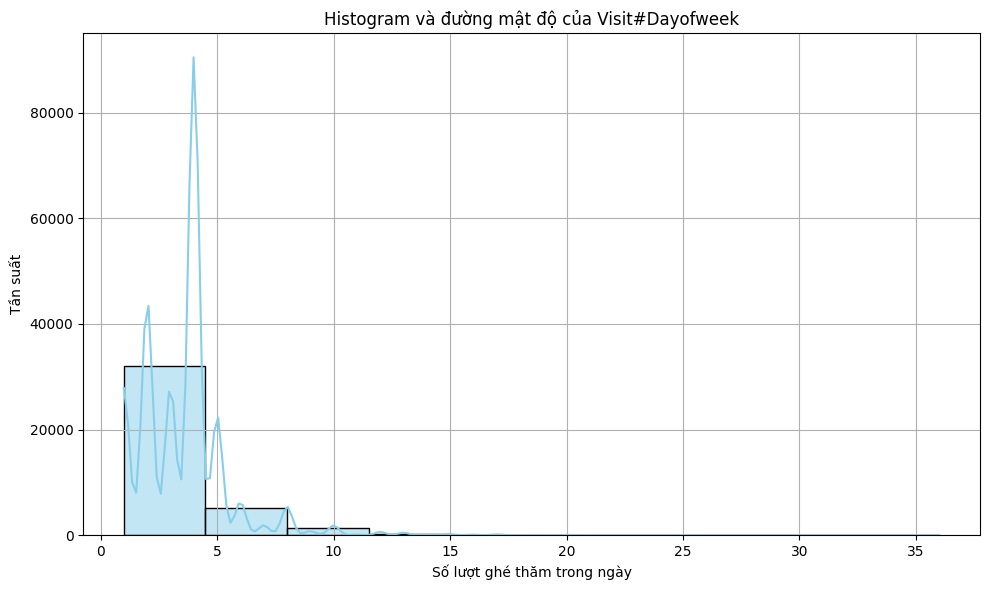

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dayofweek_copy['Visit#Dayofweek'], kde=True, bins=10, color='skyblue')
plt.title('Histogram và đường mật độ của Visit#Dayofweek')
plt.xlabel('Số lượt ghé thăm trong ngày')
plt.ylabel('Tần suất')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-514-3951436299>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')


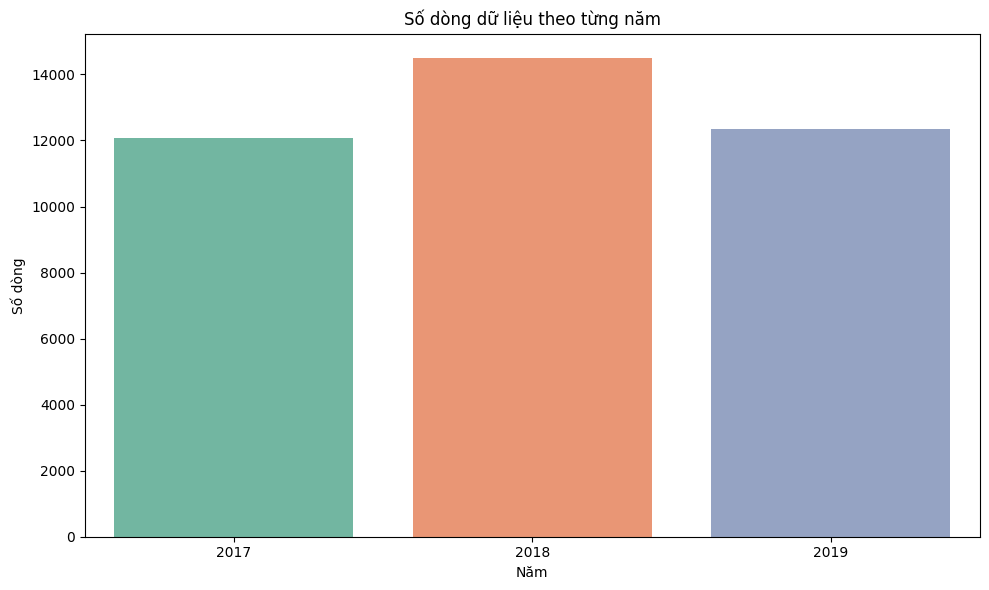

In [ ]:
year_counts = dayofweek_copy['Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')
plt.title('Số dòng dữ liệu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số dòng')
plt.tight_layout()
plt.show()

Nhận xét:
- Dữ liệu số lượt ghé thăm trong ngày không có phân phối chuẩn, và lệch phải, tồn tại nhiều giá trị lớn hơn 10.
- Năm chủ yếu được ghi nhận là 2018, số lượng ghi nhận ở các năm khác cũng không thấp hơn nhiều

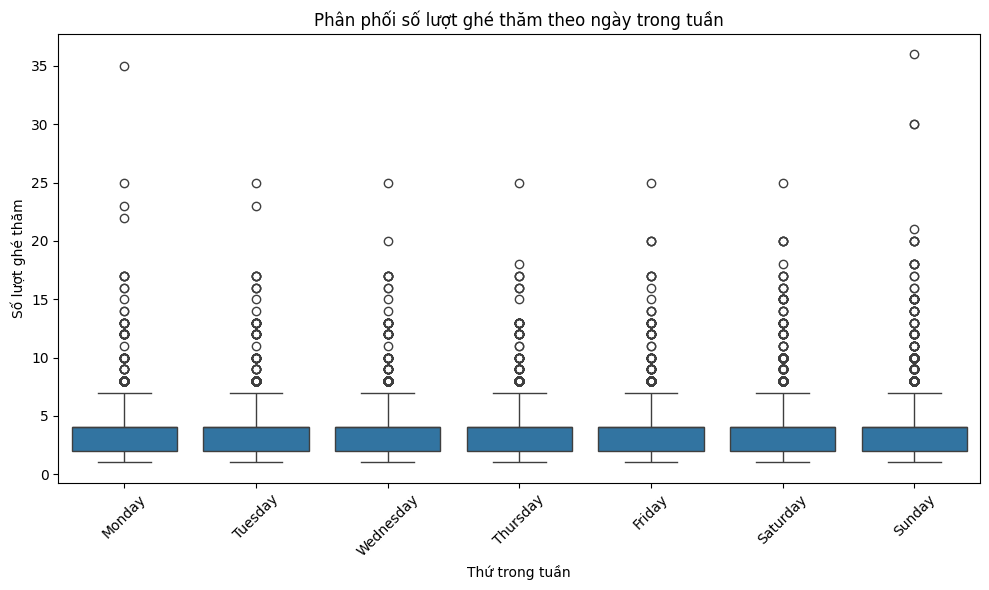

In [ ]:
# Vẽ biểu đồ boxplot để thấy phân phối theo ngày trong tuần
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dayofweek', y='Visit#Dayofweek', data=dayofweek_copy, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Phân phối số lượt ghé thăm theo ngày trong tuần')
plt.ylabel('Số lượt ghé thăm')
plt.xlabel('Thứ trong tuần')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tồn tại nhiều giá trị ngoại lai xét số lượng lần ghé thăm ứng với mỗi ngày trong tuần. Những đối tượng có số lần ghé thăm cao này có thể là các khách hàng trung thành.

Kiểm tra xem Visit#Dayofweek có chứa giá trị không nguyên hoặc âm (không hợp lệ)

In [ ]:
dayofweek_copy[(dayofweek_copy['Visit#Dayofweek'] < 0) | (dayofweek_copy['Visit#Dayofweek'] != dayofweek_copy['Visit#Dayofweek'].astype(int))]

,ID,City,Dayofweek,Visit#Dayofweek,Year,Weekday#end


Như vậy dữ liệu ở cột Visit#Dayofweek đã hợp lệ, chuyển thành kiểu số nguyên

In [ ]:
dayofweek_copy['Visit#Dayofweek'] = dayofweek_copy['Visit#Dayofweek'].astype(int)

In [ ]:
dayofweek_copy.dtypes

,0
ID,int64
City,object
Dayofweek,object
Visit#Dayofweek,int64
Year,int64
Weekday#end,object


## XỬ LÝ DỮ LIỆU PHÂN LOẠI

In [ ]:
categorical_data = dayofweek_copy.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 3 categorical features: 

['City', 'Dayofweek', 'Weekday#end']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hồ Chí Minh    10048
Hà Nội          7545
Cần Thơ         7330
Đà Nẵng         6808
Hải Phòng       3684
Nha Trang       3540
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Dayofweek
Dayofweek
Sunday       9235
Saturday     8623
Thursday     4440
Friday       4419
Wednesday    4234
Monday       4072
Tuesday      3932
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Weekday#end
Weekday#end
Weekdays    21097
Weekends    17858
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-521-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


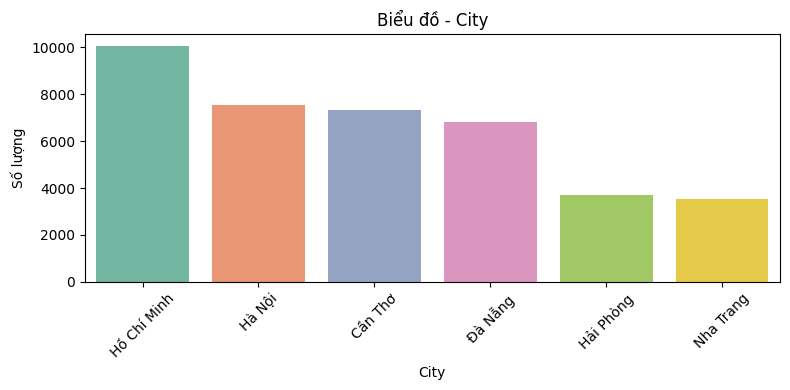

<ipython-input-521-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


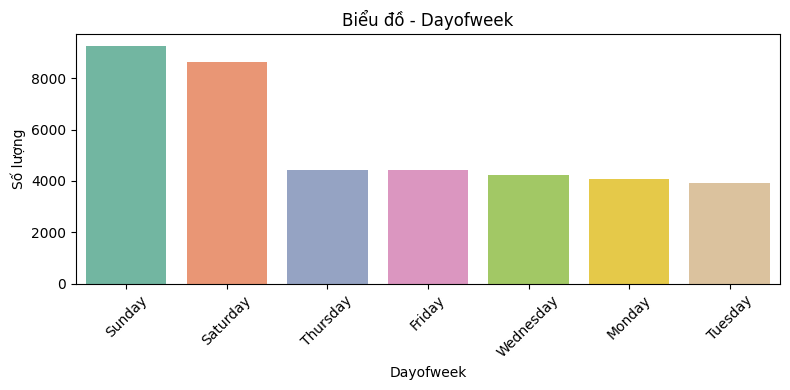

<ipython-input-521-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


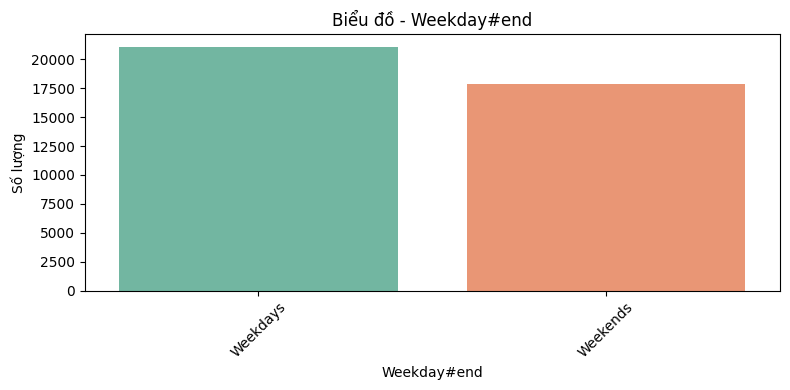

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")
    plt.title(f'Biểu đồ - {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Nhận xét: trong số các ghi nhận:
- Hồ Chí Minh chiếm số lượng cao nhất trong các thành phố
- Cao điểm của các lần ghé thăm chủ yếu vào thứ 7, chủ nhật, nhưng số lần ghé thăm vào các ngày trong tuần vẫn lớn hơn cuối tuần

## KIỂM TRA LOGIC


Ta kiểm tra xem các Dayofweek có tương ứng với Weekday#end không

In [ ]:
def expected_weekend_label(day):
    return 'Weekends' if day in ['Saturday', 'Sunday'] else 'Weekdays'

# Tạo cột so sánh
dayofweek_copy['Expected_Weekday#end'] = dayofweek_copy['Dayofweek'].apply(expected_weekend_label)

# So sánh với cột thật
mismatch = dayofweek_copy[dayofweek_copy['Weekday#end'] != dayofweek_copy['Expected_Weekday#end']]

# In kết quả
print(f"Số dòng không khớp: {len(mismatch)}")

Số dòng không khớp: 0


Như vậy tất cả các dòng đều có Dayofweek và Weekday#end tương ứng

In [ ]:
dayofweek_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38955 entries, 0 to 39094
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    38955 non-null  int64 
 1   City                  38955 non-null  object
 2   Dayofweek             38955 non-null  object
 3   Visit#Dayofweek       38955 non-null  int64 
 4   Year                  38955 non-null  int64 
 5   Weekday#end           38955 non-null  object
 6   Expected_Weekday#end  38955 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


Loại bỏ các cột được tạo mới và đặt lại tên cho các cột

In [ ]:
dayofweek_copy.drop(columns= 'Expected_Weekday#end', inplace = True)
dayofweek_copy.rename(columns = {'Visit#Dayofweek': 'VisitOnDayofweek','Weekday#end':'TypeOfDay'}, inplace = True)

In [ ]:
dayofweek_copy.columns

Index(['ID', 'City', 'Dayofweek', 'VisitOnDayofweek', 'Year', 'TypeOfDay'], dtype='object')

In [ ]:
dayofweek_copy['ID'].min()

89100

In [ ]:
dayofweek_copy['ID'].max()

863754

Như vậy dữ liệu ID cũng có vẻ hợp lệ

In [ ]:
# Chuyển ID thành kiểu chuỗi
dayofweek_copy['ID'] = dayofweek_copy['ID'].astype(str)

Xuất file

In [ ]:
# Lưu vào thư mục Datasets trong MyDrive
dayofweek_copy.to_csv('/content/drive/MyDrive/dayofweek_cleaned.csv', index=False)

# 🟢 **DAYPART**

In [ ]:
daypart_copy = daypart.copy()

In [ ]:
daypart_copy.head()

,ID,City,Daypart,Visit#Daypart,Year
0,729674,Hà Nội,5 PM - before 9 PM,2.0,2019
1,730472,Hà Nội,5 PM - before 9 PM,2.0,2019
2,732361,Hà Nội,5 PM - before 9 PM,2.0,2019
3,732732,Hà Nội,5 PM - before 9 PM,2.0,2019
4,733574,Hà Nội,5 PM - before 9 PM,2.0,2019


In [ ]:
daypart_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19189 entries, 0 to 19188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             19189 non-null  int64  
 1   City           19189 non-null  object 
 2   Daypart        19176 non-null  object 
 3   Visit#Daypart  18342 non-null  float64
 4   Year           19189 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 749.7+ KB


In [ ]:
daypart_copy.shape

(19189, 5)

Dữ liệu có 19189 dòng và 5 cột, trong đó bao gồm: Dữ liệu trống ở các cột Daypart và Visit#Daypart


In [ ]:
daypart_copy.duplicated().sum()

np.int64(0)

Dữ liệu không có dòng nào trùng lặp và tương tự như dayofweek, ID có thể trùng lặp. Ta tiến hành xử lý các giá trị trống

## DATA DESCRIPTION



| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **City** | City where the respondent resides or visited the coffee shop. |
| **Year** | Year of data collection.,
| **Daypart** | Time range during the day when the visit occurred.
| **Visit#Daypart** | Number of visits made during that specific time range.



## XỬ LÝ DỮ LIỆU TRỐNG

In [ ]:
daypart_copy.isna().sum()

,0
ID,0
City,0
Daypart,13
Visit#Daypart,847
Year,0


Do số lượng dữ liệu trống ở Daypart không nhiều nên có thể loại bỏ

In [ ]:
daypart_copy.dropna(subset = 'Daypart', inplace = True)

In [ ]:
daypart_copy[daypart_copy['Visit#Daypart'].isna()]

,ID,City,Daypart,Visit#Daypart,Year
11734,106499,Hải Phòng,9 AM - before 11 AM,NaN,2017
11735,112042,Cần Thơ,2 PM - before 5 PM,NaN,2017
11736,140232,Hà Nội,9 PM or later,NaN,2017
11737,357745,Hà Nội,11 AM - before 2 PM,NaN,2018
11738,358635,Hà Nội,11 AM - before 2 PM,NaN,2018
...,...,...,...,...,...
18328,455814,Hồ Chí Minh,Before 9 AM,NaN,2018
18329,456157,Hồ Chí Minh,Before 9 AM,NaN,2018
18330,456600,Hồ Chí Minh,Before 9 AM,NaN,2018
18331,457495,Hồ Chí Minh,Before 9 AM,NaN,2018


In [ ]:
daypart_copy['Visit#Daypart'].value_counts()

,count
Visit#Daypart,
2.0,3635
4.0,3108
3.0,2222
1.0,1920
5.0,1319
10.0,991
6.0,826
30.0,800
8.0,705


Nguyên nhân khiến dữ liệu ở Visit thiếu có thể do sai sót trong quá trình ghi nhận, người dùng với ID tương ứng có thể đã từng ghé nhưng không được ghi nhận hoặc chưa từng ghé nhưng ID của họ vẫn xuất hiện. Ta sẽ thay thế các giá trị NaN trong visit bằng 1, thể hiện rằng với mỗi ghi nhận, người dùng đã từng ghé 1 lần, giả định rằng sai lầm xuất hiện ở việc người dùng đã từng ghé nhưng chưa được ghi nhận.

In [ ]:
daypart_copy['Visit#Daypart'] = daypart_copy['Visit#Daypart'].fillna(1)

In [ ]:
daypart_copy.isna().sum()

,0
ID,0
City,0
Daypart,0
Visit#Daypart,0
Year,0


## XỬ LÝ DỮ LIỆU SỐ

Dữ liệu số trong dataset này bao gồm năm và số lần ghé thăm theo khung giờ

In [ ]:
daypart_copy['Visit#Daypart'].skew()

np.float64(2.0453128941342573)

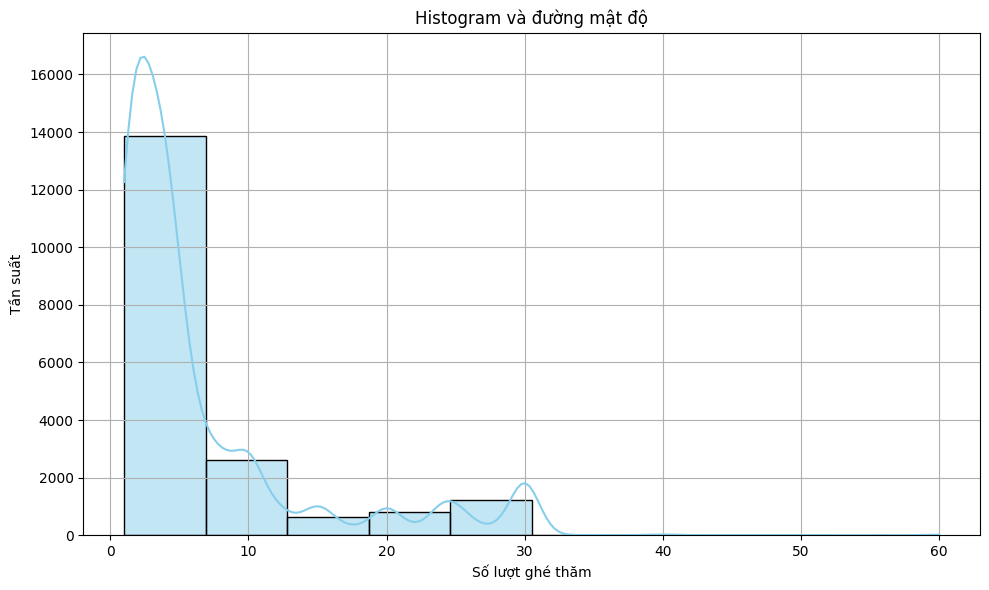

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(daypart_copy['Visit#Daypart'], kde=True, bins=10, color='skyblue')
plt.title('Histogram và đường mật độ')
plt.xlabel('Số lượt ghé thăm')
plt.ylabel('Tần suất')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-543-1260620026>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')


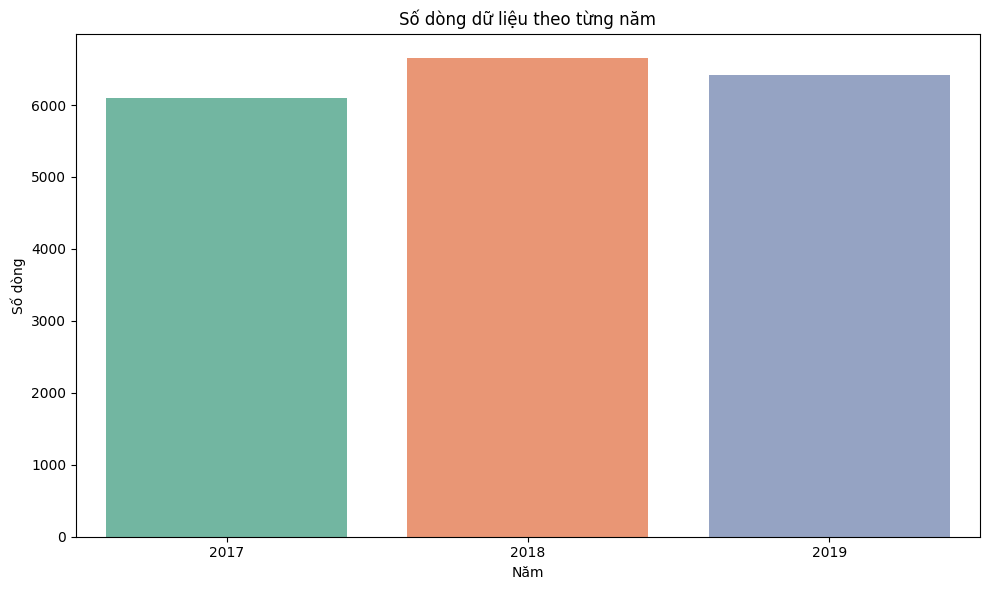

In [ ]:
year_counts = daypart_copy['Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')
plt.title('Số dòng dữ liệu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số dòng')
plt.tight_layout()
plt.show()

Nhận xét:
- Dữ liệu số lượt ghé thăm theo khung giờ không có phân phối chuẩn, và lệch phải, tồn tại nhiều giá trị lớn hơn 10.
- Năm chủ yếu được ghi nhận là 2018, số lượng ghi nhận ở các năm khác cũng không thấp hơn nhiều

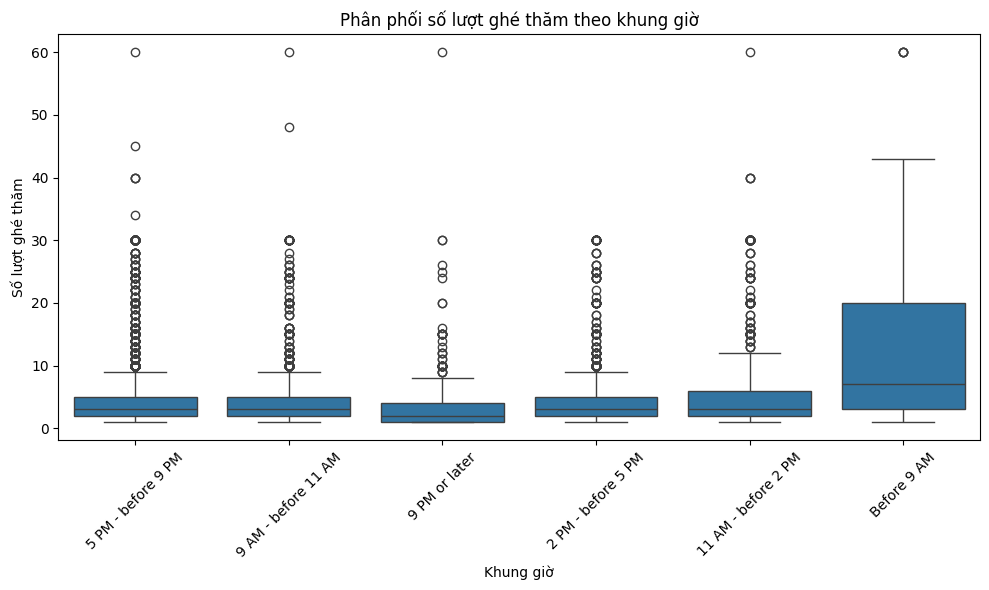

In [ ]:
# Vẽ biểu đồ boxplot để thấy phân phối theo ngày trong tuần
plt.figure(figsize=(10, 6))
sns.boxplot(x='Daypart', y='Visit#Daypart', data=daypart_copy)
plt.title('Phân phối số lượt ghé thăm theo khung giờ')
plt.ylabel('Số lượt ghé thăm')
plt.xlabel('Khung giờ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
daypart_copy.groupby('Daypart')['Visit#Daypart'].mean().reset_index()


,Daypart,Visit#Daypart
0,11 AM - before 2 PM,5.767640
1,2 PM - before 5 PM,4.447600
2,5 PM - before 9 PM,4.748293
3,9 AM - before 11 AM,4.570886
4,9 PM or later,3.329723
5,Before 9 AM,11.359073


Trung bình số lượt ghé thăm rơi vào khoảng từ 3-6 lượt trong các khung giờ, ngoại trừ khung giờ trước 9h sáng.

Tồn tại nhiều giá trị ngoại lai xét số lượng lần ghé thăm ứng với mỗi khung giờ. Những đối tượng có số lần ghé thăm cao này có thể là các khách hàng trung thành.

Kiểm tra xem Visit#Daypart có chứa giá trị không nguyên hoặc âm (không hợp lệ)

In [ ]:
daypart_copy[(daypart_copy['Visit#Daypart'] < 0) | (daypart_copy['Visit#Daypart'] != daypart_copy['Visit#Daypart'].astype(int))]

,ID,City,Daypart,Visit#Daypart,Year


Như vậy dữ liệu ở cột Visit#Daypart đã hợp lệ, chuyển thành kiểu số nguyên

In [ ]:
daypart_copy['Visit#Daypart'] = daypart_copy['Visit#Daypart'].astype(int)

In [ ]:
daypart_copy.dtypes

,0
ID,int64
City,object
Daypart,object
Visit#Daypart,int64
Year,int64


## XỬ LÝ DỮ LIỆU PHÂN LOẠI

In [ ]:
categorical_data = daypart_copy.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 2 categorical features: 

['City', 'Daypart']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         5514
Hồ Chí Minh    5047
Cần Thơ        2602
Đà Nẵng        2492
Hải Phòng      2149
Nha Trang      1372
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Daypart
Daypart
5 PM - before 9 PM     6591
Before 9 AM            5698
9 AM - before 11 AM    2370
2 PM - before 5 PM     2042
11 AM - before 2 PM    1644
9 PM or later           831
Name: count, dtype: int64
--------------------------------------------------


<ipython-input-551-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


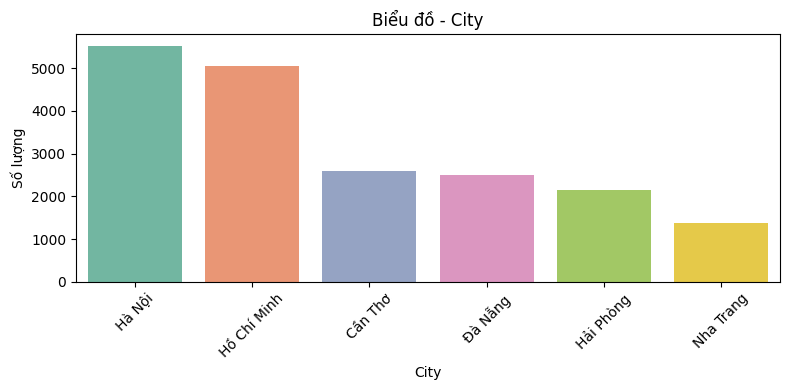

<ipython-input-551-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


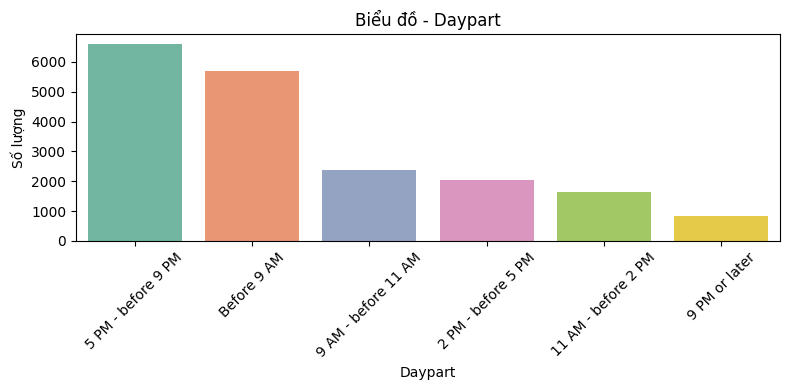

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")
    plt.title(f'Biểu đồ - {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Nhận xét: trong số các ghi nhận:
- Hà Nội chiếm số lượng cao nhất trong các thành phố
- Cao điểm của các lần ghé thăm chủ yếu vào khung giờ từ 5PM đến trước 9PM

Không có dữ liệu nào có vẻ bất thường

Đặt lại tên cột

In [ ]:
daypart_copy.rename(columns = {'Visit#Daypart': 'VisitOnDaypart'}, inplace = True)

Kiểm tra lại

In [ ]:
daypart_copy.columns

Index(['ID', 'City', 'Daypart', 'VisitOnDaypart', 'Year'], dtype='object')

In [ ]:
print(daypart_copy['ID'].max())
print(daypart_copy['ID'].min())

863754
89100


In [ ]:
daypart_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19176 entries, 0 to 19188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              19176 non-null  int64 
 1   City            19176 non-null  object
 2   Daypart         19176 non-null  object
 3   VisitOnDaypart  19176 non-null  int64 
 4   Year            19176 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 898.9+ KB


In [ ]:
# Chuyển ID thành kiểu chuỗi
daypart_copy['ID'] = daypart_copy['ID'].astype(str)

Dữ liệu ID cũng đã hợp lệ. Xuất file

In [ ]:
daypart_copy.to_csv('/content/drive/MyDrive/daypart_cleaned.csv', index=False)

# 🟢 **NEEDSTATE**

In [ ]:
needstate = needstate_by_day_daypart.copy()

In [ ]:
needstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75251 entries, 0 to 75250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              75251 non-null  int64 
 1   City            75251 non-null  object
 2   Year            75251 non-null  int64 
 3   Needstates      75251 non-null  object
 4   Day#Daypart     75251 non-null  object
 5   NeedstateGroup  75251 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
needstate.head()

,ID,City,Year,Needstates,Day#Daypart,NeedstateGroup
0,725118,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
1,725466,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
2,726561,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
3,726862,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
4,727015,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages


Tập dữ liệu có 75251 dòng và 6 cột, trong đó không có dữ liệu trống xuất hiện

In [ ]:
needstate.duplicated().sum()

np.int64(72)

Như vậy có xuất hiện một số dữ liệu trùng lặp, cần phải loại bỏ

In [ ]:
needstate.drop_duplicates(keep = 'first', inplace = True)

Nếu Id xuất hiện lại cũng không phải là điều bất thường, nên không cần xem xét yếu tố đó

## DATA DESCRIPTION



| Column  | Description |
|:----|:-----|
| **ID** | Unique identifier for each customer. |
| **City** | City where the respondent resides or visited the coffee shop. |
| **Year** | Year of data collection.
| **Needstates** | Specific reason or motivation for visiting the coffee shop.
| **Day#Daypart** | Time context for the need state.
| **NeedstateGroup** | Broader category grouping similar need states.


## XỬ LÝ DỮ LIỆU SỐ

Trong dataset chỉ có năm là dữ liệu số thực sự, ta tiến hành xem xét

In [ ]:
needstate['Year'].value_counts(dropna = False)

,count
Year,
2019,50198
2018,14004
2017,10977


<ipython-input-230-2918664980>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')


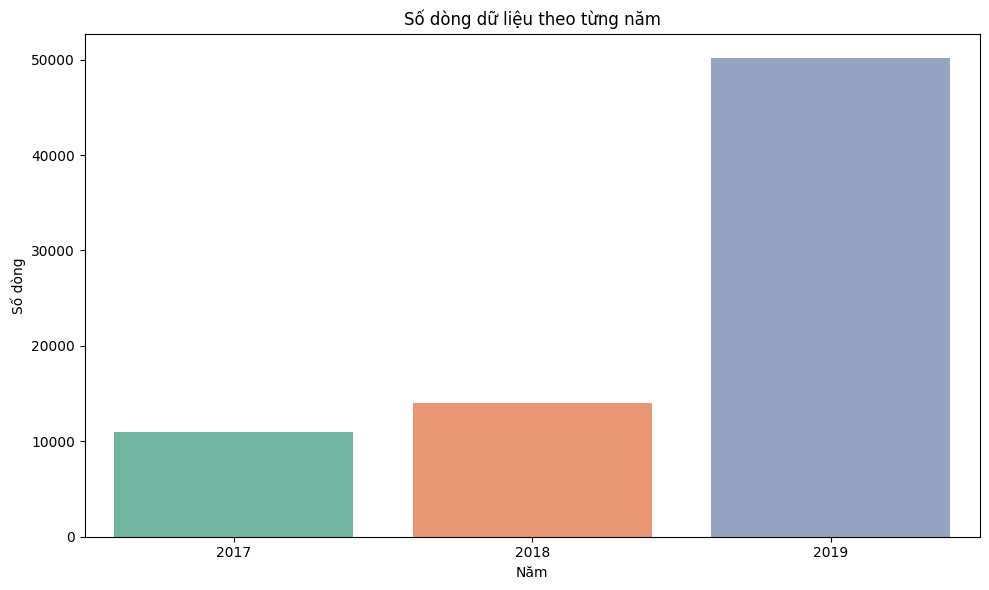

In [ ]:
year_counts = needstate['Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')
plt.title('Số dòng dữ liệu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số dòng')
plt.tight_layout()
plt.show()

Khác với daypart và dayofweek, năm xuất hiện chủ yếu trong tập dữ liệu là 2019, áp đảo tần số xuất hiện của các năm khác

## XỬ LÝ DỮ LIỆU PHÂN LOẠI

In [ ]:
categorical_data = needstate.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['City', 'Needstates', 'Day#Daypart', 'NeedstateGroup']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: City
City
Hà Nội         24231
Hồ Chí Minh    18448
Cần Thơ        10461
Đà Nẵng         8740
Hải Phòng       8129
Nha Trang       5170
Name: count, dtype: int64
--------------------------------------------------
🔹 Column: Needstates
Needstates
Drinking coffee                                                    17324
Socializing with friends                                           14955
Socializing with family / relatives                                 7051
Enterntainment (watching movies. Playing games, browsing web,…)     6740
Drinking tea                                                        5185
Drinking other beverages (excluding tea, coffee, freeze)            5167
Socializing with colleagues                                         4318
Drinking ice-blended                                                3453
Socialzing                                                          3130
Relaxing (Alone)                                                    2791
Working / Busin

<ipython-input-233-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


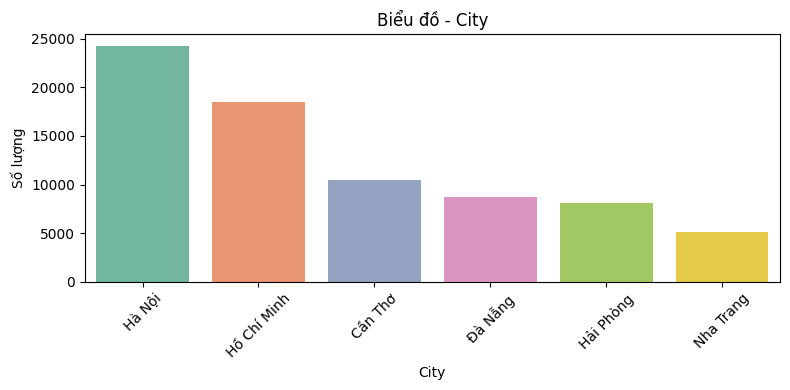

<ipython-input-233-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")
<ipython-input-233-3166862732>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


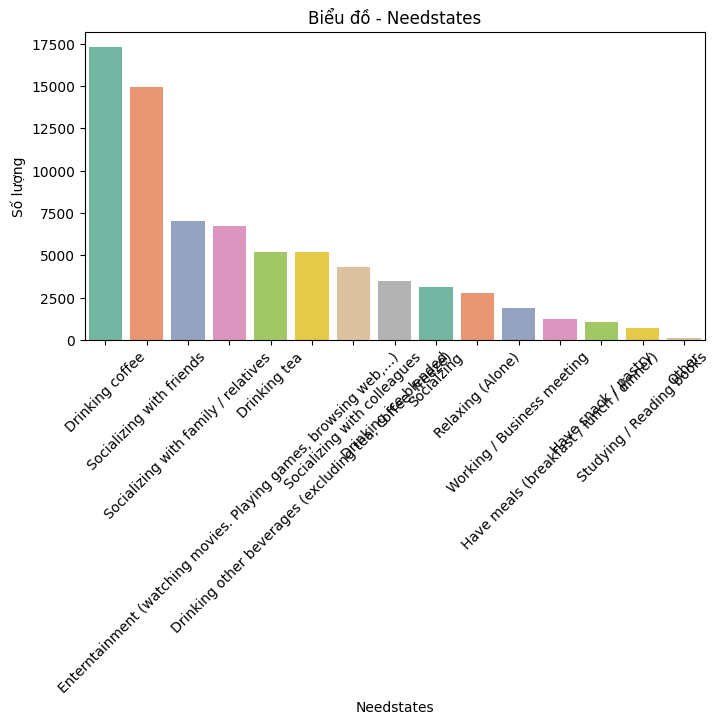

<ipython-input-233-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


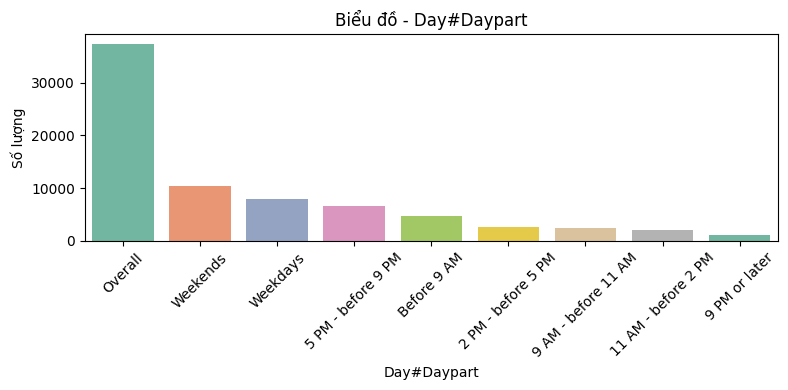

<ipython-input-233-3166862732>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")


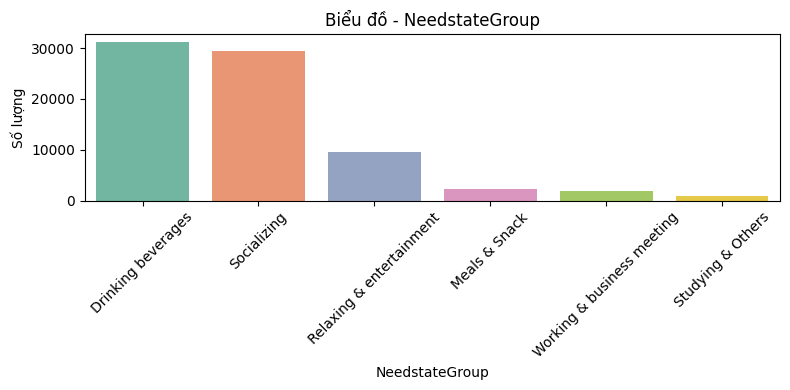

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=categorical_data, x=col, order=categorical_data[col].value_counts().index, palette="Set2")
    plt.title(f'Biểu đồ - {col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Nhận xét: trong số các ghi nhận:
- Hà Nội chiếm số lượng cao nhất trong các thành phố
- Mục đích chủ yếu của người dùng đến quán là để uống cafe (hoặc thưởng thức đồ uống nói chung)
- Một số giá trị sai chính tả cần được chỉnh sửa

In [ ]:
needstate['Needstates'].replace({
    'Socialzing': 'Socializing',
    'Enterntainment (watching movies. Playing games, browsing web,…)': 'Entertainment'
}, inplace = True)

<ipython-input-234-875335598>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  needstate['Needstates'].replace({


In [ ]:
needstate['Needstates'].value_counts()

,count
Needstates,
Drinking coffee,17324
Socializing with friends,14955
Socializing with family / relatives,7051
Entertainment,6740
Drinking tea,5185
"Drinking other beverages (excluding tea, coffee, freeze)",5167
Socializing with colleagues,4318
Drinking ice-blended,3453
Socializing,3130


In [ ]:
for col in ['Needstates', 'NeedstateGroup']:
    print(f"🔹 Column: {col}")
    print(needstate[col].value_counts(dropna=False))
    print("-" * 50)

🔹 Column: Needstates
Needstates
Drinking coffee                                             17324
Socializing with friends                                    14955
Socializing with family / relatives                          7051
Entertainment                                                6740
Drinking tea                                                 5185
Drinking other beverages (excluding tea, coffee, freeze)     5167
Socializing with colleagues                                  4318
Drinking ice-blended                                         3453
Socializing                                                  3130
Relaxing (Alone)                                             2791
Working / Business meeting                                   1876
Have meals (breakfast / lunch / dinner)                      1264
Have snack / pastry                                          1088
Studying / Reading books                                      698
Other                                       

Kiểm tra logic: kiểm tra xem needstate có nằm trong nhóm tương ứng không

In [ ]:
needstate_to_group = {
    "Drinking coffee": "Drinking beverages",
    "Drinking tea": "Drinking beverages",
    "Drinking ice-blended": "Drinking beverages",
    "Drinking other beverages (excluding tea, coffee, freeze)": "Drinking beverages",
    "Socializing with friends": "Socializing",
    "Socializing with family / relatives": "Socializing",
    "Socializing with colleagues": "Socializing",
    "Socializing": "Socializing",
    "Relaxing (Alone)": "Relaxing & entertainment",
    "Entertainment": "Relaxing & entertainment",
    "Working / Business meeting": "Working & business meeting",
    "Have meals (breakfast / lunch / dinner)": "Meals & Snack",
    "Have snack / pastry": "Meals & Snack",
    "Studying / Reading books": "Studying & Others",
    "Other": "Studying & Others"
}

# Áp dụng kiểm tra
needstate['MappedGroup'] = needstate['Needstates'].map(needstate_to_group)
mismatch = needstate[needstate['MappedGroup'] != needstate['NeedstateGroup']]

# Hiển thị các dòng không khớp (nếu có)
mismatch

,ID,City,Year,Needstates,Day#Daypart,NeedstateGroup,MappedGroup


Như vậy mọi needstate đều đã nằm trong nhóm tương ứng của nó. Sau đó loại bỏ cột tạo ra tạm thời

In [ ]:
needstate.drop(columns = 'MappedGroup', inplace = True)

Đặt lại tên cột

In [ ]:
needstate.rename(columns = {'Day#Daypart': 'DayOrDaypart'}, inplace = True)

Kiểm tra lại

In [ ]:
needstate.columns

Index(['ID', 'City', 'Year', 'Needstates', 'DayOrDaypart', 'NeedstateGroup'], dtype='object')

In [ ]:
print(needstate['ID'].max())
print(needstate['ID'].min())

863754
89100


Như vậy ID cũng không có gì bất thường. Xuất file

In [ ]:
# Chuyển ID thành kiểu chuỗi
needstate['ID'] = needstate['ID'].astype(str)

In [ ]:
needstate.duplicated().sum()

np.int64(0)

In [ ]:
needstate.to_csv('/content/drive/MyDrive/needstate_cleaned.csv', index=False)

# 🟢 **COMPETITOR**

In [ ]:
competitor = competitor_db.copy()

In [ ]:
competitor.head()

,No#,Brand,City,Year,StoreCount
0,6,Cộng Cà Phê,Hải Phòng,2017,1
1,9,Cộng Cà Phê,Lào Cai,2017,1
2,10,Cộng Cà Phê,Nha Trang,2017,1
3,11,Cộng Cà Phê,Quảng Nam,2017,1
4,12,Cộng Cà Phê,Quảng Ninh,2017,1


In [ ]:
competitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No#         234 non-null    int64 
 1   Brand       234 non-null    object
 2   City        234 non-null    object
 3   Year        234 non-null    int64 
 4   StoreCount  234 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 9.3+ KB


Tập dữ liệu có 234 dòng và 5 cột, trong đó không có dữ liệu trống

In [ ]:
competitor.duplicated().sum()

np.int64(0)

Như vậy các dòng dữ liệu cũng không có trùng lặp

## DATA DESCRIPTION



| Column  | Description |
|:----|:-----|
| **City** | City where the respondent resides or visited the coffee shop. |
| **Year** | Year of data collection.
| **No#** | Row number or entry index.
| **Brand** | Name of the coffee brand.
| **StoreCount** | Number of stores the brand operated in that city during the given year.



## XỬ LÝ DỮ LIỆU SỐ

In [ ]:
numerical_data = competitor[['No#','Year','StoreCount']]
numerical_data.describe()

,No#,Year,StoreCount
count,234.000000,234.000000,234.000000
mean,117.500000,2018.000000,7.435897
std,67.694165,0.818247,17.220800
min,1.000000,2017.000000,0.000000
25%,59.250000,2017.000000,1.000000
50%,117.500000,2018.000000,1.000000
75%,175.750000,2019.000000,4.000000
max,234.000000,2019.000000,113.000000


Các dữ liệu số không có vấn đề nghiêm trọng, có một số dòng cho StoreCount = 0 cần xem xét

In [ ]:
competitor[competitor['StoreCount'] == 0]

,No#,Brand,City,Year,StoreCount
74,1,Cộng Cà Phê,Bắc Ninh,2017,0
75,2,Cộng Cà Phê,Cần Thơ,2017,0
77,4,Cộng Cà Phê,Gyeonggi,2017,0
80,8,Cộng Cà Phê,Lạng Sơn,2017,0
81,14,Cộng Cà Phê,Thái Nguyên,2017,0
82,15,Cộng Cà Phê,Thanh Hóa,2017,0
83,16,Cộng Cà Phê,Thừa Thiên Huế,2017,0
85,18,Highlands Coffee,Bình Định,2017,0
93,27,Highlands Coffee,Long An,2017,0
96,31,Highlands Coffee,Phú Thọ,2017,0


Dữ liệu 0 chứng tỏ vào năm thực hiện khảo sát, cửa hàng của thương hiệu đó tại thành phố đó chưa được mở, không phải bất thường trong dữ liệu

In [ ]:
np.sort(competitor['No#'].unique())


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Cột No# không thực sự có ý nghĩa trong tập dữ liệu, do index dòng có thể được truy cập tự động

In [ ]:
competitor = competitor.drop(columns = 'No#')

In [ ]:
competitor['StoreCount'].unique()

array([  1,   0,   2,  26,   8,   7,   4,  15,   9,  57,  85,   3,   5,
        25,  21,  11,  55,   6,  33,  32,  12,  19,  10,  75,  13, 104,
        36,  28,  24,  79,  42,  14,  20,  84, 113,  39,  18,  43])

Ta tiến hành kiểm tra các dòng dữ liệu có StoreCount cao hơn mức trung bình đáng kể (>75)

In [ ]:
competitor[competitor['StoreCount'] > 75]

,Brand,City,Year,StoreCount
92,Highlands Coffee,Hồ Chí Minh,2017,85
149,Highlands Coffee,Hồ Chí Minh,2018,104
174,The Coffee House,Hồ Chí Minh,2018,79
196,Highlands Coffee,Hà Nội,2019,84
198,Highlands Coffee,Hồ Chí Minh,2019,113
224,The Coffee House,Hồ Chí Minh,2019,84


Xuất hiện một số thương hiệu có số cửa hàng rất cao cần phải chú ý xác minh liệu có phải do số lượng cửa hàng nhiều hay do lỗi nhập liệu

<ipython-input-14-1560435527>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')


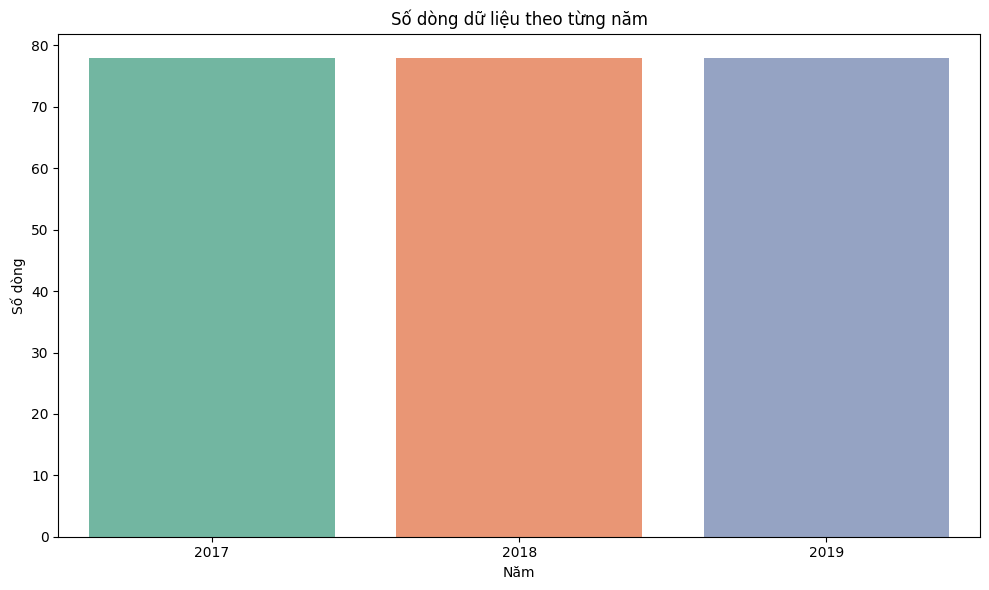

In [ ]:
year_counts = competitor['Year'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year', 'Count']

# Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=year_counts, x='Year', y='Count', palette='Set2')
plt.title('Số dòng dữ liệu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số dòng')
plt.tight_layout()
plt.show()

Số dữ liệu ở các năm gần như bằng nhau, có thể do tất cả đối tượng được lấy thông tin tiếp tục ở năm sau

## XỬ LÝ DỮ LIỆU PHÂN LOẠI

In [ ]:
## XỬ LÝ DỮ LIỆU PHÂN LOẠI

categorical_data = competitor.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)



There are 2 categorical features: 

['Brand', 'City']


In [ ]:
categorical_cols = [col for col in categorical_data.select_dtypes(include=['object']).columns if categorical_data[col].nunique() <= 20]
for col in categorical_cols:
    print(f"🔹 Column: {col}")
    print(categorical_data[col].value_counts(dropna=False))
    print("-" * 50)



🔹 Column: Brand
Brand
Highlands Coffee    66
Cộng Cà Phê         48
The Coffee House    48
Trung Nguyên        30
Phúc Long           24
Starbucks           18
Name: count, dtype: int64
--------------------------------------------------


Do City có nhiều giá trị nên không được xem là dữ liệu phân loại

In [ ]:
competitor['City'].value_counts(dropna = False)

,count
City,
Hải Phòng,18
Nha Trang,18
Đà Nẵng,18
Hồ Chí Minh,18
Hà Nội,18
Cần Thơ,18
Bình Dương,12
Bắc Ninh,9
Thừa Thiên Huế,9


Như vậy dữ liệu không có vẻ gì bất thường. Xuất file

In [ ]:
competitor.to_csv('/content/drive/MyDrive/competitor_cleaned.csv', index=False)

# 🟢 CROSS-TABLE PROCESSING

## DATA INPUT

In [ ]:
sa = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'SA_cleaned.csv')

In [ ]:
customer = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'CustomerSegmentation_cleaned.csv')

In [ ]:
brand_image = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'BrandImage_cleaned.csv')

In [ ]:
brand_health = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'BrandHealth_cleaned.csv', na_values=['NaN', ''], keep_default_na=False)

In [ ]:
brand_seg = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'BrandSegmentation_cleaned.csv', na_values=['NaN', ''], keep_default_na=False)

In [ ]:
companion = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'Companion_cleaned.csv')

In [ ]:
competitor = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'Competitor_cleaned.csv')

In [ ]:
day_of_week = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'Dayofweek_cleaned.csv')

In [ ]:
day_part = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'Daypart_cleaned.csv')

In [ ]:
need_state = pd.read_csv('/content/drive/My Drive/BI9_Resources/BI9_Half Clean Datasets/' + 'Needstate_cleaned.csv')

In [ ]:
sa.duplicated().any() | customer.duplicated().any() | brand_image.duplicated().any() | brand_health.duplicated().any() | brand_seg.duplicated().any() | companion.duplicated().any() | competitor.duplicated().any() | day_of_week.duplicated().any() | day_part.duplicated().any() | need_state.duplicated().any()

np.False_

## Needstate & SA

Kiểm tra số lượng ID (Customer) trong SA và Needstate liệu có trùng khớp

In [ ]:
print(need_state['ID'].nunique())
print(sa['ID'].nunique())

11740
11737


Như vậy một số Customer được ghi nhận trong Needstate không được ghi nhận trong SA. Điều này có thể do lỗi nhập liệu, do quá trình xử lý trước đó đã xóa đi một số dòng không có giá trị sử dụng trong tập SA, mà ID ứng với những dòng đó lại có giá trị sử dụng trong tập Needstate

Trước tiên kiểm tra các dòng tồn tại trong Needstate nhưng không có trong SA

In [ ]:
missing_rows = need_state[~need_state['ID'].isin(sa['ID'])]
missing_rows

,ID,City,Year,Needstates,DayOrDaypart,NeedstateGroup
613,816230,Hà Nội,2019,Drinking coffee,Overall,Drinking beverages
3955,826397,Hồ Chí Minh,2019,Drinking coffee,Overall,Drinking beverages
4112,835884,Hồ Chí Minh,2019,Drinking coffee,Overall,Drinking beverages
5588,853555,Đà Nẵng,2019,Drinking coffee,Overall,Drinking beverages
5683,783358,Hải Phòng,2019,Drinking coffee,Overall,Drinking beverages
...,...,...,...,...,...,...
73119,826397,Hồ Chí Minh,2019,Drinking coffee,Weekends,Drinking beverages
73260,835884,Hồ Chí Minh,2019,Drinking coffee,Weekends,Drinking beverages
73705,853555,Đà Nẵng,2019,Drinking coffee,Weekends,Drinking beverages
73783,783358,Hải Phòng,2019,Drinking coffee,Weekends,Drinking beverages


In [ ]:
need_state.shape

(75179, 6)

Do số lượng giá trị không khớp nhỏ so với tổng thể bộ dữ liệu nên có thể loại bỏ an toàn

In [ ]:
need_state = need_state.drop(index = missing_rows.index)

Tương tự, ta kiểm tra chiều ngược lại, liệu có tồn tại giá trị nào có trong SA mà không ó trong Needstate

In [ ]:
missing_rows = sa[~sa['ID'].isin(need_state['ID'])]
missing_rows

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange
6734,135892,Đà Nẵng,2,39,Unknown,Street Coffee,Street Coffee,Unknown,Street Coffee,Female,35 - 39 y.o.,Housewife,None Working,2017,Unknown
7304,108726,Cần Thơ,1,37,Unknown,Independent Cafe,Independent Cafe,Unknown,Independent Cafe,Male,35 - 39 y.o.,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2017,Unknown
7376,138350,Đà Nẵng,1,26,Unknown,Independent Cafe,Independent Cafe,Unknown,Independent Cafe,Male,25 - 29 y.o.,"Skilled Labor (tailor, machinist, carpenter, e...",Blue Collar,2017,Unknown
9444,121537,Hải Phòng,3,30,Unknown,Street Coffee,Street Coffee,Street Coffee,Street Coffee,Female,30 - 34 y.o.,Housewife,None Working,2017,Unknown
10047,111683,Đà Nẵng,2,45,Unknown,Street Coffee,Independent Cafe,Independent Cafe,Independent Cafe,Male,45+ y.o.,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2017,Unknown
10161,109237,Cần Thơ,1,29,Unknown,Street Coffee,Street Coffee,Independent Cafe,Independent Cafe,Female,25 - 29 y.o.,Officer - Staff level,White Collar,2017,Unknown


Chỉ có rất it dòng như thế nên có thể xóa

In [ ]:
sa = sa.drop(index = missing_rows.index)

SA và Needstate cùng có 2 thuộc tính Year và City, kiểm tra liệu 2 thuộc tính này có trùng khớp giá trị

In [ ]:
merged = need_state.merge(sa, on='ID', suffixes=('_n', '_sa'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_n'] != merged['City_sa']) |
    (merged['Year_n'] != merged['Year_sa'])
]

diff_rows

,ID,City_n,Year_n,Needstates,DayOrDaypart,NeedstateGroup,City_sa,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year_sa,MPIRange


Như vậy không có dòng nào mâu thuẫn về City và Year. Ta kiểm tra lại số ID trong 2 tập dữ liệu

In [ ]:
print(need_state['ID'].nunique())
print(sa['ID'].nunique())

11731
11731


Vậy số lượng ID trong 2 tập dữ liệu đã đồng nhất

## SA & CustomerSegmentation

In [ ]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11731 entries, 0 to 11736
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               11731 non-null  int64 
 1   City             11731 non-null  object
 2   GroupSize        11731 non-null  int64 
 3   Age              11731 non-null  int64 
 4   MPIMean          11731 non-null  object
 5   TOM              11731 non-null  object
 6   BUMO             11731 non-null  object
 7   BUMOPrevious     11731 non-null  object
 8   MostFavourite    11731 non-null  object
 9   Gender           11731 non-null  object
 10  AgeGroup         11731 non-null  object
 11  Occupation       11731 non-null  object
 12  OccupationGroup  11731 non-null  object
 13  Year             11731 non-null  int64 
 14  MPIRange         11731 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.4+ MB


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4944 non-null   int64  
 1   Segmentation  4944 non-null   object 
 2   Visit         4944 non-null   int64  
 3   Spending      4944 non-null   int64  
 4   Brand         4944 non-null   object 
 5   PPA           4944 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 231.9+ KB


Kiểm tra những Customer có năm khảo sát là 2017

In [ ]:
sa_2017 = sa[sa['Year'] == 2017]
sa_2017

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange
5646,91439,Hồ Chí Minh,4,20,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,20 - 24 y.o.,Pupil / Student,None Working,2017,Unknown
5647,92022,Hồ Chí Minh,3,48,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Male,45+ y.o.,Freelance,Self Employed - Small Business and Freelance,2017,Unknown
5648,92078,Hồ Chí Minh,5,24,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,20 - 24 y.o.,Officer - Staff level,White Collar,2017,Unknown
5649,94027,Hồ Chí Minh,4,31,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,30 - 34 y.o.,Officer - Staff level,White Collar,2017,Unknown
5650,94132,Hồ Chí Minh,4,24,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Male,20 - 24 y.o.,Freelance,Self Employed - Small Business and Freelance,2017,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,138527,Hà Nội,4,57,Unknown,Highlands Coffee,Highlands Coffee,Independent Cafe,Highlands Coffee,Female,45+ y.o.,Housewife,None Working,2017,Unknown
11156,138703,Hà Nội,4,27,Unknown,Highlands Coffee,Highlands Coffee,Cộng Cà Phê,Highlands Coffee,Male,25 - 29 y.o.,Officer - Staff level,White Collar,2017,Unknown
11157,138751,Hà Nội,4,28,Unknown,Highlands Coffee,Highlands Coffee,Independent Cafe,Highlands Coffee,Female,25 - 29 y.o.,Housewife,None Working,2017,Unknown
11158,138867,Hà Nội,4,25,Unknown,Highlands Coffee,Highlands Coffee,Urban Station,Highlands Coffee,Male,25 - 29 y.o.,Officer - Staff level,White Collar,2017,Unknown


In [ ]:
customer['ID'].nunique()

3676

Nhận xét: tồn tại một số Customer có thông tin trong SA với năm 2017 không được ghi nhận trong CustomerSegmentation. Điều này có thể do:
- Trong quá trình ghi nhận thông tin, lỗi nhập liệu hoặc lỗi ở quá trình lọc dữ liệu xảy ra khiến thông tin của các user này không được đưa vào bảng 2017, nếu 2017 được trích xuất từ SA
- Có thể bị nhân bản dòng, cập nhật thông tin trực tiếp vào bảng SA, hoặc lỗi nhập liệu liên quan đến năm khiến số lượng dòng có Year = 2017 trong bảng SA nhiều hơn trong bảng Customer, nếu Customer được thu thập trước sau đó mới đưa vào SA.

In [ ]:
missing_rows = sa_2017[~sa_2017['ID'].isin(customer['ID'])]
missing_rows

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange
5786,138841,Hà Nội,2,29,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Male,25 - 29 y.o.,Officer - Staff level,White Collar,2017,Unknown
5809,140223,Hà Nội,2,27,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,25 - 29 y.o.,Officer - Staff level,White Collar,2017,Unknown
5884,140225,Hà Nội,3,22,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,20 - 24 y.o.,Housewife,None Working,2017,Unknown
5885,140253,Hà Nội,3,49,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Highlands Coffee,Female,45+ y.o.,"Small Business (small shop owner, grocery stor...",Self Employed - Small Business and Freelance,2017,Unknown
5938,141270,Hà Nội,3,34,Unknown,Highlands Coffee,Highlands Coffee,Unknown,Cộng Cà Phê,Female,30 - 34 y.o.,Officer - Senior Management,White Collar,2017,Unknown
6211,141272,Hà Nội,2,28,Unknown,Cộng Cà Phê,Cộng Cà Phê,Unknown,Cộng Cà Phê,Male,25 - 29 y.o.,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2017,Unknown
6476,138658,Hồ Chí Minh,3,58,Unknown,Street Coffee,Street Coffee,Unknown,Trung Nguyên,Male,45+ y.o.,"Small Business (small shop owner, grocery stor...",Self Employed - Small Business and Freelance,2017,Unknown
7256,138694,Hà Nội,2,33,Unknown,Trung Nguyên,Independent Cafe,Unknown,Independent Cafe,Male,30 - 34 y.o.,Officer - Staff level,White Collar,2017,Unknown
7261,140345,Hà Nội,2,36,Unknown,Trung Nguyên,Independent Cafe,Unknown,Independent Cafe,Female,35 - 39 y.o.,Officer - Staff level,White Collar,2017,Unknown


In [ ]:
customer.columns

Index(['ID', 'Segmentation', 'Visit', 'Spending', 'Brand', 'PPA'], dtype='object')

Có 2 lựa chọn đối với trường hợp này:
- Drop các dòng có trong SA nhưng không có trong Customer để đồng bộ
- Thêm các dòng có trong SA nhưng không có trong Customer vào Customer để đồng bộ

Do số lượng dòng thiếu không đáng kể so với kích thước của tập dữ liệu và quá trình thêm (lựa chọn 2) cần phải truy xuất các thông tin Visit, Spending, PPA, ... nên lựa chọn phương án 1

In [ ]:
sa_2017 = sa_2017.drop(index = missing_rows.index)

In [ ]:
sa = sa.drop(index = missing_rows.index)

Kiểm tra lại

In [ ]:
sa_2017[~sa_2017['ID'].isin(customer['ID'])]

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange


In [ ]:
print(sa_2017['ID'].nunique())
print(customer['ID'].nunique())

3670
3676


Như vậy tồn tại một số dòng trong customer không có trong SA. Kiểm tra các dòng đó

In [ ]:
missing_rows = customer[~customer['ID'].isin(sa_2017['ID'])]
missing_rows

,ID,Segmentation,Visit,Spending,Brand,PPA
3307,109237,Seg.01 - Mass (<VND 25K),16,192,Street,12.0
3565,111683,Seg.01 - Mass (<VND 25K),3,24,Street,8.0
4151,108726,Seg.01 - Mass (<VND 25K),8,120,Independent,15.0
4245,121537,Seg.01 - Mass (<VND 25K),3,45,Street,15.0
4358,135892,Seg.01 - Mass (<VND 25K),5,75,Independent,15.0
4388,138350,Seg.01 - Mass (<VND 25K),28,420,Independent,15.0
4530,111683,Seg.01 - Mass (<VND 25K),7,70,Independent,10.0
4914,135892,Seg.01 - Mass (<VND 25K),30,300,Street,10.0


In [ ]:
customer = customer.drop(index = missing_rows.index)

In [ ]:
print(sa_2017['ID'].nunique())
print(customer['ID'].nunique())

3670
3670


Kiểm tra lại toàn bộ

In [ ]:
sa_2017[~sa_2017['ID'].isin(customer['ID'])]

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange


In [ ]:
customer[~customer['ID'].isin(sa_2017['ID'])]

,ID,Segmentation,Visit,Spending,Brand,PPA


Do SA có thay đổi nên ta cần đối chiếu lại với Needstate

In [ ]:
print(need_state['ID'].nunique())
print(sa['ID'].nunique())

11731
11722


In [ ]:
missing_rows = need_state[~need_state['ID'].isin(sa['ID'])]
missing_rows

,ID,City,Year,Needstates,DayOrDaypart,NeedstateGroup
1960,138841,Hà Nội,2017,Drinking coffee,Overall,Drinking beverages
2083,140253,Hà Nội,2017,Drinking coffee,Overall,Drinking beverages
10380,138841,Hà Nội,2017,"Drinking other beverages (excluding tea, coffe...",Overall,Drinking beverages
10444,140223,Hà Nội,2017,"Drinking other beverages (excluding tea, coffe...",Overall,Drinking beverages
11658,138841,Hà Nội,2017,Drinking tea,Overall,Drinking beverages
11719,140253,Hà Nội,2017,Drinking tea,Overall,Drinking beverages
15229,140225,Hà Nội,2017,Drinking ice-blended,Overall,Drinking beverages
15234,140253,Hà Nội,2017,Drinking ice-blended,Overall,Drinking beverages
22529,138658,Hồ Chí Minh,2017,Socializing,Overall,Socializing
23215,138694,Hà Nội,2017,Socializing,Overall,Socializing


In [ ]:
need_state = need_state.drop(index = missing_rows.index)

In [ ]:
print(need_state['ID'].nunique())
print(sa['ID'].nunique())

11722
11722


Kiểm tra lại

In [ ]:
need_state[~need_state['ID'].isin(sa['ID'])]

,ID,City,Year,Needstates,DayOrDaypart,NeedstateGroup


In [ ]:
sa[~sa['ID'].isin(need_state['ID'])]

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange


## SA & Companion

Các thao tác được tiến hành tương tự ở trên

In [ ]:
print(companion['ID'].nunique())
print(sa['ID'].nunique())

11746
11722


Trong Companion tồn tại một số dòng mà trong SA không có, các lý do có thể được phân tích như trên, đặc biệt là khi tiền xử lý dữ liệu đã loại bỏ một số dòng không dùng được trong SA

In [ ]:
missing_rows = companion[~companion['ID'].isin(sa['ID'])]
missing_rows

,ID,City,CompanionGroup,Year
702,816230,Hà Nội,Friends,2019
807,822950,Hà Nội,Friends,2019
2389,138694,Hà Nội,Friends,2017
2426,138841,Hà Nội,Friends,2017
2541,140223,Hà Nội,Friends,2017
2543,140225,Hà Nội,Friends,2017
2557,140253,Hà Nội,Friends,2017
2672,141272,Hà Nội,Friends,2017
3224,835884,Hồ Chí Minh,Friends,2019
4129,138658,Hồ Chí Minh,Friends,2017


In [ ]:
companion.shape

(19940, 4)

Bởi vì số lượng dòng không khớp không đáng kể nên cũng có thể drop

In [ ]:
companion = companion.drop(index = missing_rows.index)

Kiểm tra lại

In [ ]:
print(companion['ID'].nunique())
print(sa['ID'].nunique())

11722
11722


In [ ]:
merged = companion.merge(sa, on='ID', suffixes=('_comp', '_sa'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_comp'] != merged['City_sa']) |
    (merged['Year_comp'] != merged['Year_sa'])
]

diff_rows

,ID,City_comp,CompanionGroup,Year_comp,City_sa,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year_sa,MPIRange


Kiểm tra lại

In [ ]:
companion[~companion['ID'].isin(sa['ID'])]

,ID,City,CompanionGroup,Year


In [ ]:
sa[~sa['ID'].isin(companion['ID'])]

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange


## Dayofweek & SA

In [ ]:
print(day_of_week['ID'].nunique())
print(sa['ID'].nunique())

11761
11722


Thao tác thực hiện tương tự như trên

In [ ]:
missing_rows = day_of_week[~day_of_week['ID'].isin(sa['ID'])]
missing_rows

,ID,City,Dayofweek,VisitOnDayofweek,Year,TypeOfDay
1377,109237,Cần Thơ,Wednesday,4,2017,Weekdays
1552,109237,Cần Thơ,Tuesday,4,2017,Weekdays
1730,109237,Cần Thơ,Friday,4,2017,Weekdays
1911,109237,Cần Thơ,Thursday,4,2017,Weekdays
3409,747766,Hồ Chí Minh,Friday,4,2019,Weekdays
...,...,...,...,...,...,...
37258,836039,Hồ Chí Minh,Thursday,8,2019,Weekdays
37259,836039,Hồ Chí Minh,Friday,8,2019,Weekdays
38310,836039,Hồ Chí Minh,Saturday,10,2019,Weekends
38423,836039,Hồ Chí Minh,Sunday,10,2019,Weekends


In [ ]:
day_of_week.shape

(38955, 6)

In [ ]:
day_of_week = day_of_week.drop(index = missing_rows.index)

In [ ]:
merged = day_of_week.merge(sa, on='ID', suffixes=('_d', '_sa'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_d'] != merged['City_sa']) |
    (merged['Year_d'] != merged['Year_sa'])
]

diff_rows

,ID,City_d,Dayofweek,VisitOnDayofweek,Year_d,TypeOfDay,City_sa,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year_sa,MPIRange


In [ ]:
print(day_of_week['ID'].nunique())
print(sa['ID'].nunique())

11722
11722


## Daypart & SA

In [ ]:
print(day_part['ID'].nunique())
print(sa['ID'].nunique())

11761
11722


Thao tác thực hiện tương tự như trên

In [ ]:
missing_rows = day_part[~day_part['ID'].isin(sa['ID'])]
missing_rows

,ID,City,Daypart,VisitOnDaypart,Year
2092,835884,Hồ Chí Minh,Before 9 AM,2,2019
2593,121537,Hải Phòng,5 PM - before 9 PM,2,2017
2789,789283,Hải Phòng,Before 9 AM,2,2019
2791,789943,Hải Phòng,Before 9 AM,2,2019
2798,808353,Hải Phòng,Before 9 AM,2,2019
3161,853555,Đà Nẵng,Before 9 AM,2,2019
4297,138841,Hà Nội,9 AM - before 11 AM,4,2017
4307,141272,Hà Nội,9 AM - before 11 AM,4,2017
4455,798287,Hải Phòng,9 AM - before 11 AM,4,2019
4615,138658,Hồ Chí Minh,9 AM - before 11 AM,4,2017


In [ ]:
day_part = day_part.drop(index = missing_rows.index)

In [ ]:
merged = day_part.merge(sa, on='ID', suffixes=('_d', '_sa'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_d'] != merged['City_sa']) |
    (merged['Year_d'] != merged['Year_sa'])
]

diff_rows

,ID,City_d,Daypart,VisitOnDaypart,Year_d,City_sa,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year_sa,MPIRange


In [ ]:
print(day_part['ID'].nunique())
print(sa['ID'].nunique())

11722
11722


## BrandHealth & SA

In [ ]:
print(brand_health['ID'].nunique())
print(sa['ID'].nunique())

11761
11722


Thao tác thực hiện tương tự như trên

In [ ]:
missing_rows = brand_health[~brand_health['ID'].isin(sa['ID'])]
missing_rows

,Unnamed: 0,ID,Year,City,Brand,Spontaneous,Awareness,Trial,P3M,P1M,Comprehension,Weekly,Daily,NPSPer3Month,NPSGroup
4776,4779,138658,2017,Hồ Chí Minh,Milano,None,Milano,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown
5837,5873,140223,2017,Hà Nội,Coffee Bean & Tea Leaf,None,Coffee Bean & Tea Leaf,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown
5861,5897,141272,2017,Hà Nội,Independent Cafe,None,Independent Cafe,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown
5929,5966,141272,2017,Hà Nội,Gong Cha,None,Gong Cha,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown
6008,6045,141272,2017,Hà Nội,Passio,None,Passio,No,No,No,Unknown,Not Applicable,Not Applicable,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,64614,807508,2019,Nha Trang,Other,Other,Other,Yes,Yes,Yes,Know a little,Not Applicable,Not Applicable,8.0,Passive
64440,64781,789283,2019,Hải Phòng,Street Coffee,Street Coffee,Street Coffee,Yes,Yes,Yes,Know it very well,Not Applicable,Not Applicable,Unknown,Unknown
64485,64826,808353,2019,Hải Phòng,Street Coffee,Street Coffee,Street Coffee,Yes,Yes,Yes,Know it well,Not Applicable,Not Applicable,Unknown,Unknown
65021,65367,789943,2019,Hải Phòng,Other,Other,Other,Yes,Yes,Yes,Know a little,Not Applicable,Not Applicable,Unknown,Unknown


In [ ]:
brand_health.shape

(73929, 15)

In [ ]:
brand_health = brand_health.drop(index = missing_rows.index)

In [ ]:
merged = brand_health.merge(sa, on='ID', suffixes=('_bh', '_sa'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_bh'] != merged['City_sa']) |
    (merged['Year_bh'] != merged['Year_sa'])
]

diff_rows

,Unnamed: 0,ID,Year_bh,City_bh,Brand,Spontaneous,Awareness,Trial,P3M,P1M,...,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year_sa,MPIRange


In [ ]:
print(brand_health['ID'].nunique())
print(sa['ID'].nunique())

11722
11722


Kiểm tra lại

In [ ]:
brand_health[~brand_health['ID'].isin(sa['ID'])]

,Unnamed: 0,ID,Year,City,Brand,Spontaneous,Awareness,Trial,P3M,P1M,Comprehension,Weekly,Daily,NPSPer3Month,NPSGroup


In [ ]:
sa[~sa['ID'].isin(brand_health['ID'])]

,ID,City,GroupSize,Age,MPIMean,TOM,BUMO,BUMOPrevious,MostFavourite,Gender,AgeGroup,Occupation,OccupationGroup,Year,MPIRange


## BrandHealth & BrandImage

In [ ]:
print(brand_health['ID'].nunique())
print(brand_image['ID'].nunique())

11722
11761


Thao tác thực hiện tương tự như trên

In [ ]:
brand_health[~brand_health['ID'].isin(brand_image['ID'])]


,Unnamed: 0,ID,Year,City,Brand,Spontaneous,Awareness,Trial,P3M,P1M,Comprehension,Weekly,Daily,NPSPer3Month,NPSGroup


In [ ]:
missing_rows = brand_image[~brand_image['ID'].isin(brand_health['ID'])]
missing_rows

,ID,Year,City,Awareness,Attribute,BrandImage
652,816230,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
745,822950,2019,Hà Nội,Highlands Coffee,Popular brand,Highlands Coffee
1519,816230,2019,Hà Nội,Highlands Coffee,Trusted brand,Highlands Coffee
1599,822950,2019,Hà Nội,Highlands Coffee,Trusted brand,Highlands Coffee
2323,816230,2019,Hà Nội,Highlands Coffee,Nice environment design,Highlands Coffee
...,...,...,...,...,...,...
576040,845871,2019,Hải Phòng,Highlands Coffee,Clean,Highlands Coffee
576136,783358,2019,Hải Phòng,Highlands Coffee,Popular brand,Highlands Coffee
576230,808353,2019,Hải Phòng,Highlands Coffee,Popular brand,Highlands Coffee
576290,826306,2019,Hải Phòng,Highlands Coffee,Popular brand,Highlands Coffee


In [ ]:
brand_image.shape

(582710, 6)

In [ ]:
brand_image = brand_image.drop(index = missing_rows.index)

In [ ]:
merged = brand_health.merge(brand_image, on='ID', suffixes=('_bh', '_bi'))

# Tìm những dòng có cùng ID nhưng khác City hoặc khác Year
diff_rows = merged[
    (merged['City_bh'] != merged['City_bi']) |
    (merged['Year_bh'] != merged['Year_bi'])
]

diff_rows

,Unnamed: 0,ID,Year_bh,City_bh,Brand,Spontaneous,Awareness_bh,Trial,P3M,P1M,Comprehension,Weekly,Daily,NPSPer3Month,NPSGroup,Year_bi,City_bi,Awareness_bi,Attribute,BrandImage


In [ ]:
print(brand_health['ID'].nunique())
print(brand_image['ID'].nunique())

11722
11722


## BrandHealth & BrandSegment

In [ ]:
print(brand_health['ID'].nunique())
print(brand_seg['ID'].nunique())

11722
11761


Thao tác thực hiện tương tự như trên

In [ ]:
brand_health[~brand_health['ID'].isin(brand_seg['ID'])]


,Unnamed: 0,ID,Year,City,Brand,Spontaneous,Awareness,Trial,P3M,P1M,Comprehension,Weekly,Daily,NPSPer3Month,NPSGroup


In [ ]:
missing_rows = brand_seg[~brand_seg['ID'].isin(brand_health['ID'])]
missing_rows

,Unnamed: 0,ID,Brand,Spending,PPA,VisitFrequency,Segmentation
4776,4779,138658,Milano,Unknown,Unknown,Unknown,Unknown
5837,5873,140223,Coffee Bean & Tea Leaf,Unknown,Unknown,Unknown,Unknown
5861,5897,141272,Independent Cafe,Unknown,Unknown,Unknown,Unknown
5929,5966,141272,Gong Cha,Unknown,Unknown,Unknown,Unknown
6008,6045,141272,Passio,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...
63714,64614,807508,Other,45.0,15.0,3.0,Seg.01 - Mass (<VND 25K)
63881,64781,789283,Street Coffee,30.0,15.0,2.0,Seg.01 - Mass (<VND 25K)
63926,64826,808353,Street Coffee,30.0,15.0,2.0,Seg.01 - Mass (<VND 25K)
64462,65367,789943,Other,40.0,20.0,2.0,Seg.01 - Mass (<VND 25K)


In [ ]:
brand_seg.shape

(73431, 7)

In [ ]:
brand_seg = brand_seg.drop(index = missing_rows.index)

In [ ]:
print(brand_health['ID'].nunique())
print(brand_seg['ID'].nunique())

11722
11722


## BrandSegment & CustomerSegmentation

In [ ]:
brand_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73726 entries, 0 to 73928
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     73726 non-null  int64 
 1   ID             73726 non-null  int64 
 2   Year           73726 non-null  int64 
 3   City           73726 non-null  object
 4   Brand          73726 non-null  object
 5   Spontaneous    73726 non-null  object
 6   Awareness      73726 non-null  object
 7   Trial          73726 non-null  object
 8   P3M            73726 non-null  object
 9   P1M            73726 non-null  object
 10  Comprehension  73726 non-null  object
 11  Weekly         73726 non-null  object
 12  Daily          73726 non-null  object
 13  NPSPer3Month   73726 non-null  object
 14  NPSGroup       73726 non-null  object
dtypes: int64(3), object(12)
memory usage: 9.0+ MB


In [ ]:
brand_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73230 entries, 0 to 73430
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      73230 non-null  int64 
 1   ID              73230 non-null  int64 
 2   Brand           73230 non-null  object
 3   Spending        73230 non-null  object
 4   PPA             73230 non-null  object
 5   VisitFrequency  73230 non-null  object
 6   Segmentation    73230 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
brand_seg.duplicated().sum()

np.int64(0)

In [ ]:
brand_health_2017 = brand_seg.merge(brand_health[['ID','Brand','Year']], on  = ['ID','Brand'], how = 'left')

In [ ]:
brand_health_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80046 entries, 0 to 80045
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      80046 non-null  int64 
 1   ID              80046 non-null  int64 
 2   Brand           80046 non-null  object
 3   Spending        80046 non-null  object
 4   PPA             80046 non-null  object
 5   VisitFrequency  80046 non-null  object
 6   Segmentation    80046 non-null  object
 7   Year            80046 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.9+ MB


In [ ]:
brand_health_2017 = brand_health_2017[brand_health_2017['Year'] == 2017].drop(columns = ['Unnamed: 0'])

In [ ]:
brand_health_2017.shape

(19487, 7)

In [ ]:
brand_health_2017.isna().sum()

,0
ID,0
Brand,0
Spending,0
PPA,0
VisitFrequency,0
Segmentation,0
Year,0


BrandHealth lưu thông tin với các năm khác biệt, ta chỉ trích xuất thông tin năm 2017 để đối chiếu với CustomerSegmentation

In [ ]:
print(brand_health_2017['ID'].nunique())
print(customer['ID'].nunique())

3670
3670


Thao tác thực hiện tương tự như trên

In [ ]:
brand_health_2017[~brand_health_2017['ID'].isin(customer['ID'])]


,ID,Brand,Spending,PPA,VisitFrequency,Segmentation,Year


In [ ]:
customer[~customer['ID'].isin(brand_health_2017['ID'])]


,ID,Segmentation,Visit,Spending,Brand,PPA


In [ ]:
brand_health_2017['Segmentation'].unique()

array(['Unknown'], dtype=object)

In [ ]:
customer['Segmentation'].unique()

array(['Seg.02 - Mass Asp (VND 25K - VND 59K)',
       'Seg.01 - Mass (<VND 25K)', 'Seg.04 - Super Premium (VND 100K+)',
       'Seg.03 - Premium (VND 60K - VND 99K)'], dtype=object)

Như vậy tất cả Segmentation của brand_health_2017 đều trống, do đó có thể fill giá trị từ Customer vào brand_health_2017

### Segmentation

In [ ]:
brand_health_2017['Segmentation'].value_counts()

,count
Segmentation,
Unknown,19487


In [ ]:
# Đếm số segmentation duy nhất cho mỗi ID
id_seg_counts = customer.groupby('ID')['Segmentation'].nunique()

# Lọc những ID có nhiều hơn 1 segmentation
ambiguous_ids = id_seg_counts[id_seg_counts > 1]

print(f"Số lượng ID có nhiều hơn 1 Segmentation: {len(ambiguous_ids)}")
print(ambiguous_ids.head())


Số lượng ID có nhiều hơn 1 Segmentation: 485
ID
89100    3
89101    2
89616    2
90421    2
90423    2
Name: Segmentation, dtype: int64


Có một số ID có nhiều Segmentation, do chưa hiểu rõ nguyên nhân tại sao lại như thế (có thể là lỗi do nhập liệu, có thể là do có sự thay đổi theo thời gian trong 1 năm 2017), nhưng rất có thể là do Brand. Do đó ta chỉ fill những Segmentation xuất hiện đúng 1 lần trước, sau đó sẽ cân nhắc đến Brand sau.

In [ ]:
# Đếm số segmentation khác nhau cho mỗi ID
counts = customer.groupby('ID')['Segmentation'].nunique()

# Lấy các ID chỉ có 1 segmentation duy nhất
consistent_ids = counts[counts == 1].index

# Tạo mapping từ những ID đó
segmentation_map = (
    customer[customer['ID'].isin(consistent_ids)]
    .drop_duplicates(subset='ID')
    .set_index('ID')['Segmentation']
    .to_dict()
)

In [ ]:
# Điều kiện: chỉ fill nếu Segmentation là duy nhất cho mỗi ID
brand_health_2017['Segmentation'] = brand_health_2017.apply(
    lambda row: segmentation_map.get(row['ID'], row['Segmentation'])
    if row['Segmentation'] == 'Unknown' else row['Segmentation'],
    axis=1
)


In [ ]:
brand_health_2017['Segmentation'].value_counts()

,count
Segmentation,
Seg.02 - Mass Asp (VND 25K - VND 59K),8118
Seg.01 - Mass (<VND 25K),7026
Unknown,3242
Seg.03 - Premium (VND 60K - VND 99K),884
Seg.04 - Super Premium (VND 100K+),217


In [ ]:
merged = brand_health_2017.merge(
    customer[['ID', 'Segmentation','Spending','Visit','PPA']],
    on='ID',
    how='left',
    suffixes=('', '_from_customer')
)
merged.shape

(26953, 11)

In [ ]:
# Tìm những dòng có cùng ID nhưng khác Segmentation
diff_rows = merged[
    (merged['Segmentation'] != merged['Segmentation_from_customer'])
]

diff_rows

,ID,Brand,Spending,PPA,VisitFrequency,Segmentation,Year,Segmentation_from_customer,Spending_from_customer,Visit,PPA_from_customer
0,89100,The Coffee Factory,Unknown,Unknown,Unknown,Unknown,2017,Seg.04 - Super Premium (VND 100K+),400,4,100.0
1,89100,The Coffee Factory,Unknown,Unknown,Unknown,Unknown,2017,Seg.03 - Premium (VND 60K - VND 99K),120,2,60.0
2,89100,The Coffee Factory,Unknown,Unknown,Unknown,Unknown,2017,Seg.01 - Mass (<VND 25K),90,6,15.0
7,91852,Effoc,Unknown,Unknown,Unknown,Unknown,2017,Seg.02 - Mass Asp (VND 25K - VND 59K),500,10,50.0
8,91852,Effoc,Unknown,Unknown,Unknown,Unknown,2017,Seg.01 - Mass (<VND 25K),120,6,20.0
...,...,...,...,...,...,...,...,...,...,...,...
26745,141143,Independent Cafe,Unknown,Unknown,4.0,Unknown,2017,Seg.02 - Mass Asp (VND 25K - VND 59K),196,4,49.0
26824,140312,Independent Cafe,Unknown,Unknown,4.0,Unknown,2017,Seg.01 - Mass (<VND 25K),80,4,20.0
26825,140312,Independent Cafe,Unknown,Unknown,4.0,Unknown,2017,Seg.02 - Mass Asp (VND 25K - VND 59K),210,6,35.0
26874,121443,Independent Cafe,Unknown,Unknown,4.0,Unknown,2017,Seg.01 - Mass (<VND 25K),80,4,20.0


In [ ]:
diff_rows[~diff_rows['ID'].duplicated(keep = False)]

,ID,Brand,Spending,PPA,VisitFrequency,Segmentation,Year,Segmentation_from_customer,Spending_from_customer,Visit,PPA_from_customer


In [ ]:
print(brand_health_2017['ID'].nunique())
print(customer['ID'].nunique())

3670
3670


Như vậy tất cả các dòng không khớp đều là do trong Customer xuất hiện nhiều Segmentation, khi join giữa các bảng số dòng sẽ bị nhân lên rất nhiều, và vì chưa hiểu được bản chất của sự đa trị trong Segmentation, ta sẽ không drop hay thay đổi bằng cách nào khác mà trước hết sẽ tiến hành cập nhật lại BrandSegmentation.

Với logic tương tự ta cũng tiến hành kiểm tra các cột còn lại để fill dữ liệu

### Spending

In [ ]:
brand_health_2017['Spending'].value_counts()

,count
Spending,
Unknown,19487


In [ ]:
# Đếm số Spending duy nhất cho mỗi ID
id_seg_counts = customer.groupby('ID')['Spending'].nunique()

# Lọc những ID có nhiều hơn 1 Spending
ambiguous_ids = id_seg_counts[id_seg_counts > 1]

print(f"Số lượng ID có nhiều hơn 1 Spending: {len(ambiguous_ids)}")
print(ambiguous_ids.head())


Số lượng ID có nhiều hơn 1 Spending: 1130
ID
89100    3
89101    2
89616    3
89618    2
90421    2
Name: Spending, dtype: int64


In [ ]:
# Đếm số Spending khác nhau cho mỗi ID
counts = customer.groupby('ID')['Spending'].nunique()

# Lấy các ID chỉ có 1 Spending duy nhất
consistent_ids = counts[counts == 1].index

# Tạo mapping từ những ID đó
spending_map = (
    customer[customer['ID'].isin(consistent_ids)]
    .drop_duplicates(subset='ID')
    .set_index('ID')['Spending']
    .to_dict()
)

In [ ]:
# Điều kiện: chỉ fill nếu Spending là duy nhất cho mỗi ID
brand_health_2017['Spending'] = brand_health_2017.apply(
    lambda row: spending_map.get(row['ID'], row['Spending'])
    if row['Spending'] == 'Unknown' else row['Spending'],
    axis=1
)


In [ ]:
brand_health_2017['Spending'].value_counts()

,count
Spending,
Unknown,6596
120,961
60,899
200,769
80,739
...,...
26,2
189,2
16,2


Do Spending phụ thuộc vào Brand nên có một số giá trị không thể fill được cũng không phải bất thường

### PPA

In [ ]:
brand_health_2017['PPA'].value_counts()

,count
PPA,
Unknown,19487


In [ ]:
# Đếm số PPA khác nhau cho mỗi ID
counts = customer.groupby('ID')['PPA'].nunique()

# Lấy các ID chỉ có 1 PPA duy nhất
consistent_ids = counts[counts == 1].index

# Tạo mapping từ những ID đó
PPA_map = (
    customer[customer['ID'].isin(consistent_ids)]
    .drop_duplicates(subset='ID')
    .set_index('ID')['PPA']
    .to_dict()
)

In [ ]:
# Điều kiện: chỉ fill nếu PPA là duy nhất cho mỗi ID
brand_health_2017['PPA'] = brand_health_2017.apply(
    lambda row: PPA_map.get(row['ID'], row['PPA'])
    if row['PPA'] == 'Unknown' else row['PPA'],
    axis=1
)


In [ ]:
brand_health_2017['PPA'].value_counts()

,count
PPA,
Unknown,6410
30.0,1643
50.0,1384
20.0,1250
25.0,1162
15.0,1090
40.0,1078
10.0,988
12.0,769


Do PPA phụ thuộc vào Brand nên có một số giá trị không thể fill được cũng không phải bất thường

### VisitFrequency

In [ ]:
brand_health_2017['VisitFrequency'].value_counts()

,count
VisitFrequency,
Unknown,14292
2.0,918
4.0,858
3.0,537
1.0,525
10.0,339
30.0,336
8.0,308
5.0,291


In [ ]:
# Đếm số VisitFrequency khác nhau cho mỗi ID
counts = customer.groupby('ID')['Visit'].nunique()

# Lấy các ID chỉ có 1 VisitFrequency duy nhất
consistent_ids = counts[counts == 1].index

# Tạo mapping từ những ID đó
visit_map = (
    customer[customer['ID'].isin(consistent_ids)]
    .drop_duplicates(subset='ID')
    .set_index('ID')['Visit']
    .to_dict()
)

In [ ]:
# Điều kiện: chỉ fill nếu VisitFrequency là duy nhất cho mỗi ID
brand_health_2017['VisitFrequency'] = brand_health_2017.apply(
    lambda row: visit_map.get(row['ID'], row['VisitFrequency'])
    if row['VisitFrequency'] == 'Unknown' else row['VisitFrequency'],
    axis=1
)


In [ ]:
brand_health_2017['VisitFrequency'].value_counts()

,count
VisitFrequency,
Unknown,3806
4,2990
2,1841
3,1118
8,1109
...,...
32.0,1
33.0,1
111.0,1


Do VisitFrequency phụ thuộc vào Brand nên có một số giá trị không thể fill được cũng không phải bất thường

In [ ]:
brand_health_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19487 entries, 2861 to 61689
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              19487 non-null  int64 
 1   Brand           19487 non-null  object
 2   Spending        19487 non-null  object
 3   PPA             19487 non-null  object
 4   VisitFrequency  19487 non-null  object
 5   Segmentation    19487 non-null  object
 6   Year            19487 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
mask = (brand_health_2017[['PPA','VisitFrequency','Spending']] != 'Unknown').all(axis=1)
brand_health_2017_filtered = brand_health_2017[mask]

In [ ]:
brand_health_2017_filtered['PPA'] = brand_health_2017_filtered['Spending'].astype(float)/brand_health_2017_filtered['VisitFrequency'].astype(float)

<ipython-input-413-3618493357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_health_2017_filtered['PPA'] = brand_health_2017_filtered['Spending'].astype(float)/brand_health_2017_filtered['VisitFrequency'].astype(float)


In [ ]:
brand_health_2017_filtered.index

Index([ 2862,  2863,  2864,  2865,  2867,  2869,  2870,  2871,  2872,  2876,
       ...
       61680, 61681, 61682, 61683, 61684, 61685, 61686, 61687, 61688, 61689],
      dtype='int64', length=12813)

Cập nhật lại các giá trị

In [ ]:
brand_health_2017.update(brand_health_2017_filtered)

### Cập nhật lại BrandSegment

In [ ]:
brand_seg_updated = brand_health_2017.drop(columns = 'Year').drop_duplicates(keep = 'first')

In [ ]:
brand_seg_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19487 entries, 2861 to 61689
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              19487 non-null  int64 
 1   Brand           19487 non-null  object
 2   Spending        19487 non-null  object
 3   PPA             19487 non-null  object
 4   VisitFrequency  19487 non-null  object
 5   Segmentation    19487 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


Kiểm tra thay đổi

In [ ]:
brand_seg_updated['Segmentation'].value_counts()

,count
Segmentation,
Seg.02 - Mass Asp (VND 25K - VND 59K),8118
Seg.01 - Mass (<VND 25K),7026
Unknown,3242
Seg.03 - Premium (VND 60K - VND 99K),884
Seg.04 - Super Premium (VND 100K+),217


In [ ]:
brand_seg_updated['Spending'].value_counts()

,count
Spending,
Unknown,6596
120,961
60,899
200,769
80,739
...,...
26,2
189,2
16,2


In [ ]:
brand_seg.update(brand_seg_updated)

In [ ]:
brand_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73230 entries, 0 to 73430
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      73230 non-null  int64 
 1   ID              73230 non-null  int64 
 2   Brand           73230 non-null  object
 3   Spending        73230 non-null  object
 4   PPA             73230 non-null  object
 5   VisitFrequency  73230 non-null  object
 6   Segmentation    73230 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.5+ MB


In [ ]:
brand_seg = brand_seg.drop(columns = 'Unnamed: 0')

In [ ]:
brand_seg['Segmentation'].value_counts()

,count
Segmentation,
Unknown,45320
Seg.02 - Mass Asp (VND 25K - VND 59K),13944
Seg.01 - Mass (<VND 25K),12020
Seg.03 - Premium (VND 60K - VND 99K),1597
Seg.04 - Super Premium (VND 100K+),349


Tiếp đến, ta tiến hành cân nhắc tới Brand trong Segmentation

In [ ]:
brand_health_2017['Segmentation'].value_counts()

,count
Segmentation,
Seg.02 - Mass Asp (VND 25K - VND 59K),8118
Seg.01 - Mass (<VND 25K),7026
Unknown,3242
Seg.03 - Premium (VND 60K - VND 99K),884
Seg.04 - Super Premium (VND 100K+),217


In [ ]:
brand_health_2017['Brand'].value_counts(dropna = False)

,count
Brand,
Street Coffee,3368
Trung Nguyên,3204
Independent Cafe,2667
Highlands Coffee,2472
Milano,951
Cộng Cà Phê,915
Starbucks,836
The Coffee House,685
Phúc Long,649


In [ ]:
customer['Brand'].value_counts(dropna = False)

,count
Brand,
Independent,2190
Street,1521
Chain,1225


In [ ]:
print(brand_health_2017.shape)
customer.shape

(19487, 7)


(4936, 6)

Do bản chất khác nhau giữa 2 Brand này (Brand trong customer là customer chọn, Brand trong BrandSegment là đánh giá) nên không thể thay đổi được các giá trị một cách hợp lý. Do đó, Unknown trong BrandSegment sẽ được bảo toàn.

## Column Names Inconsistency

Tồn tại vấn đề về tên cột trong 2 bảng CustomerSegmentation và BrandHealth (Brand). Ngoài ra còn có Visit và VisitFrequency, Brand trong BrandHealth và Brand trong Competitor. Ta tiến hành đổi tên các cột cho phù hợp

In [ ]:
customer.rename(columns={'Visit': 'VisitFrequency', 'Brand': 'CustomerSegBrand'}, inplace=True)
competitor.rename(columns = {'Brand': 'CompetitorBrand'}, inplace = True)


## FINAL CHECK OUTPUT

In [ ]:
print(sa['ID'].nunique())
print(brand_health['ID'].nunique())
print(brand_image['ID'].nunique())
print(day_of_week['ID'].nunique())
print(day_part['ID'].nunique())
print(need_state['ID'].nunique())
print(companion['ID'].nunique())

print(sa_2017['ID'].nunique())
print(brand_health_2017['ID'].nunique())
print(customer['ID'].nunique())


11722
11722
11722
11722
11722
11722
11722
3670
3670
3670


In [ ]:
sa.to_csv('/content/drive/MyDrive/SA_cleaned.csv', index = False)

In [ ]:
brand_health.to_csv('/content/drive/MyDrive/BrandHealth_cleaned.csv', index = False)

In [ ]:
brand_image.to_csv('/content/drive/MyDrive/BrandImage_cleaned.csv', index = False)

In [ ]:
day_of_week.to_csv('/content/drive/MyDrive/Dayofweek_cleaned.csv', index = False)

In [ ]:
day_part.to_csv('/content/drive/MyDrive/Daypart_cleaned.csv', index = False)

In [ ]:
companion.to_csv('/content/drive/MyDrive/Companion_cleaned.csv', index = False)

In [ ]:
need_state.to_csv('/content/drive/MyDrive/Needstate_cleaned.csv', index = False)

In [ ]:
customer.to_csv('/content/drive/MyDrive/CustomerSegment_cleaned.csv', index = False)

In [ ]:
brand_seg.to_csv('/content/drive/MyDrive/BrandSegment_cleaned.csv', index = False)